# Chapter 5: Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all normal distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

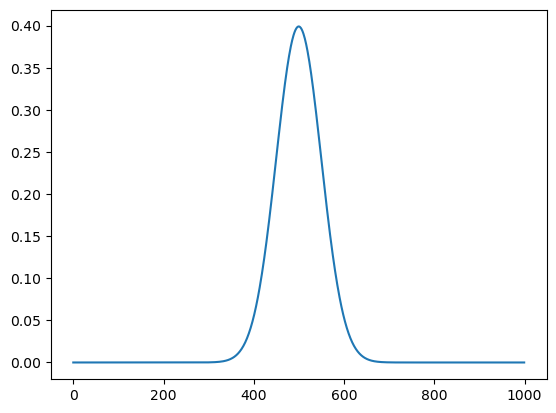

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from stats import *

# takes a list of x values in a given range with some number of finite
# divisions. This only has 1000 divisions. Will create a y value that correlates
# with each x value that was passed
def normal_dist(mean, sd, x = np.linspace(-10,10,1000)):
    prob_density = 1/ (sd * (2 * np.pi) ** .5) * np.exp(
        -0.5 * ((x - mean) / sd) ** 2)
    return prob_density

normal_dist_list = normal_dist(mean = 0, sd = 1)
plt.plot(normal_dist_list)

Text(0.5, 1.0, '$\\mu$ = 0\t$\\sigma_0$ = 1\t$\\sigma_1$ = 2\t$\\sigma_2$ = 3\t')

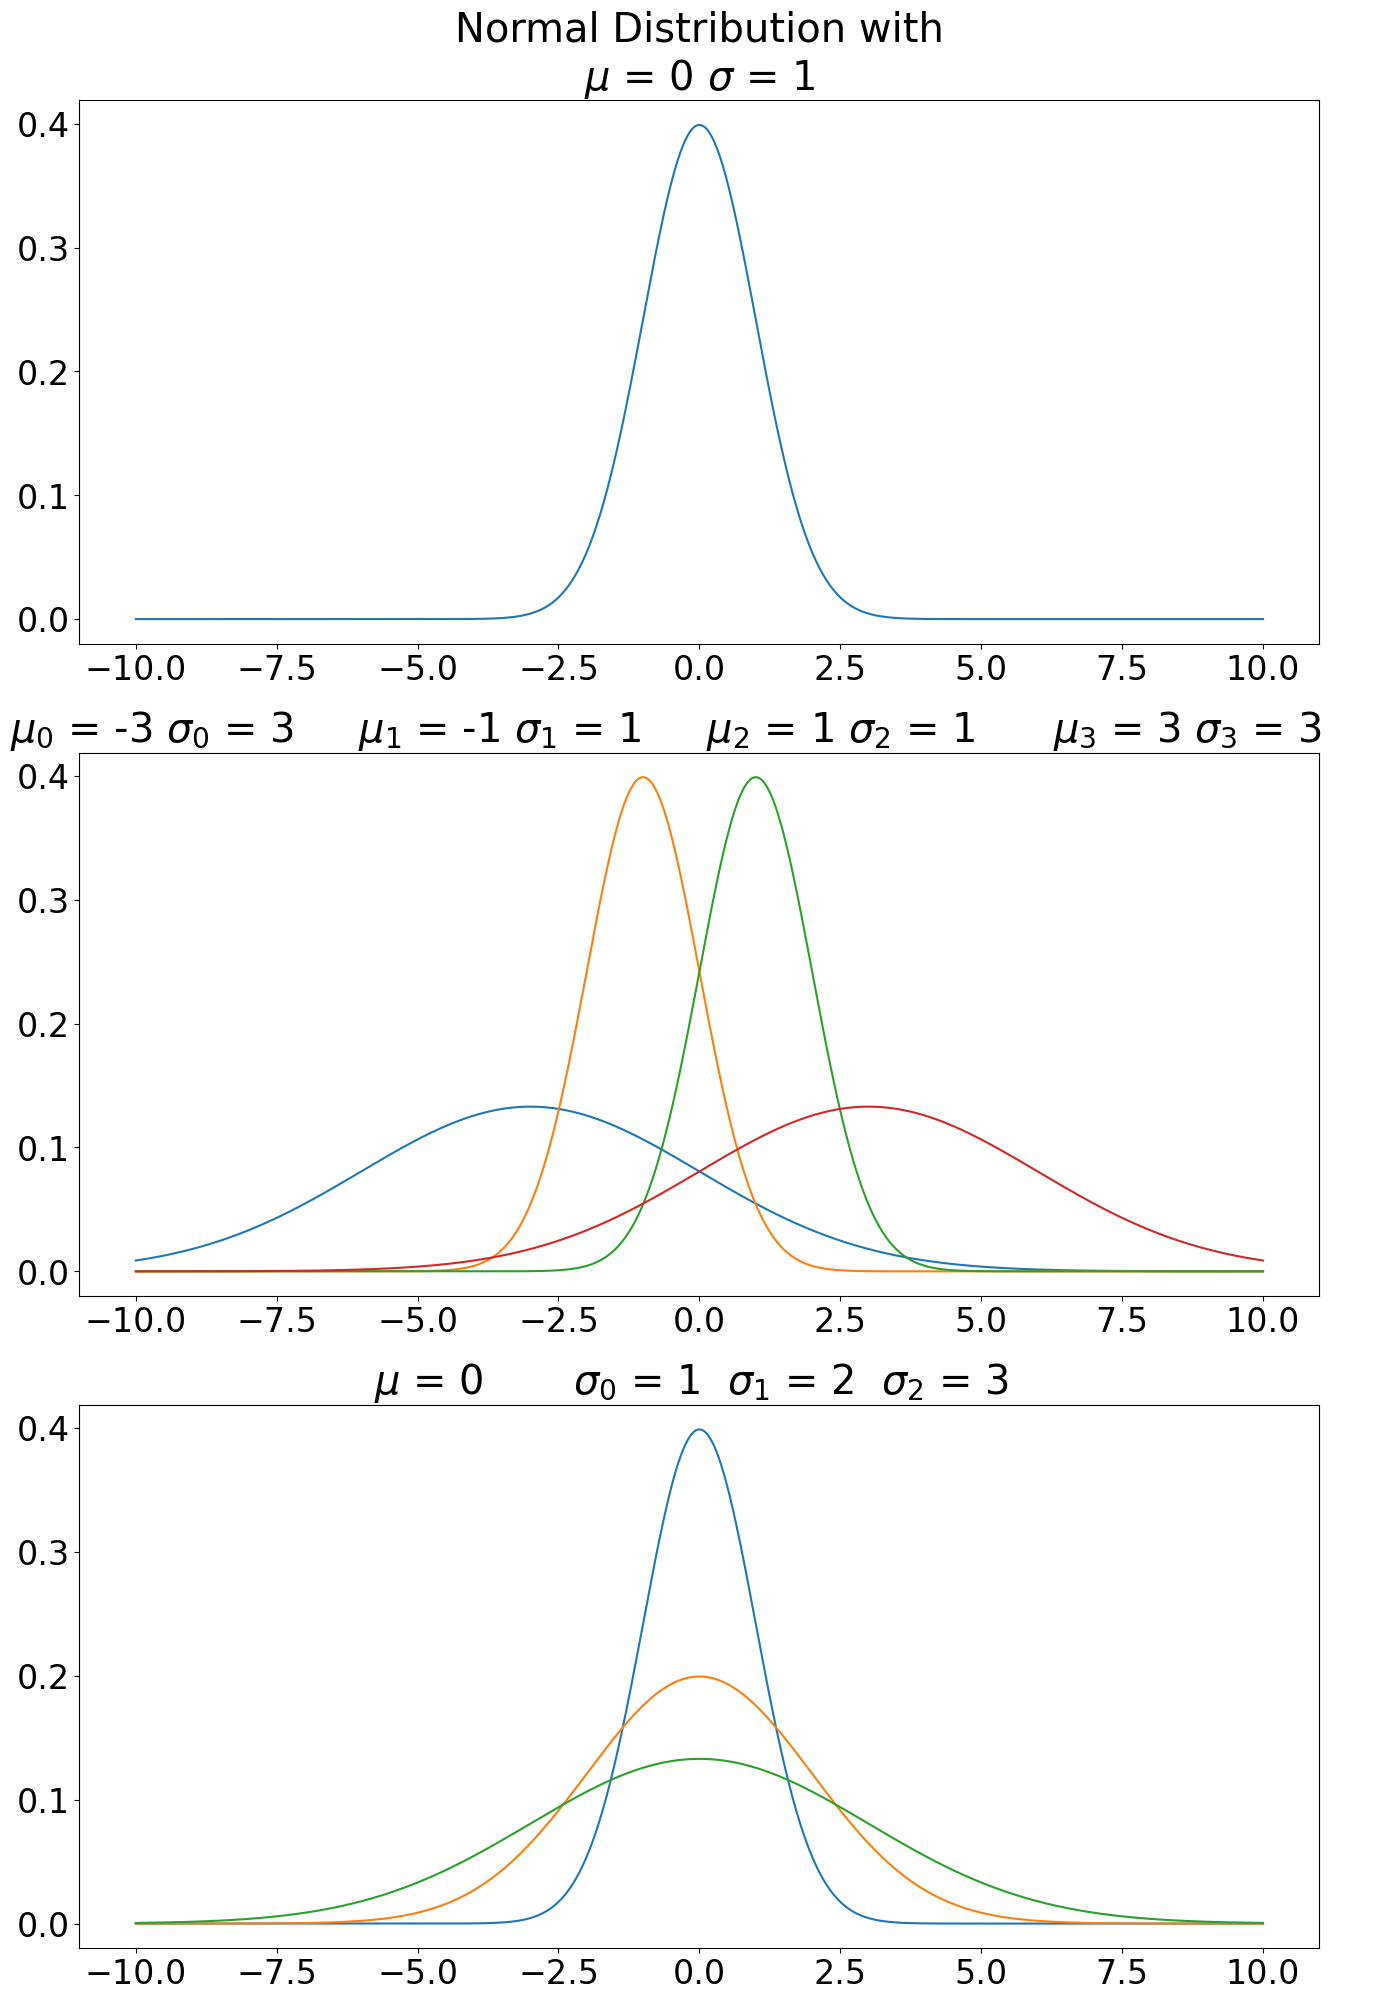

In [2]:
plt.rcParams.update({"font.size":24})
fig, axs = plt.subplots(3, 1, figsize=(16, 24))
x = np.linspace(-10, 10, 1000)

# perform transformation
mean_, sd = 0,1
normal_dist_list = normal_dist(mean = mean_, sd = sd, x = x)
axs[0].plot(x, normal_dist_list)           
axs[0].set_title("Normal Distribution with\n$\mu$ = " + \
                 str(mean_) + " $\sigma$ = " + str(sd))

# This is a lesson in automation for your functions in making them automatically
# cycle through to title, track data, etc.
ax1_title = ""
ax1_sub = 0
for mean_ in range(-3,4, 2):
    sd = abs(mean_)
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[1].plot(x, normal_dist_list)
    ax1_title = ax1_title + "$\mu_" + str(ax1_sub) + "$ = " + str(mean_) + " "
    ax1_title = ax1_title + "$\sigma_" + str(ax1_sub) + "$ = " + str(sd) + "\t"
    ax1_sub += 1
axs[1].set_title(ax1_title)

ax2_title = "$\mu$ = 0\t"
ax2_sub = 0
for sd in range(1,4):
    mean_ = 0
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[2].plot(x, normal_dist_list)
    ax2_title = ax2_title + "$\sigma_" + str(ax2_sub) + "$ = " + str(sd) + "\t"
    ax2_sub += 1
axs[2].set_title(ax2_title)

In [3]:
# try and understand the pro tips of time-series data. 
# there are certain practices you want with time-series data so you know
# in order to get normal distributed you need to log the data


## Lognormal Distribution
A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 


In [4]:
# this is to ignore the warnings, because this exercise will give false warnings

import warnings
warnings.filterwarnings("ignore")

# create the equation above in code, so that we can produce a lognormal
# distribution by typing in mean, sd, and x values
def create_lognormal(mean, sd, x = np.linspace(0,10,1000)):
    density_points = (1/ x * sd * np.sqrt(2 * np.pi)) * np.e **(
        -(np.log(x) - mean)** 2 /  (2* sd **2))
    return density_points

x = np.linspace(0,10,10000)
mean, sd = 1, 1
log_norm = create_lognormal(mean = mean, sd = sd, x = x)


Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

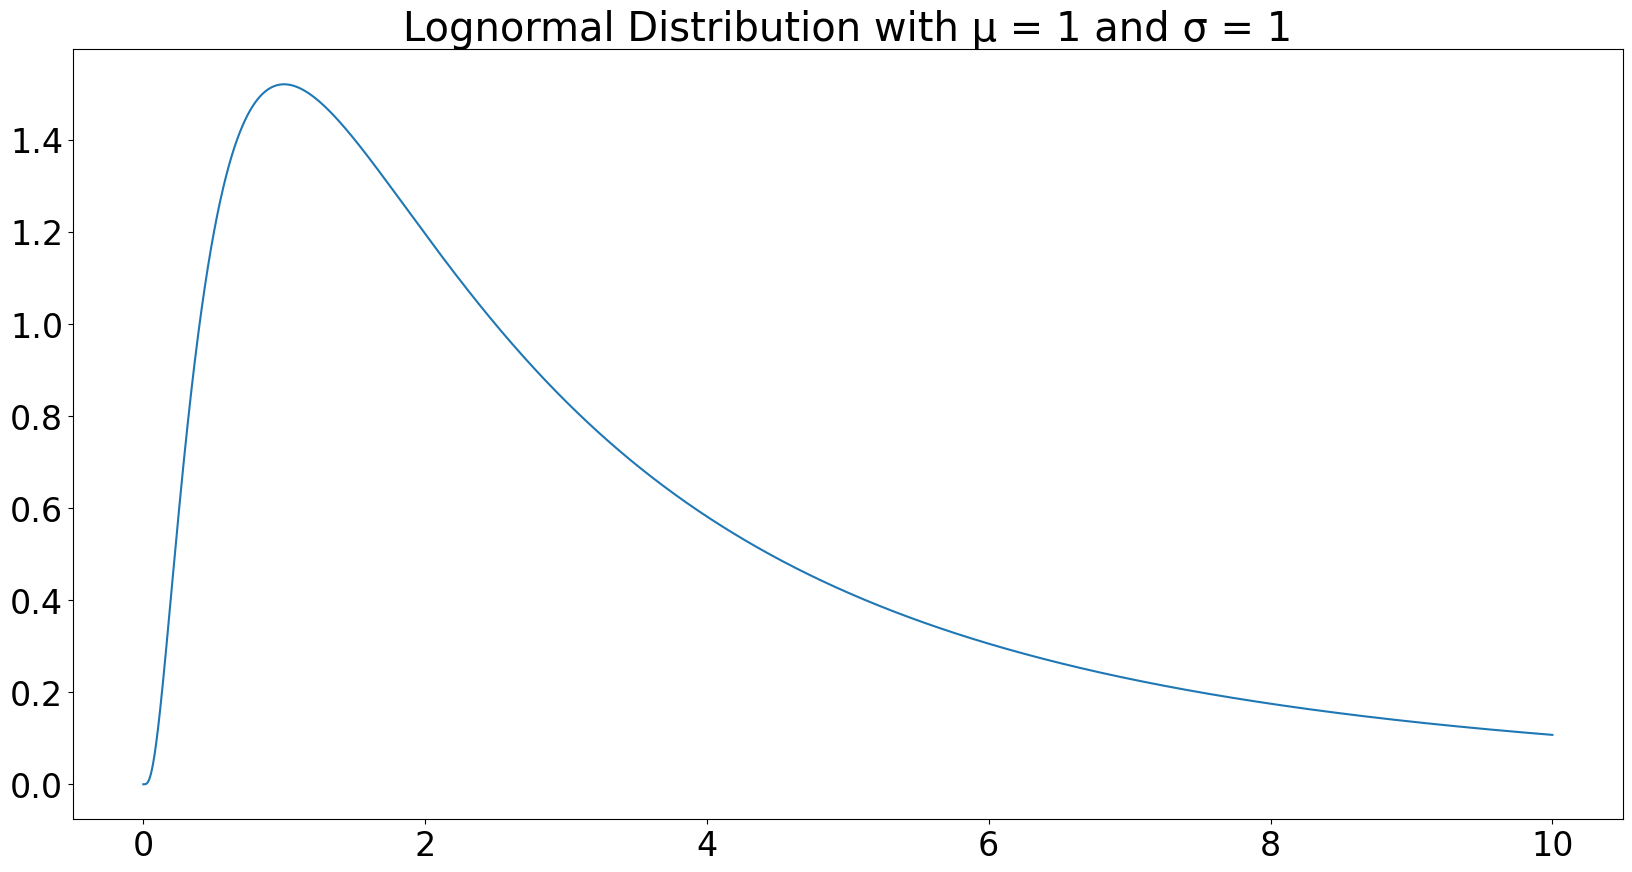

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
# sets x values as basic pre-transformed values
# then the lognormal distribution is graphed above as y values

# values as normal numbers, below is render with logged x values
ax.plot(x, log_norm)
ax.set_title(
    "Lognormal Distribution with μ = "+ str(mean) +" and σ = " + str(sd))

Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

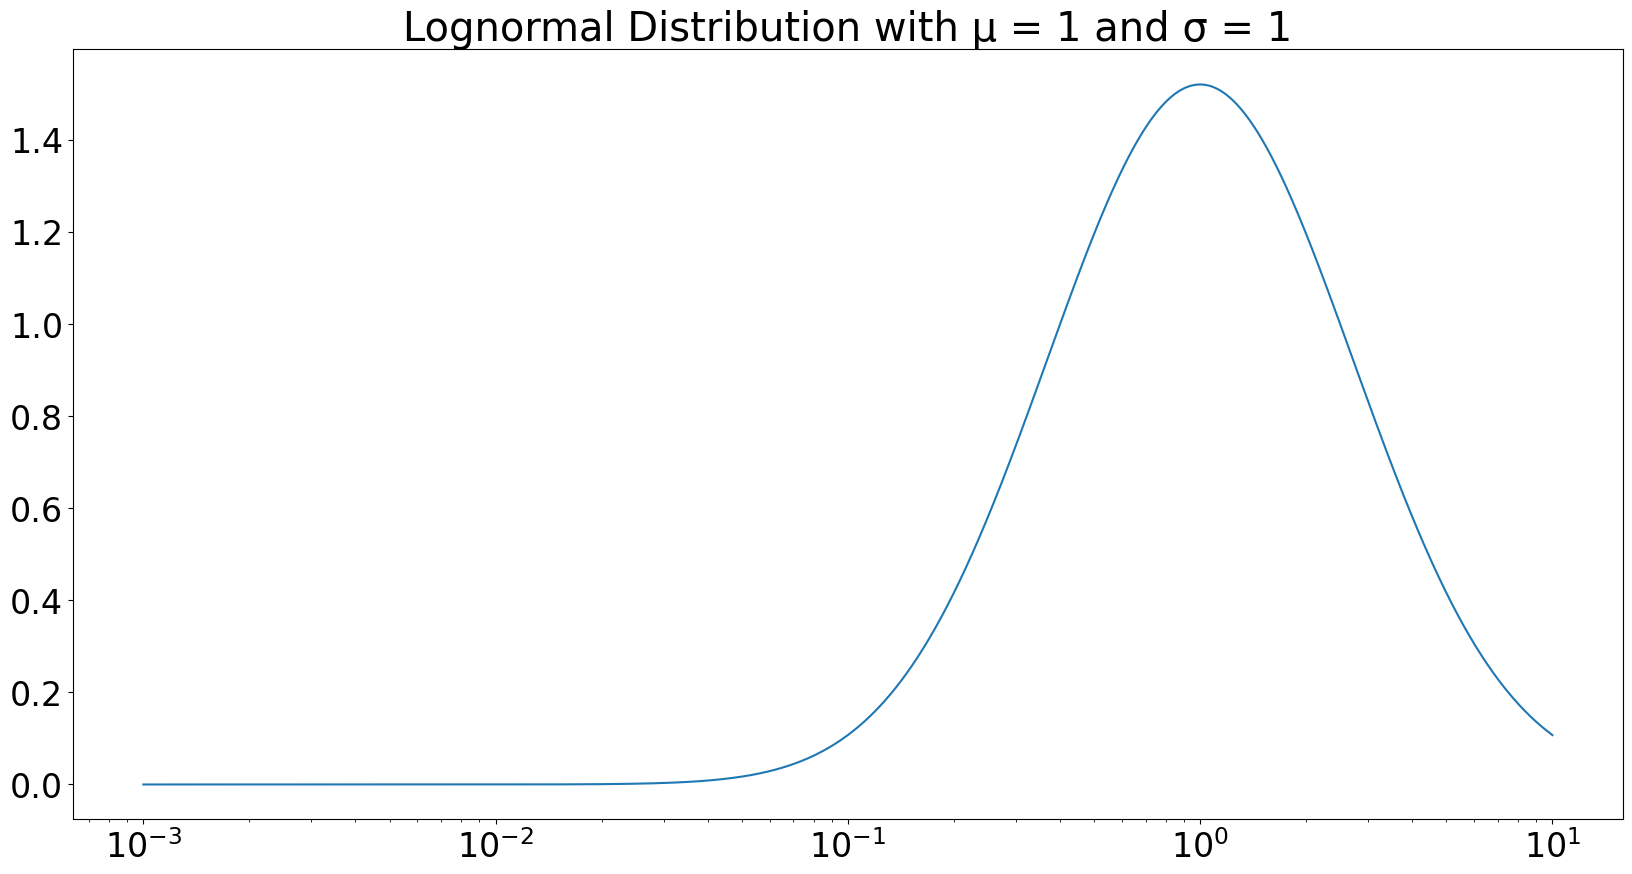

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x, log_norm)
plt.xscale("log")
# logged scale of x values, so we can see this is actually a normal distribution
# despite being transformed by what x axis we had.
ax.set_title(
    "Lognormal Distribution with μ = "+ str(mean) +" and σ = " + str(sd))

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 


In [7]:

# creating a binomial function where we can calculate specific probability
# of a value
def binomial(x, n, p):
    q = 1 - p
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n-x)) * p ** x * q ** (n - x)
    
binomial(x = 50, n = 100, p = .5)
    

0.07958923738717875

In [8]:
# this is a way to compute the probability of different outcomes of flipping 
# a coin 100 times. Probability is .5 and we return the sum of the probability
# using a classic normal distribution.

def probability_of_outcome(X0, X1, p, n):
    P = 0
    for x in range(X0, X1 +1):
        P += binomial(x = x, n = n, p = p)
    return P

p, n = .5, 100
X0 = 40
X1 = 60
probability_of_outcome(X0, X1, p, n)

0.9647997997822952

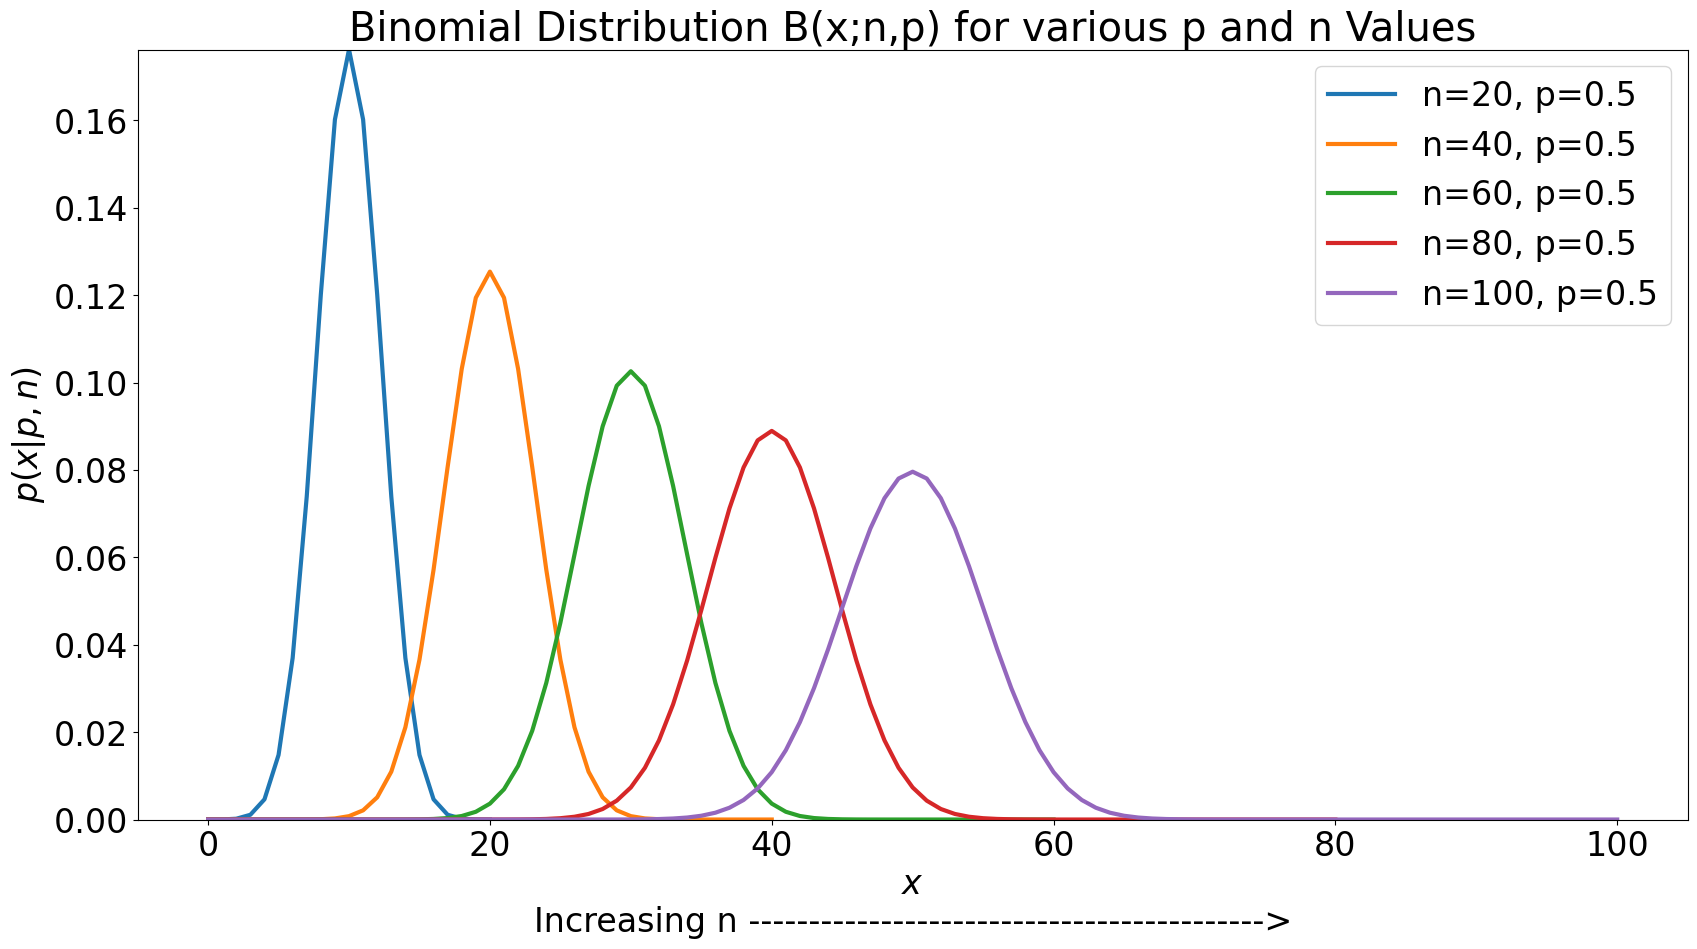

In [9]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize = (20,10))
cmap = cm.get_cmap("Blues")
ymax = binomial(20 * p, 20, p)
for n in range(20, 101, 20):
#    x = int(n * p)
    # make a list of probability of every possible outcome from 0 to n
    binom_vars = [binomial(x, n, p) for x in range(n + 1)]
    # plot line that is composed of all probabilities
    plt.plot(binom_vars, 
             linewidth = 3,
            label =f"n={n}, p={p}")
# change max y axis value from 1 to something closer to maximum probability
# accross all ranges from 0 to n that we tested.
ax.set_ylim(ymin = 0,ymax = ymax)

plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()


# the more trials you have, the lower the frequency of the mean's occurance,
# since there is a larger distribution of potential outcomes

## Working with Time Series Data

We will be working with stock price data. This data is an instance of time series data. The structure of untransformed time series data often violates the requirements of a random variable that observations be:

1. identitically distributed 
2. independent

To be identitically distributed means that observations are drawn from the same distribution. To be independent means that neighboring observations should not mutually influence one another. The independence criterion is typically violated for a single variable. Further, if two variables are subject to the I.I.D. assumptions, then not only must observations from a sample be subject to this criterion, but so too observations of the two variables must not be correlated. Here, we will show that individual samples are identically distributed. In a Chapter 6, we will be able to test whether or not the draws are observations of a given sample are independent of their neighbors. And in chpater 7, we will later consider the I.I.D. assumption when working with multiple variables using Ordinary Least Squares regression.

We will first show that unstransformed stock data is not identically distributed. But first, we need to download the data. We will use *pandas_datareader* to access yahoo finance. If you have not used this module before, install it using the command:

> *pip install pandas-datareader*

If you want to install this library from within Jupyter notebook, use:

> *!pip install pandas-datareader*

Note: A recent update to yahoo finance has broken the ability of pandas-datareader download yahoo finance data. A patch has been added to the github. If the above installation does not work, use:

>  *pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316*


In [10]:
import pandas_datareader.data as web
import yfinance as yf
import datetime

In [11]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for stock in stocks:
    data_dict[stock] = web.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
data_dict["MSFT"]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   26.549999   26.959999   26.389999   26.770000   21.413065   
2012-01-04   26.820000   27.469999   26.780001   27.400000   21.917000   
2012-01-05   27.379999   27.730000   27.290001   27.680000   22.140966   
2012-01-06   27.530001   28.190001   27.530001   28.110001   22.484919   
2012-01-09   28.049999   28.100000   27.719999   27.740000   22.188957   
...                ...         ...         ...         ...         ...   
2023-03-23  277.940002  281.059998  275.200012  277.660004  277.660004   
2023-03-24  277.239990  280.630005  275.279999  280.570007  280.570007   
2023-03-27  280.500000  281.459991  275.519989  276.380005  276.380005   
2023-03-28  275.790009  276.140015  272.049988  275.230011  275.230011   
2023-03-29  278.959991  281.140015  278.410004  280.510010  280.510010   

              Volume  
Date                  
2012-01-03  64731500  
2012-01-04  80516100  
2012-01-05  56081400  
2012-01-06  99455500  
2012-01-09  59706800  
...              ...  
2023-03-23  36610900  
2023-03-24  28172000  
2023-03-27  26840200  
2023-03-28  21878600  
2023-03-29  25054100  

[2828 rows x 6 columns]

## create a dataframe for the close data of all four stocks

In [13]:
# removes all other things besides the close data from dictionary
# allows us to make one list that includes the date, stock ticker, and close

close_data = pd.concat([df["Close"] for df in data_dict.values()],
                      keys = data_dict.keys(),
                      axis = 1)

close_data

MSFT        AAPL          PG        TSLA
Date                                                      
2012-01-03   26.770000   14.686786   66.830002    1.872000
2012-01-04   27.400000   14.765714   66.800003    1.847333
2012-01-05   27.680000   14.929643   66.519997    1.808000
2012-01-06   28.110001   15.085714   66.360001    1.794000
2012-01-09   27.740000   15.061786   66.639999    1.816667
...                ...         ...         ...         ...
2023-03-23  277.660004  158.929993  143.789993  192.220001
2023-03-24  280.570007  160.250000  146.720001  190.410004
2023-03-27  276.380005  158.279999  145.949997  191.809998
2023-03-28  275.230011  157.649994  146.360001  189.190002
2023-03-29  280.510010  160.770004  146.809998  193.880005

[2828 rows x 4 columns]

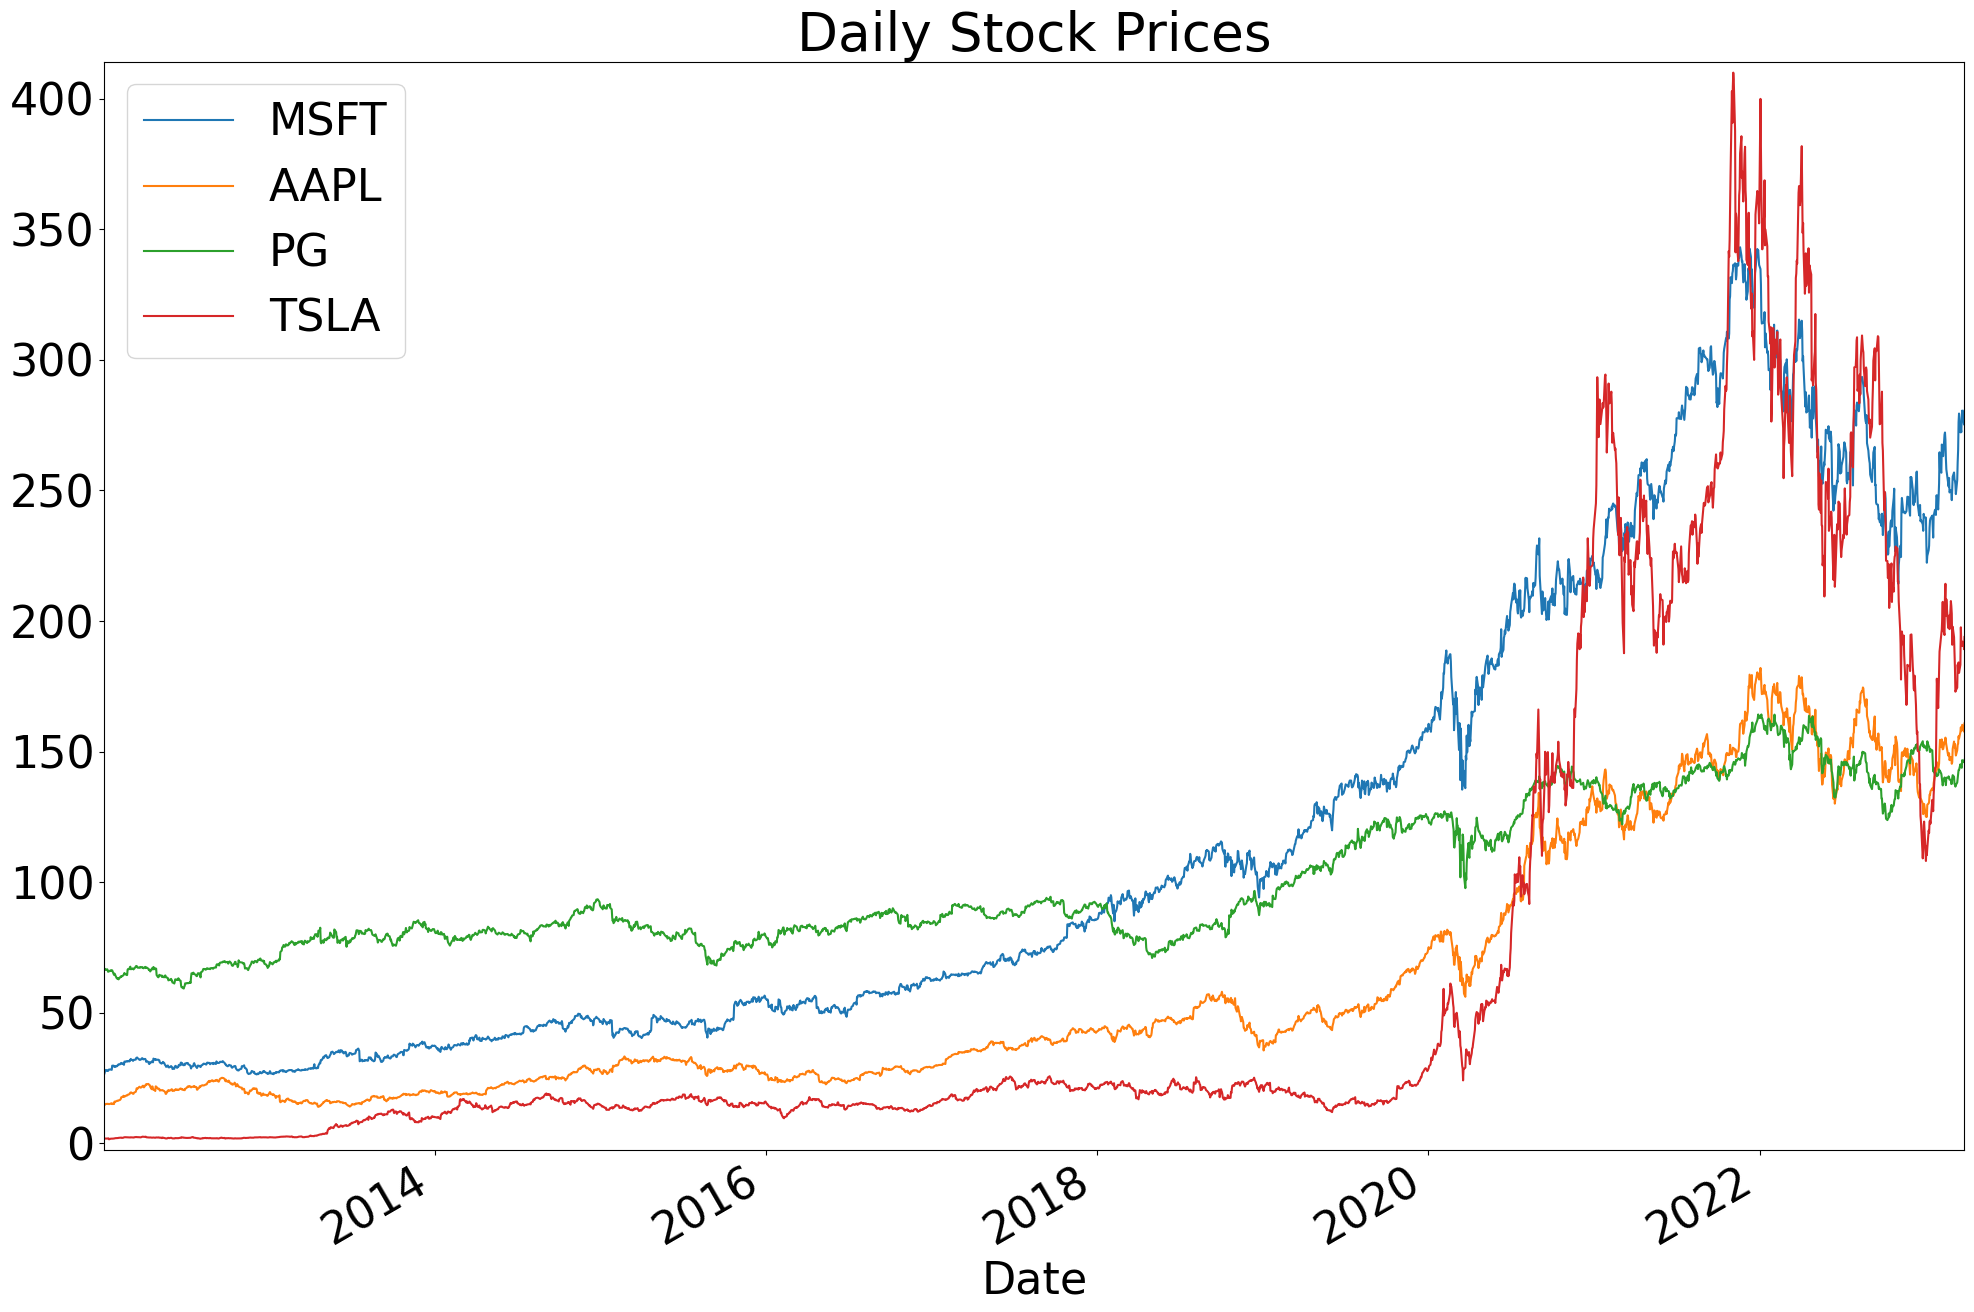

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")
y_vals = ax.get_yticks()  


plt.show()
plt.close()

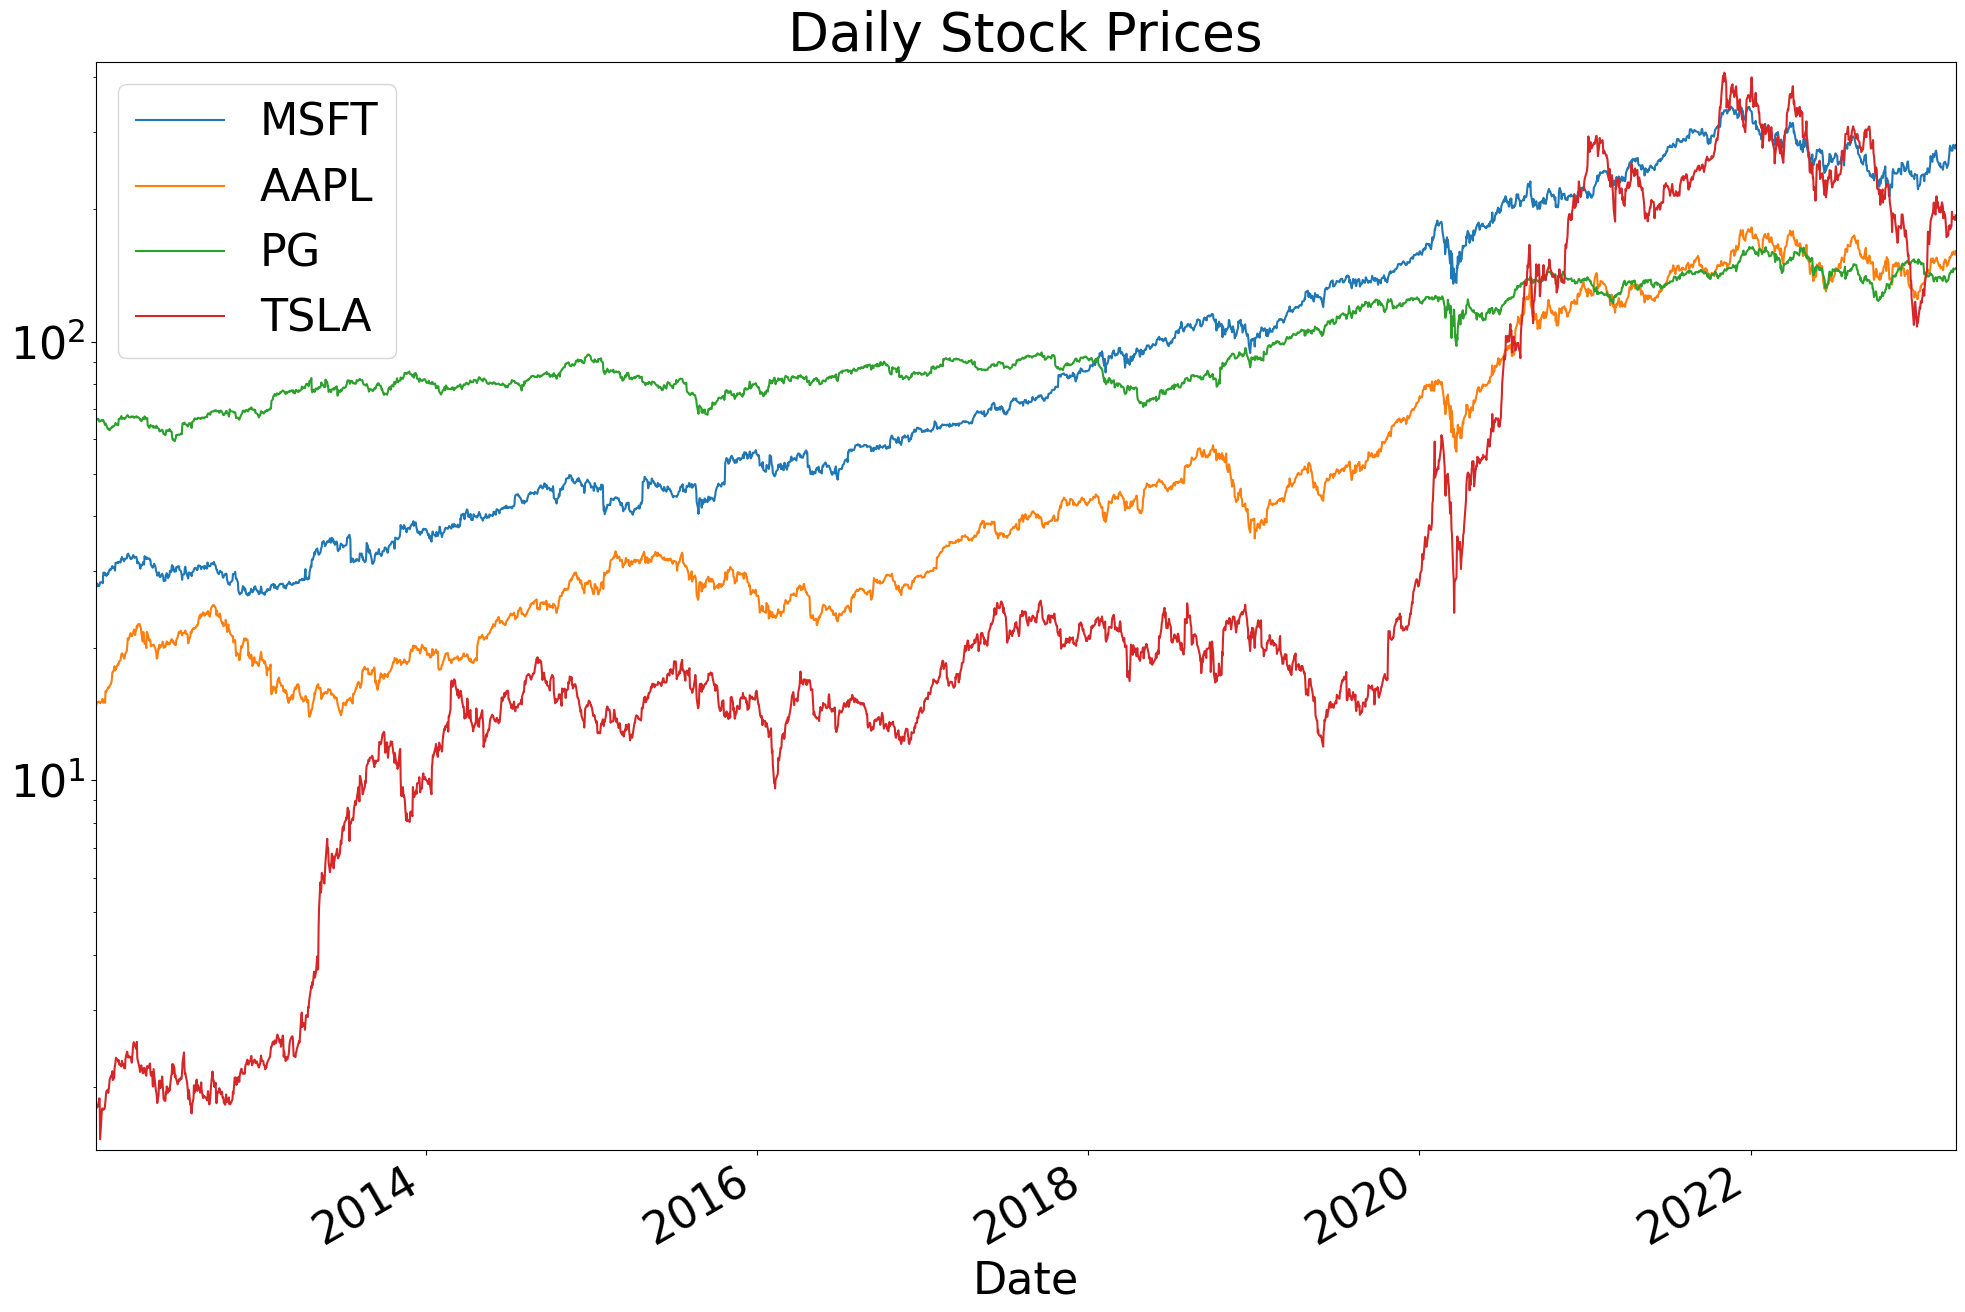

In [15]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")
ax.set_yscale("log")

Text(0.5, 1.0, 'AAPL')

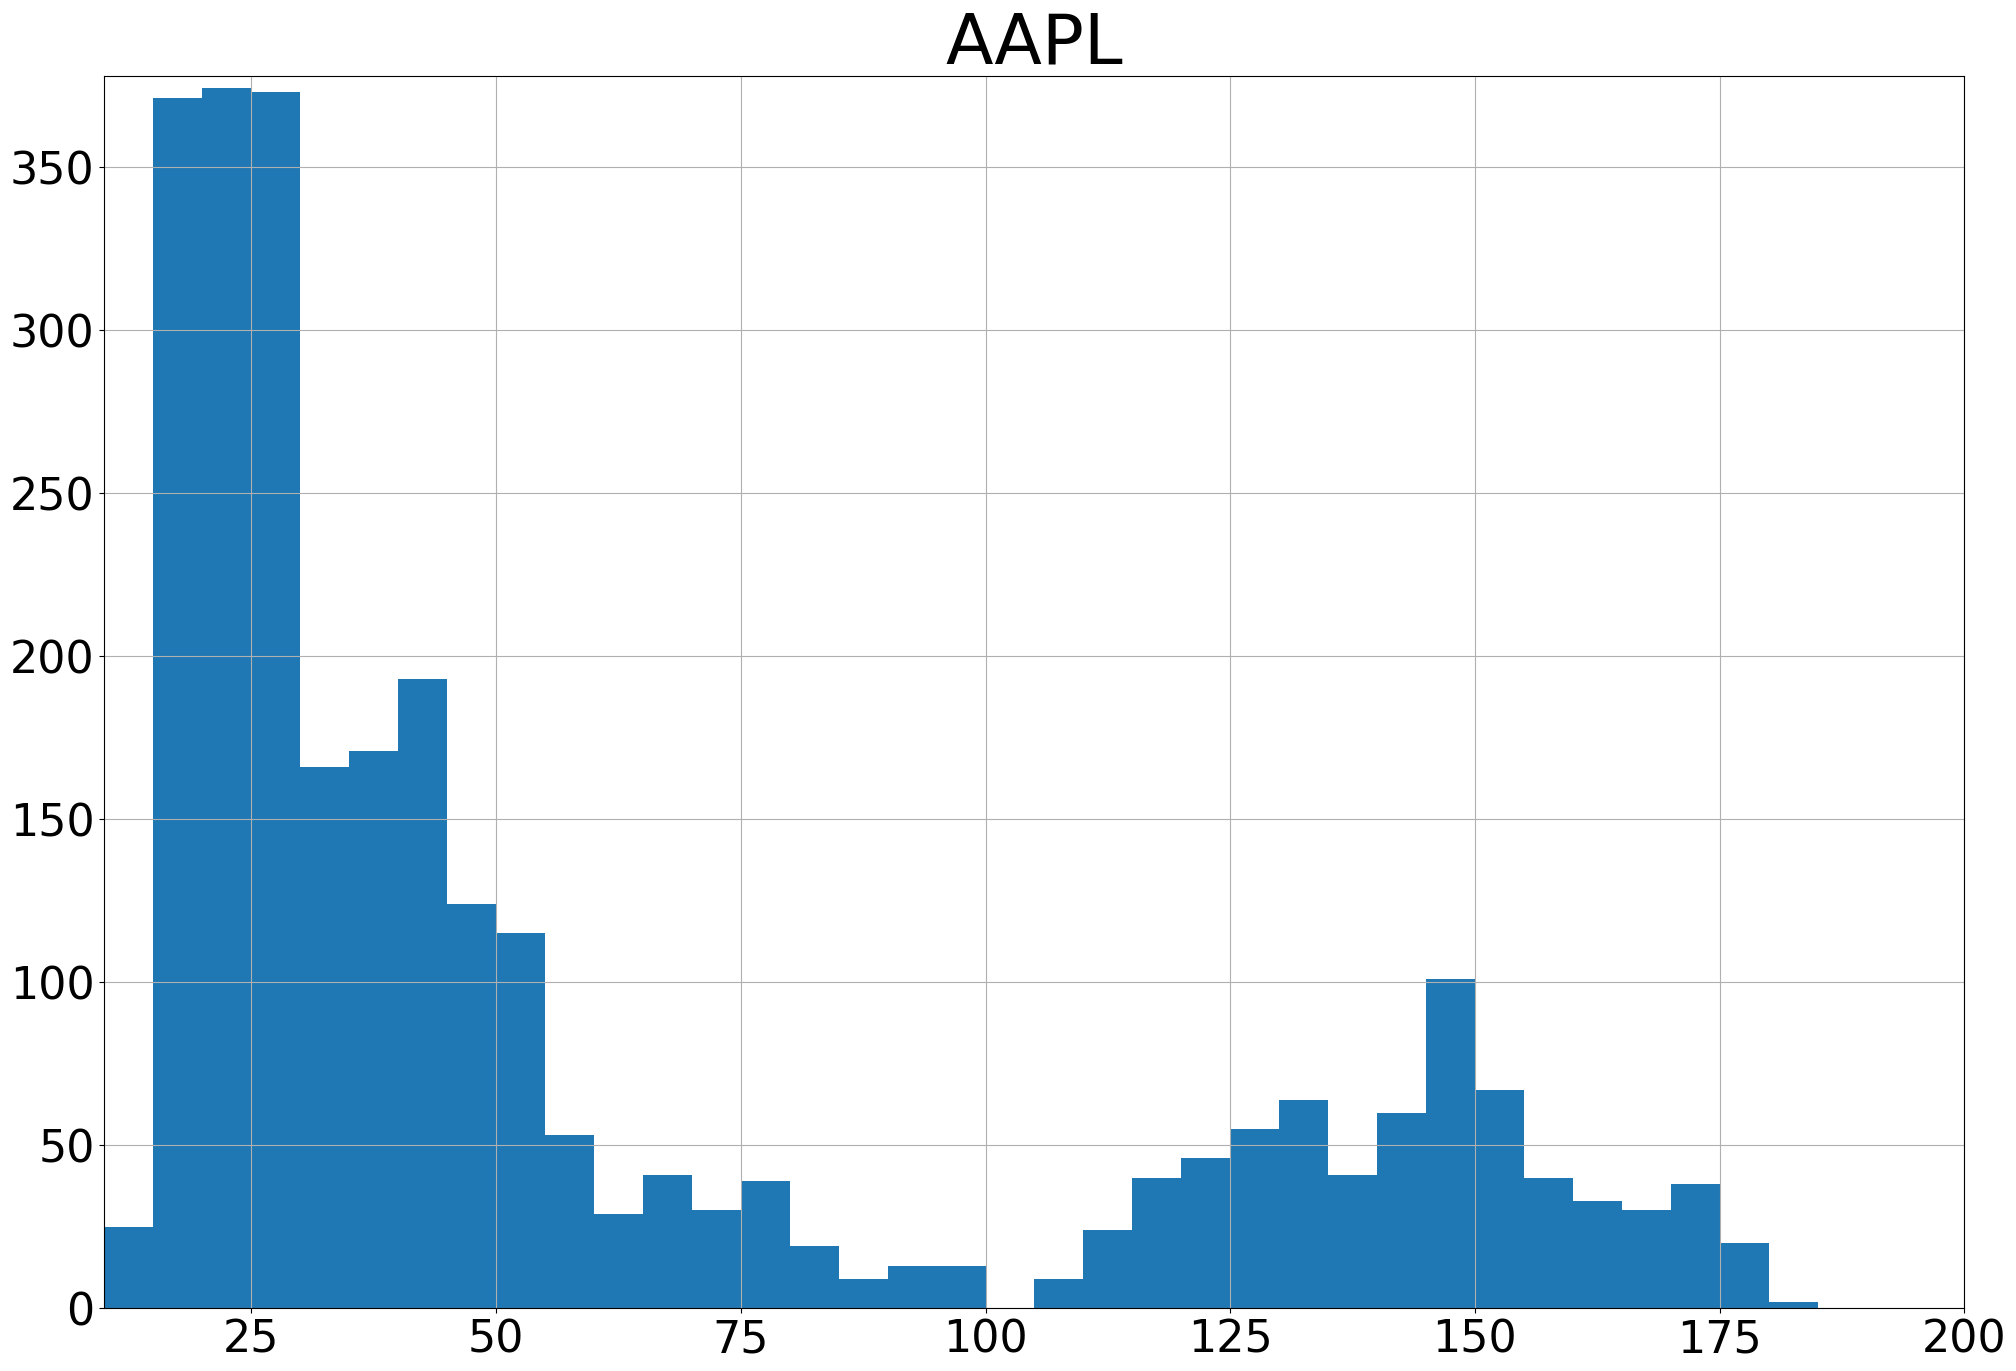

In [16]:
fig, ax = plt.subplots(figsize = (24,16))
stock = "AAPL"
# close_data[stock].hist(bins = 50)
close_data[stock].hist(bins = [i for i in range(10, 201, 5)])
ax.set_title(stock, fontsize = 50)

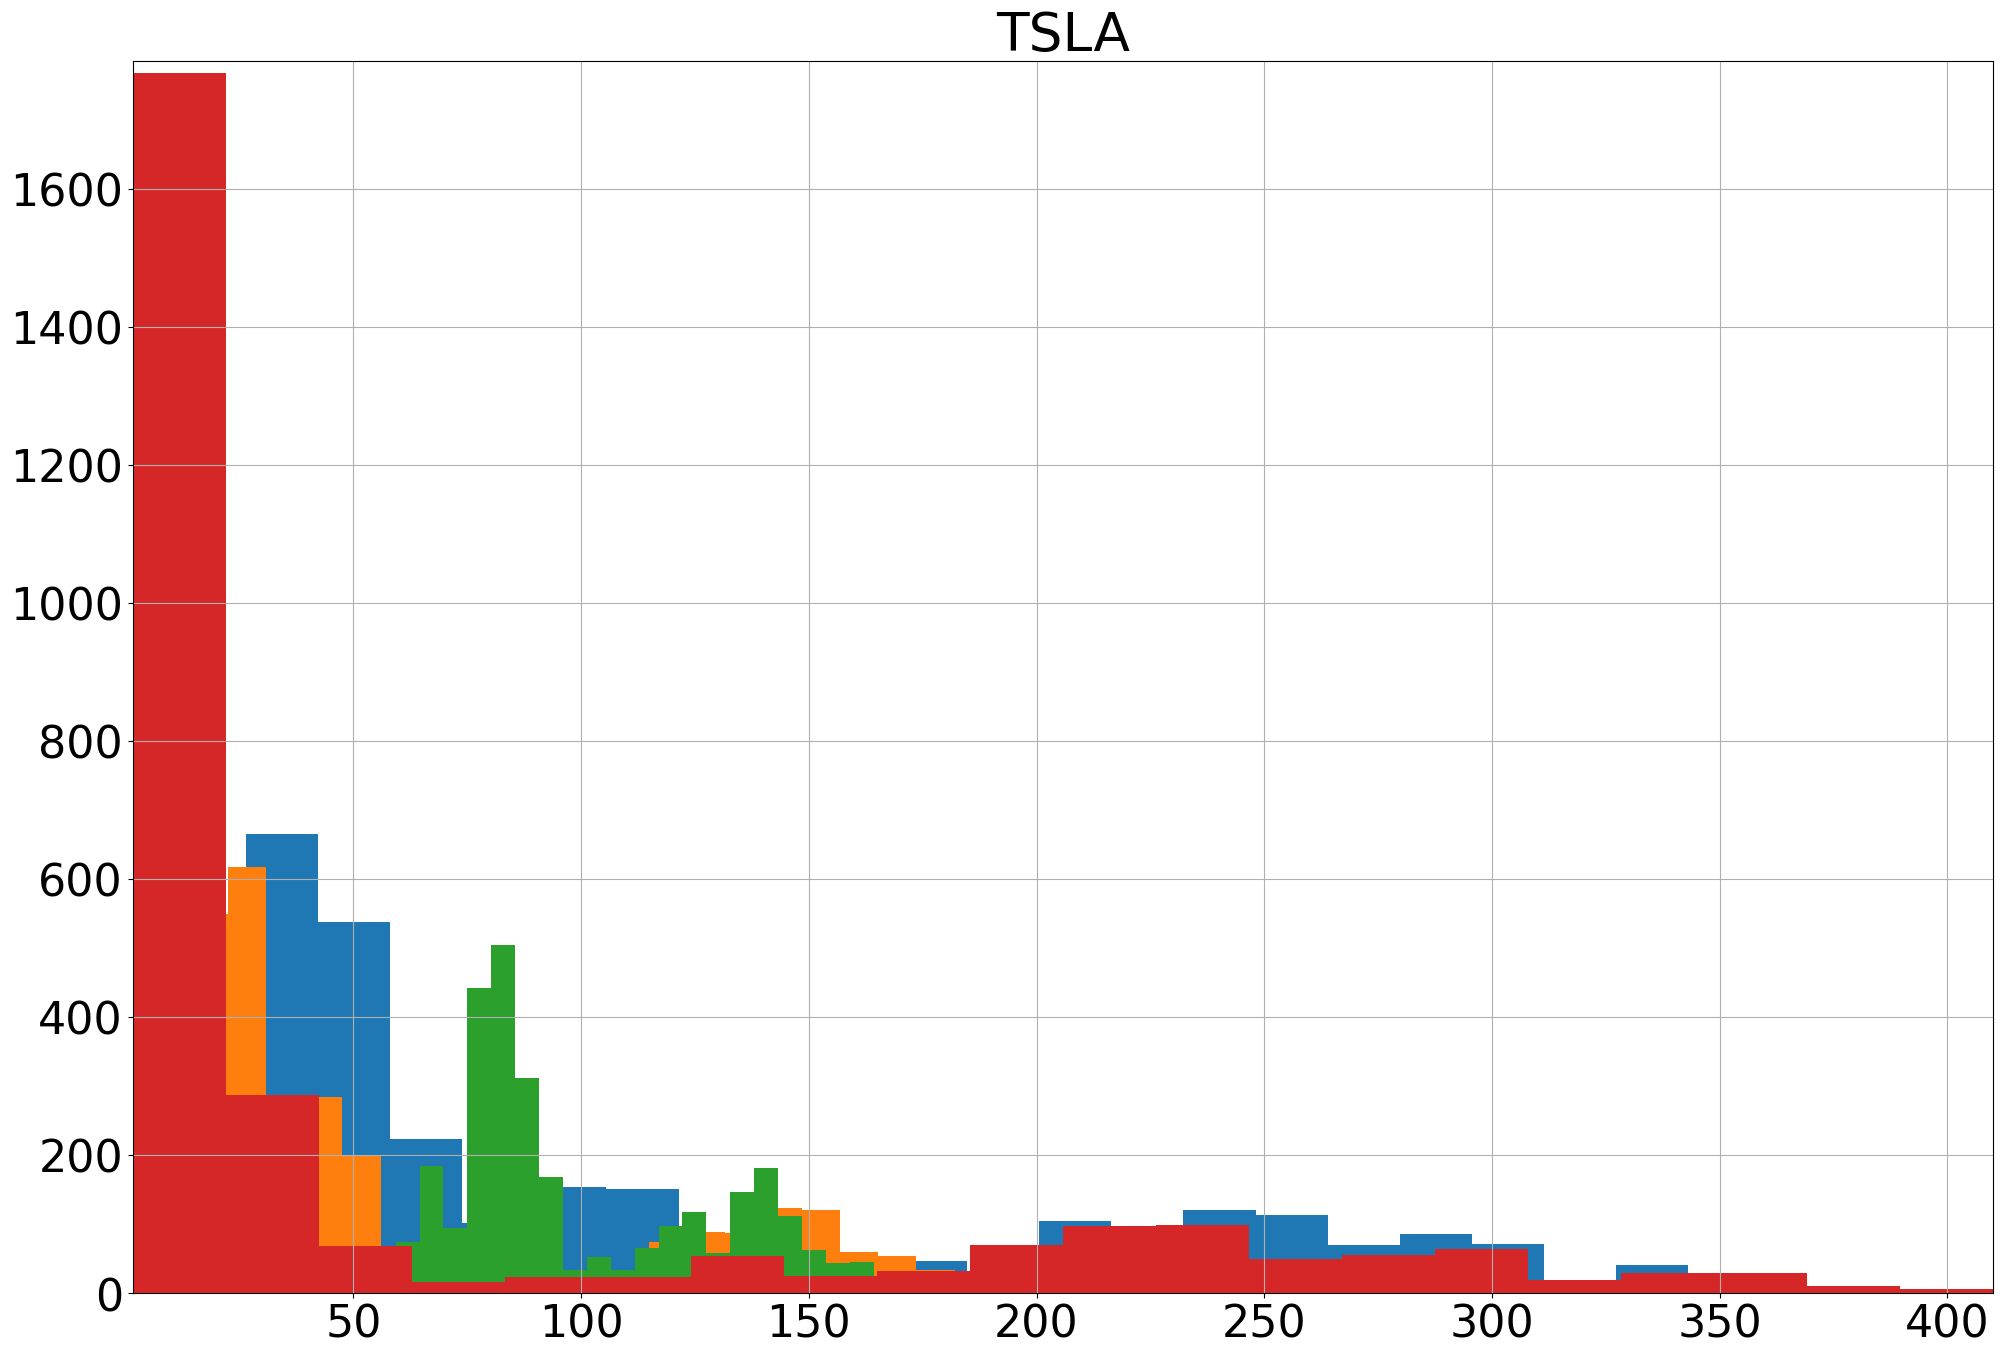

In [17]:
# own exercise to create iterative numbers
fig, ax = plt.subplots(figsize = (24,16))
for stock in stocks:
    close_data[stock].hist(bins = 20)
    ax.set_title(stock)


In [18]:
log_data = np.log(close_data)
log_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03  3.287282  2.686948  4.202152  0.627007
2012-01-04  3.310543  2.692308  4.201703  0.613743
2012-01-05  3.320710  2.703349  4.197503  0.592221
2012-01-06  3.336125  2.713748  4.195094  0.584448
2012-01-09  3.322875  2.712161  4.199305  0.597003
...              ...       ...       ...       ...
2023-03-23  5.626397  5.068464  4.968354  5.258641
2023-03-24  5.636823  5.076735  4.988526  5.249180
2023-03-27  5.621777  5.064366  4.983264  5.256505
2023-03-28  5.617607  5.060377  4.986069  5.242752
2023-03-29  5.636609  5.079975  4.989139  5.267239

[2828 rows x 4 columns]

Text(0.5, 1.0, 'AAPL')

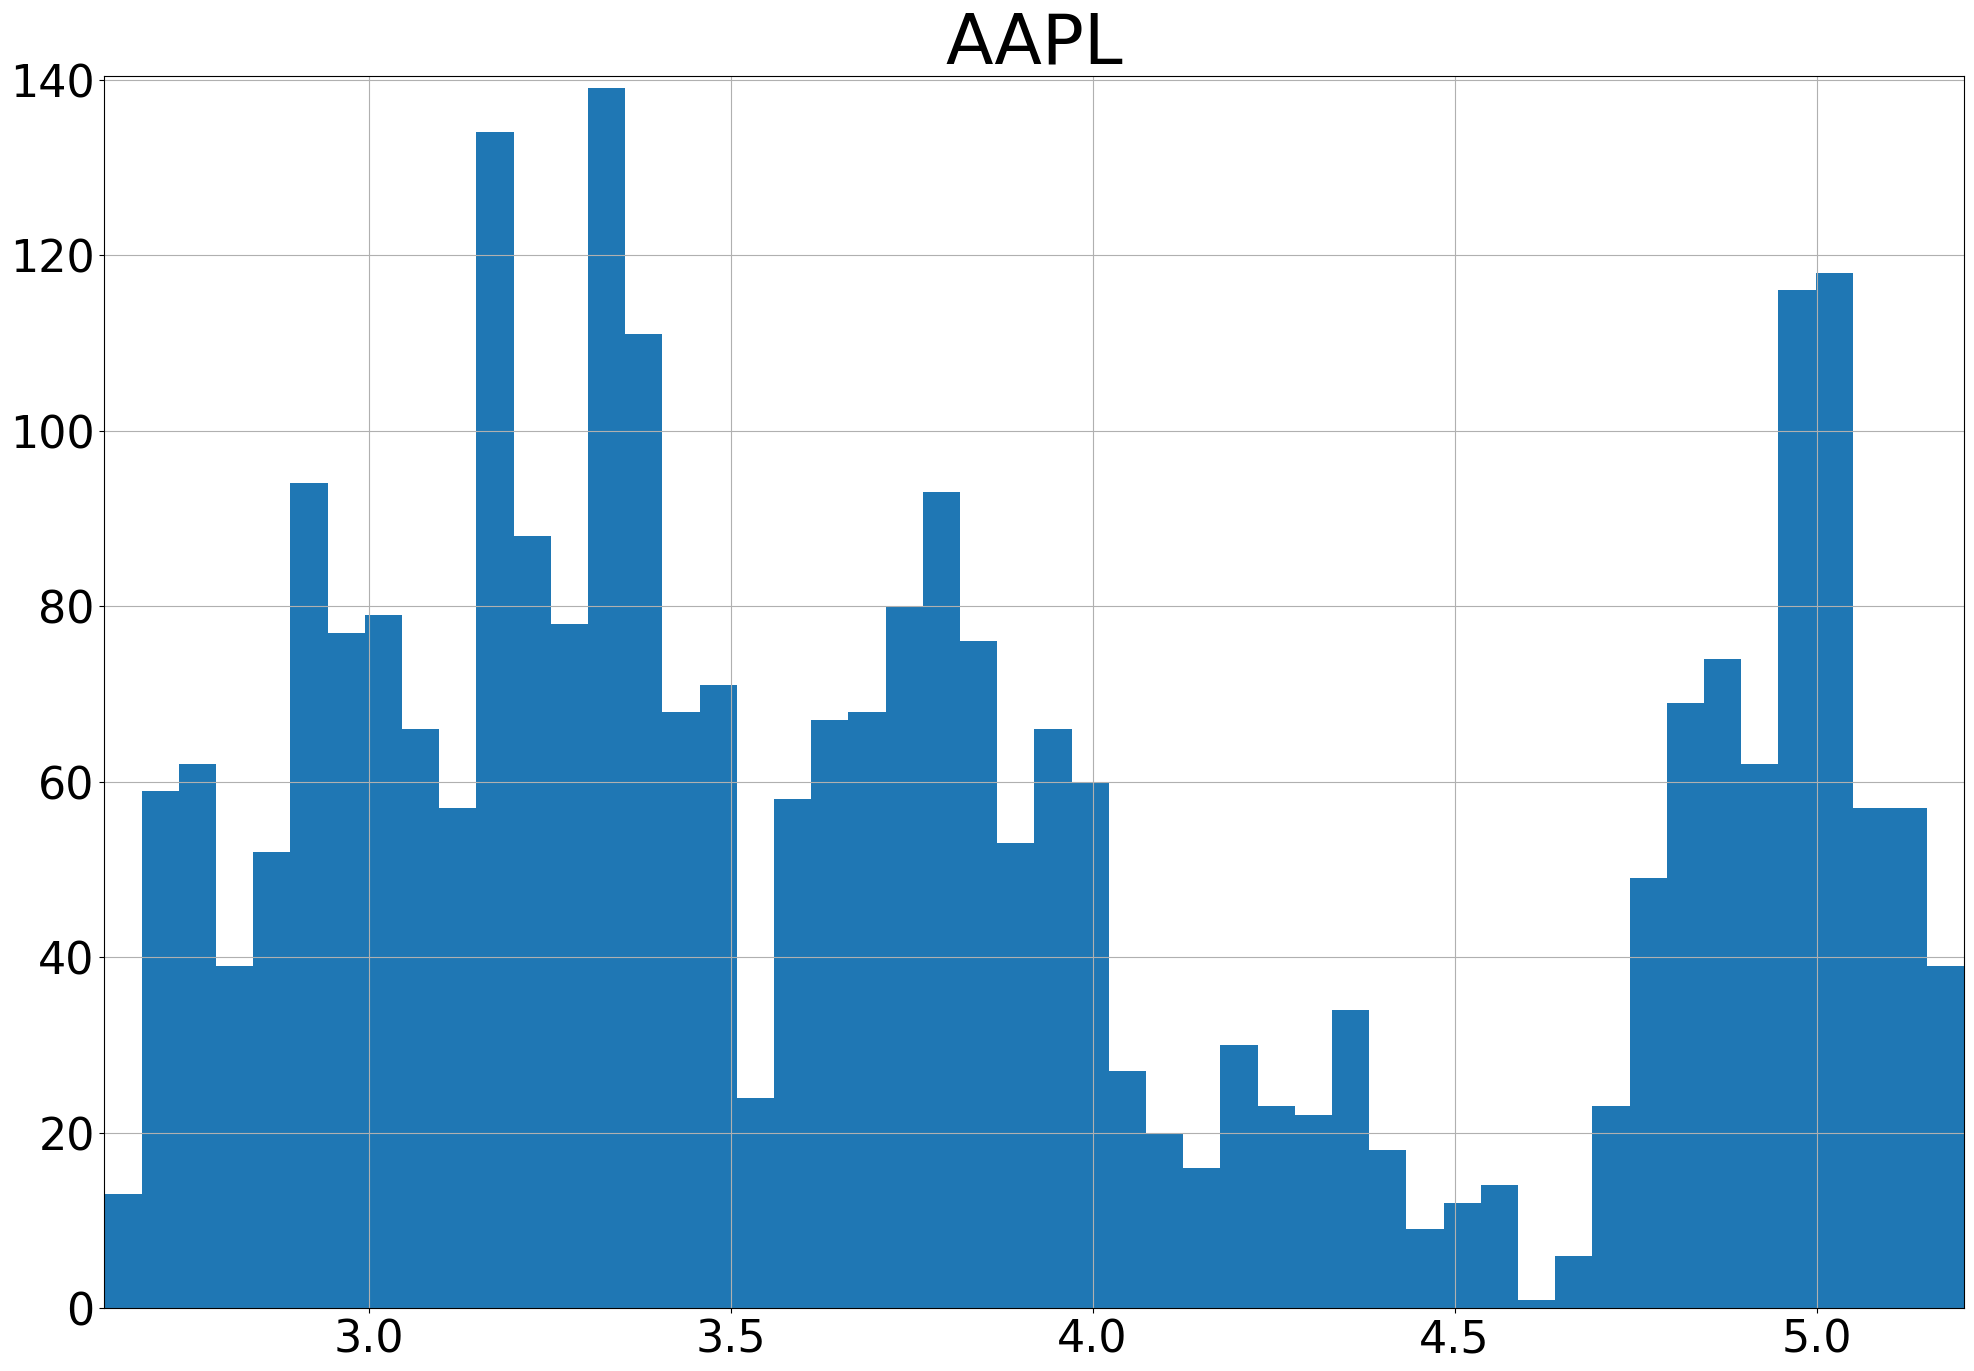

In [19]:
# these are logged datapoints as opposed to last graph which were straight 
# numbers
stock = "AAPL"
fig, ax = plt.subplots(figsize = (24,16))
log_data[stock].hist(bins = 50)
ax.set_title(stock, fontsize = 50)

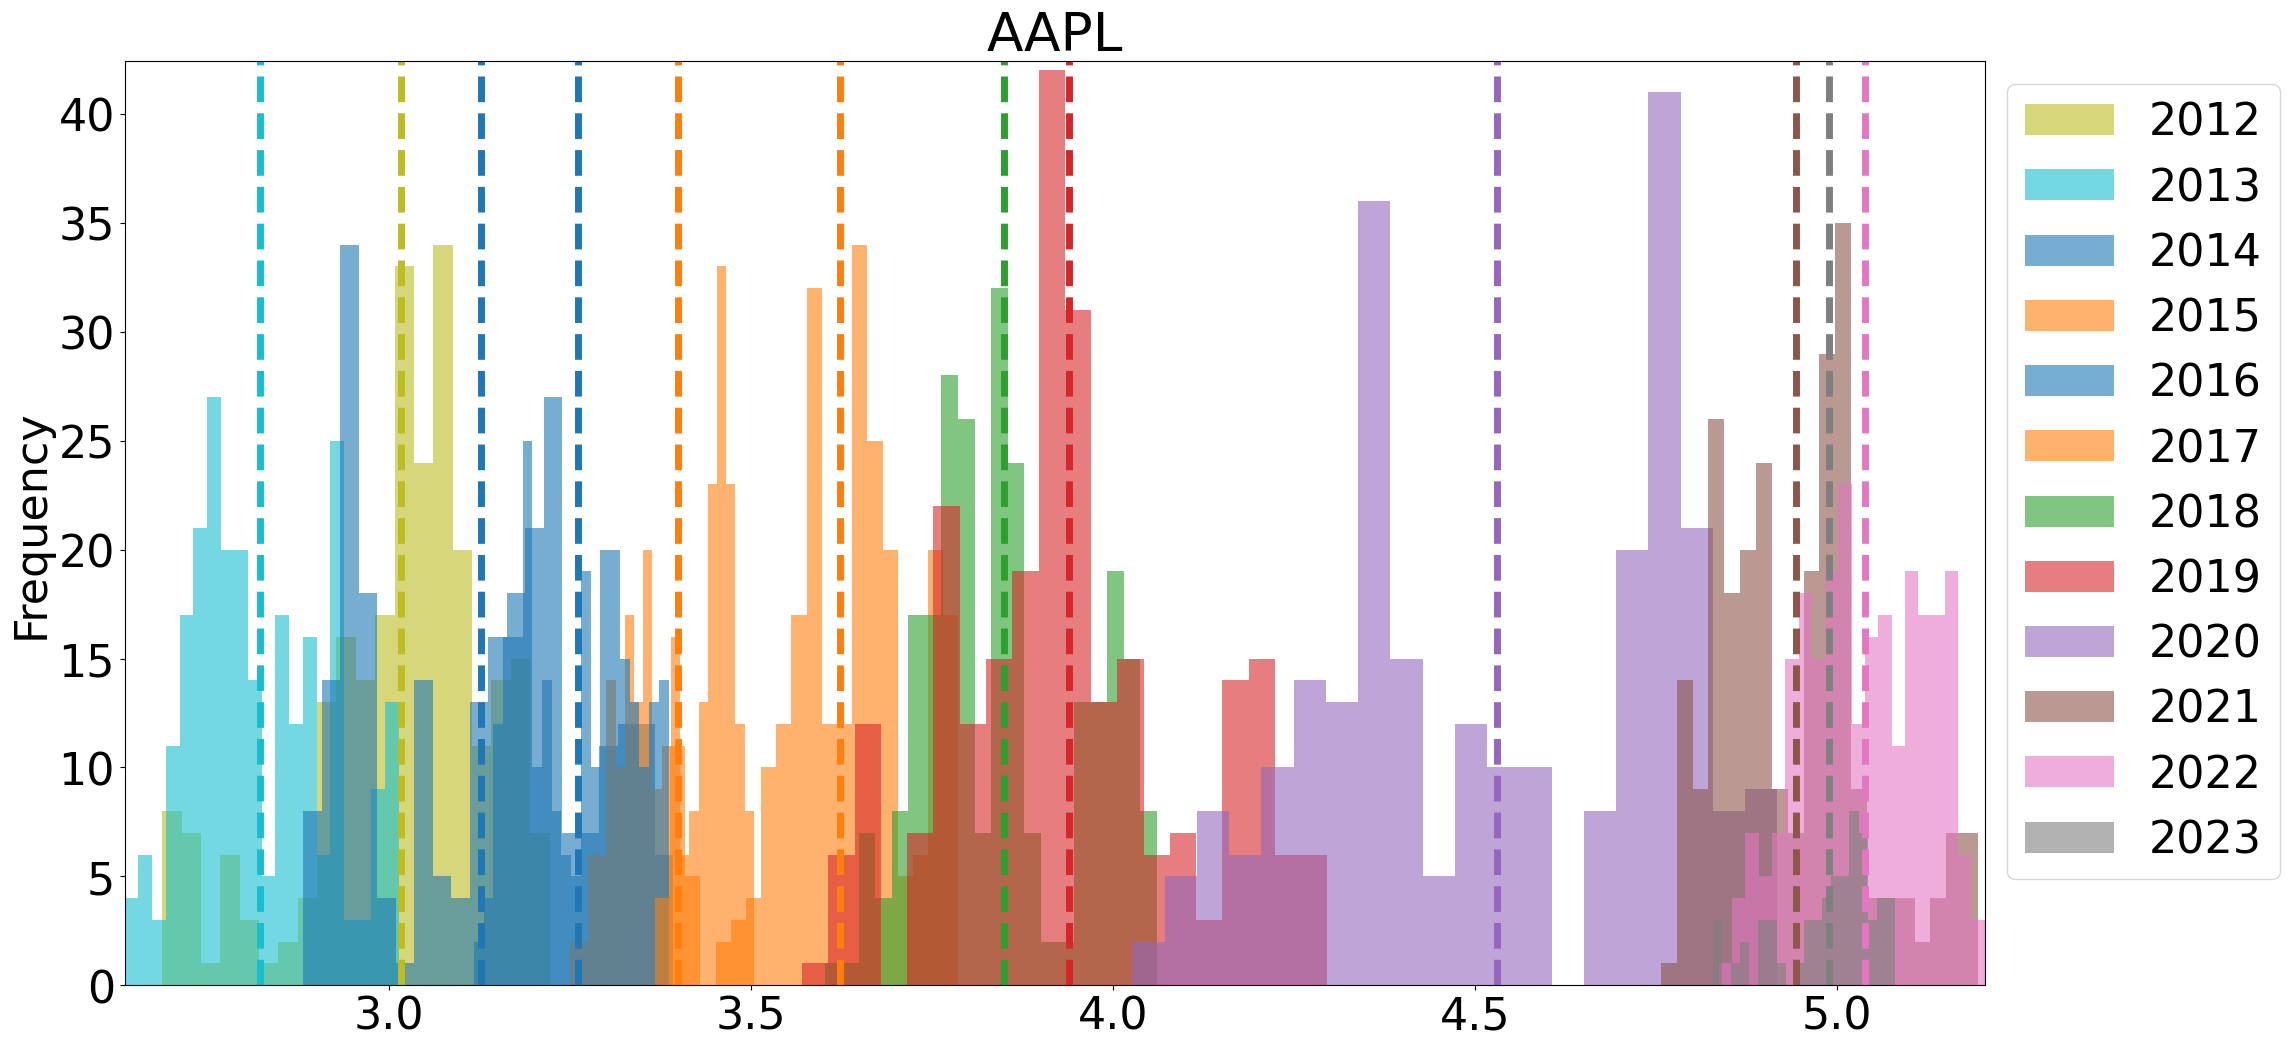

In [20]:
def graph_yearly_distributions(data, stock, figsize = (24,12), density = False):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = figsize)
    for year in years:
        # this will normalize color based on the remainder when dividing by 12
        color = "C" + str(year % 12)
        year = str(year)
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color = color, 
                            alpha = .6,
                            label = year,
                            bins = 20,
                            density = density,
                            ax = ax)
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = "--")
        ax.set_title(stock)
        ax.legend(bbox_to_anchor = (1,1))
    

graph_yearly_distributions(log_data, stock, density = False)

In [21]:
price_change_data = log_data.diff()

# log diff is not always the same as pct change. 
price_change_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.023261  0.005360 -0.000449 -0.013264
2012-01-05  0.010167  0.011041 -0.004201 -0.021522
2012-01-06  0.015415  0.010400 -0.002408 -0.007773
2012-01-09 -0.013250 -0.001587  0.004211  0.012556
...              ...       ...       ...       ...
2023-03-23  0.019530  0.006945 -0.001390  0.005582
2023-03-24  0.010426  0.008271  0.020172 -0.009461
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326
2023-03-28 -0.004170 -0.003988  0.002805 -0.013753
2023-03-29  0.019002  0.019597  0.003070  0.024488

[2828 rows x 4 columns]

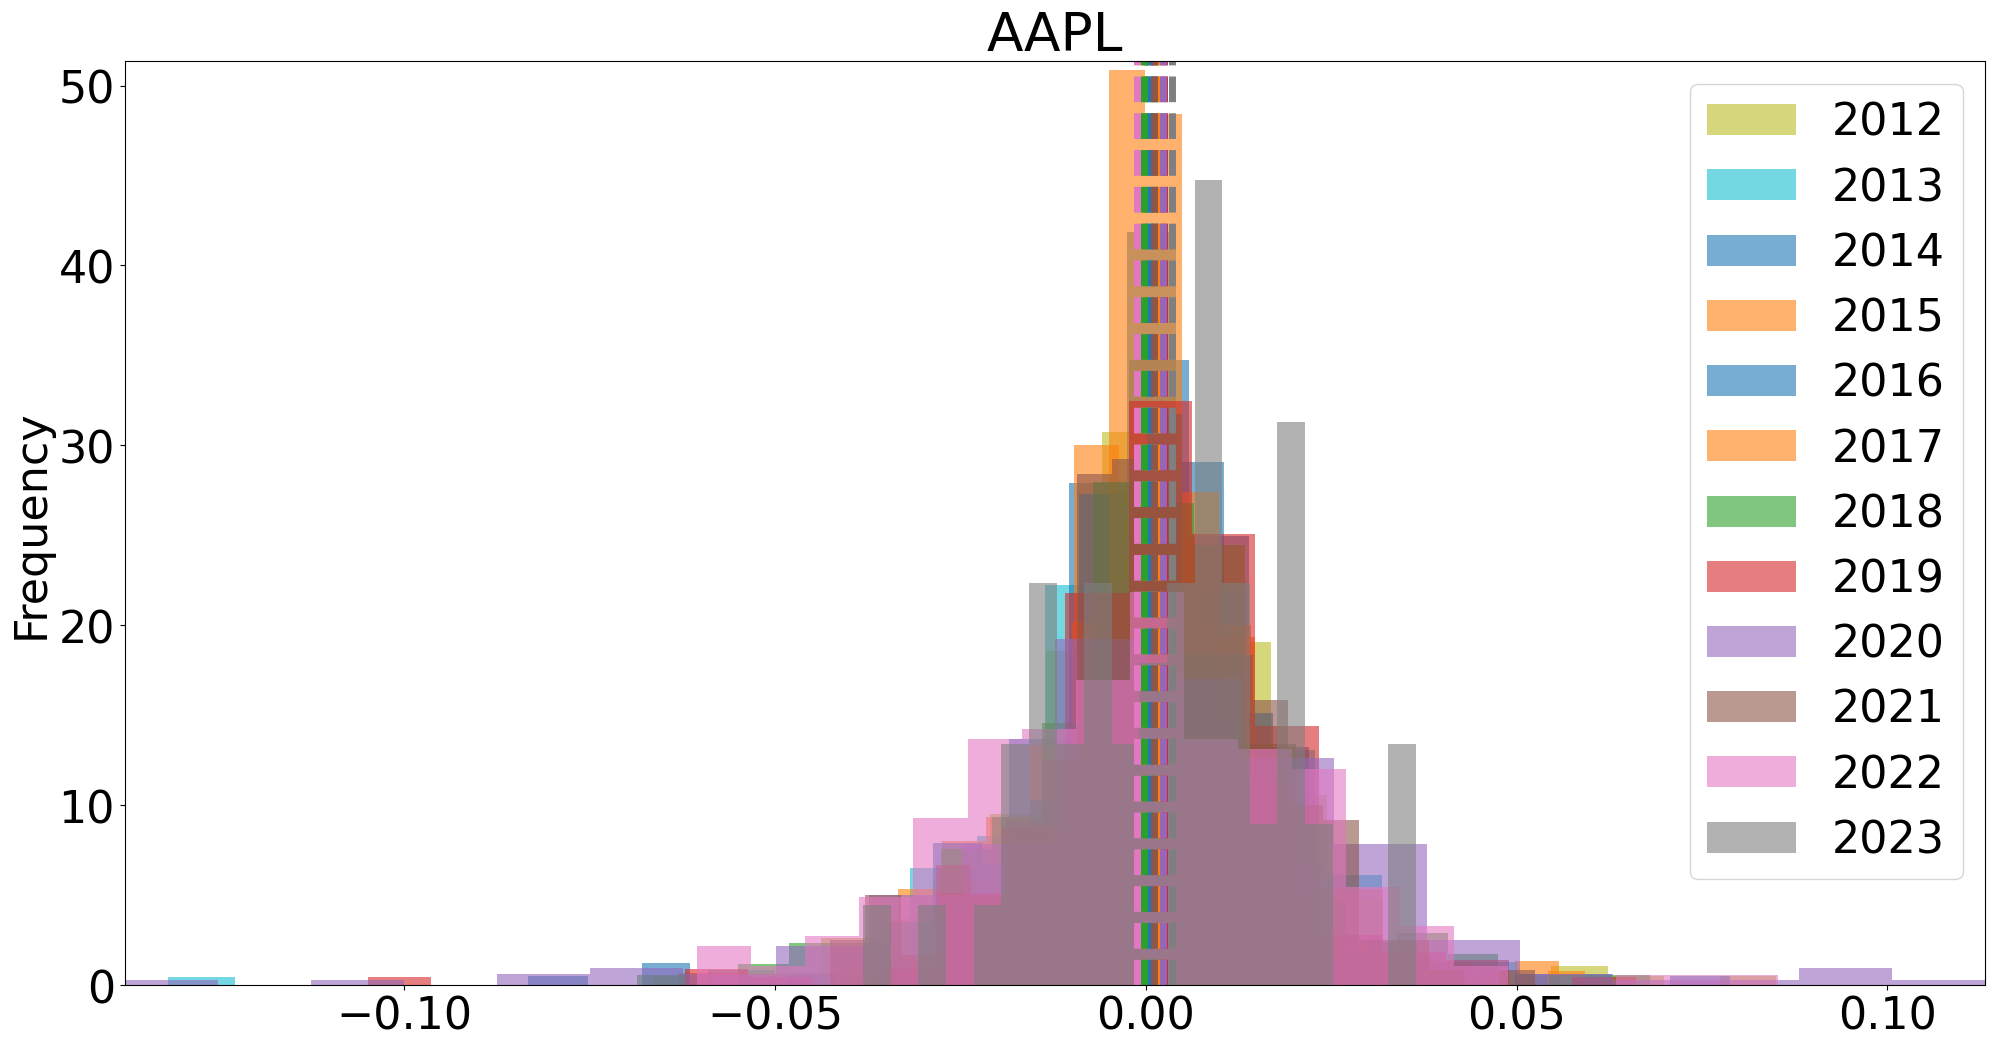

In [22]:
graph_yearly_distributions(price_change_data, stock, density = True)

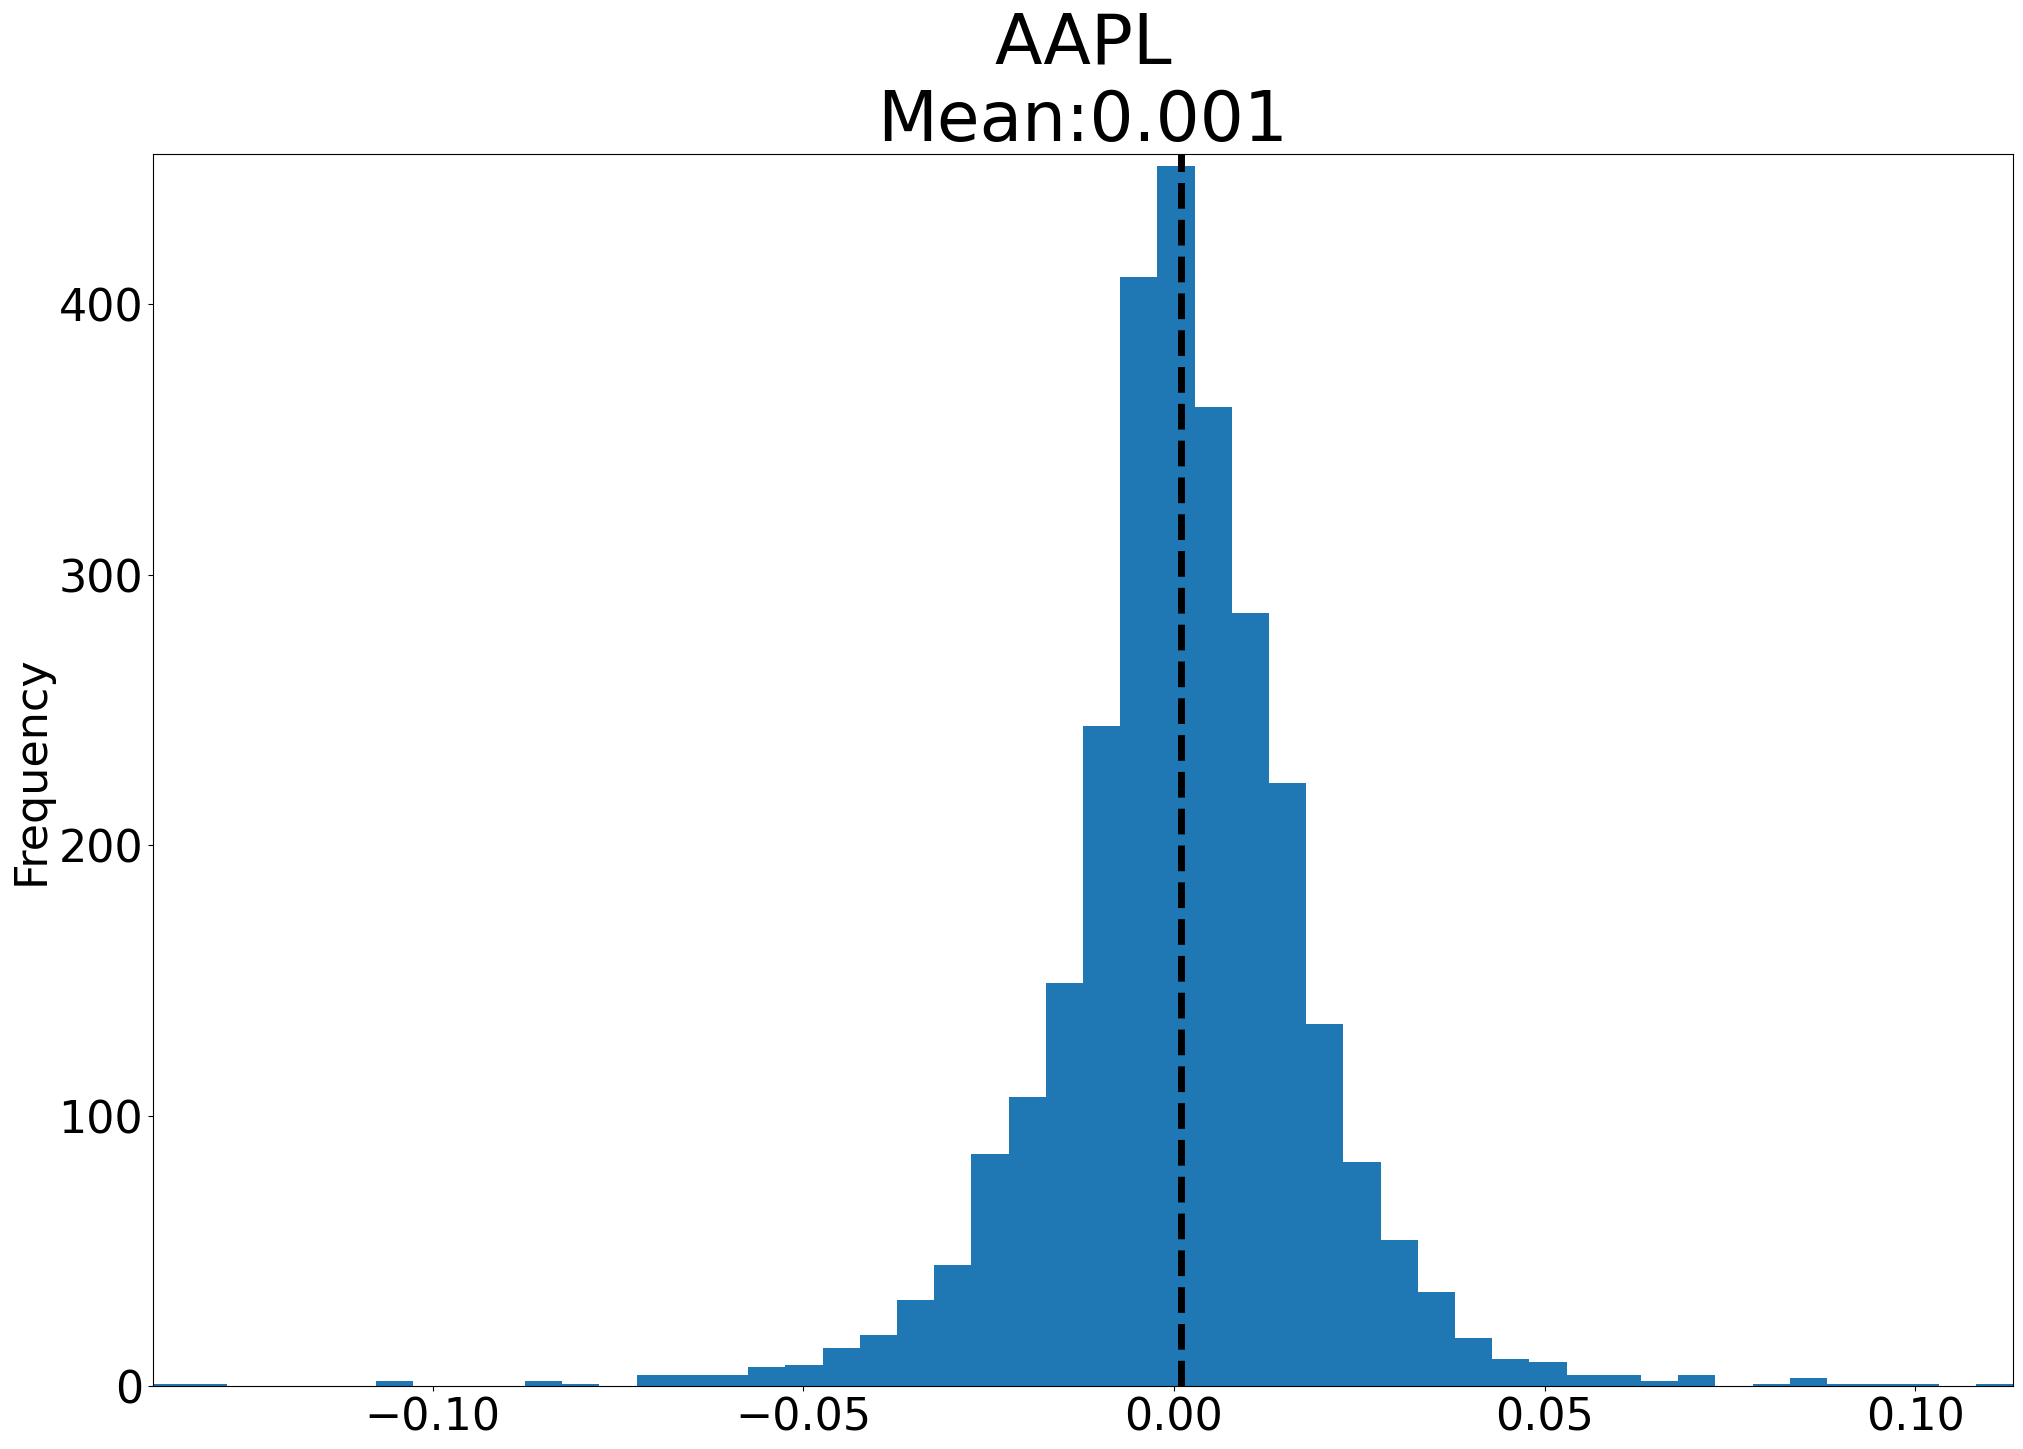

In [23]:
# Below is a graph of the above, but conformed to a single mean and pushed
# into our statistical normal distribution, showing an average of .1% delta
# in stock price

fig, ax = plt.subplots(figsize = (24,16))
stock = "AAPL"
price_change_mean = round(price_change_data[stock].mean(),3)
price_change_data[stock].dropna().plot.hist(bins = 50)
ax.set_title(stock + "\nMean:" + str(price_change_mean), fontsize = 50)
ax.axvline(price_change_mean, color = "k", linewidth = 5,
           ls ="--")

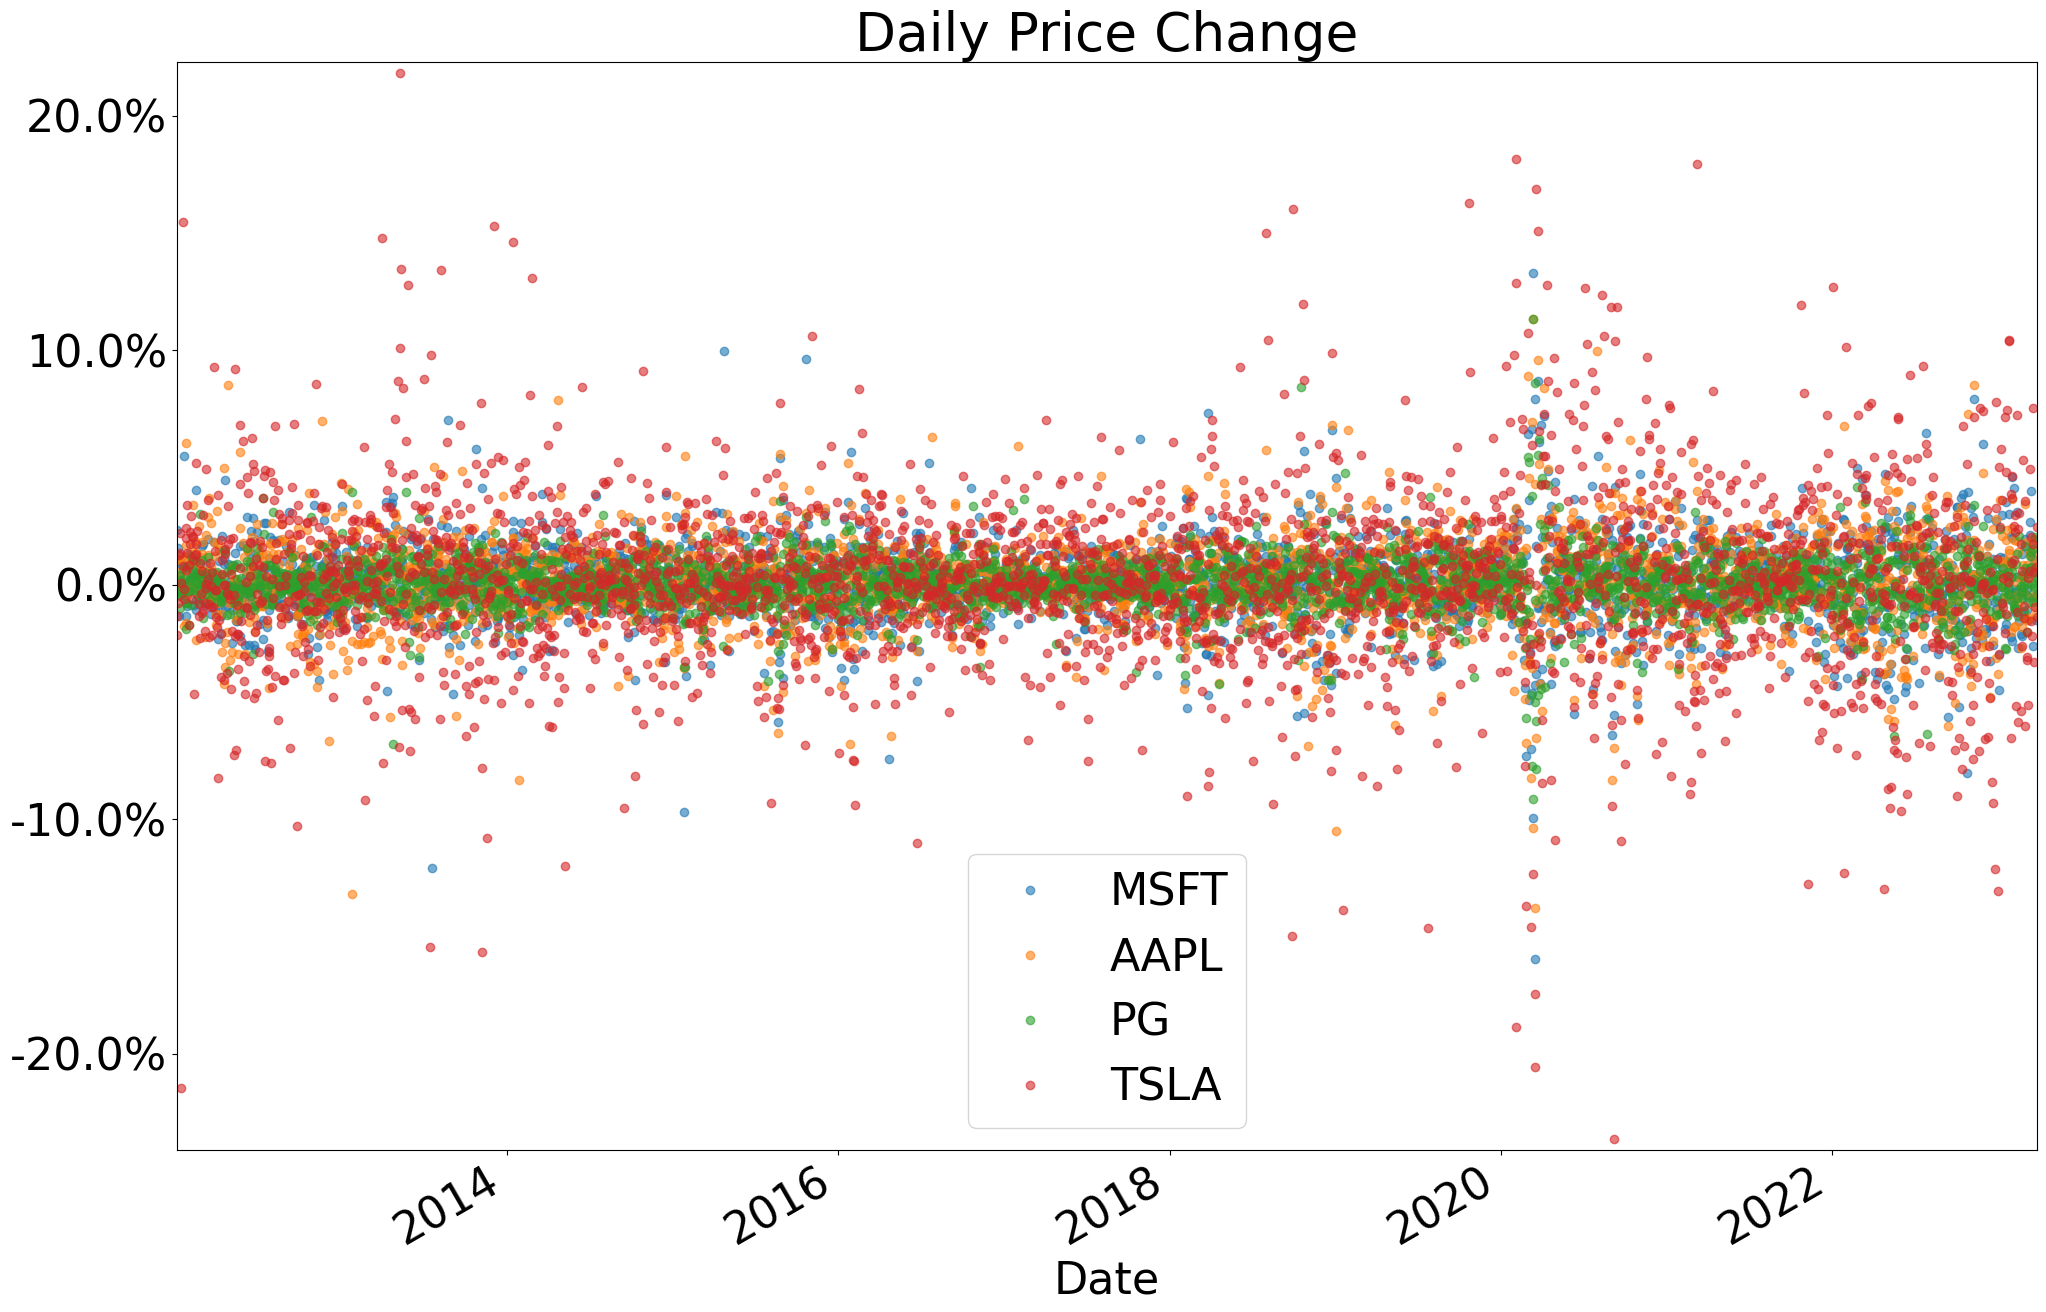

In [24]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data.keys():
    price_change_data[key].plot.line(marker = ".",
                                     markersize = 12, 
                                     alpha = .6,
                                     ls = "", 
                                     ax = ax)
ax.set_title("Daily Price Change")

# access y-axis values
y_vals = ax.get_yticks()

# transformed the y axis values to be in terms of % instead of decimal
ax.set_yticklabels([str(round(y *100,1)) + "%" for y in y_vals])
plt.legend()

plt.show()
plt.close()

In [25]:
# measured by % since we have multiplied by 100

stats_df = gather_statistics(price_change_data.mul(100),
                             sample = True).round(2)
stats_df

MSFT  AAPL     PG   TSLA
mean      0.08  0.08   0.03   0.16
median    0.06  0.08   0.04   0.14
variance  2.82  3.35   1.29  12.86
S.D.      1.68  1.83   1.13   3.59
skewness -0.22 -0.28  -0.04  -0.05
kurtosis  8.73  5.72  12.03   5.06

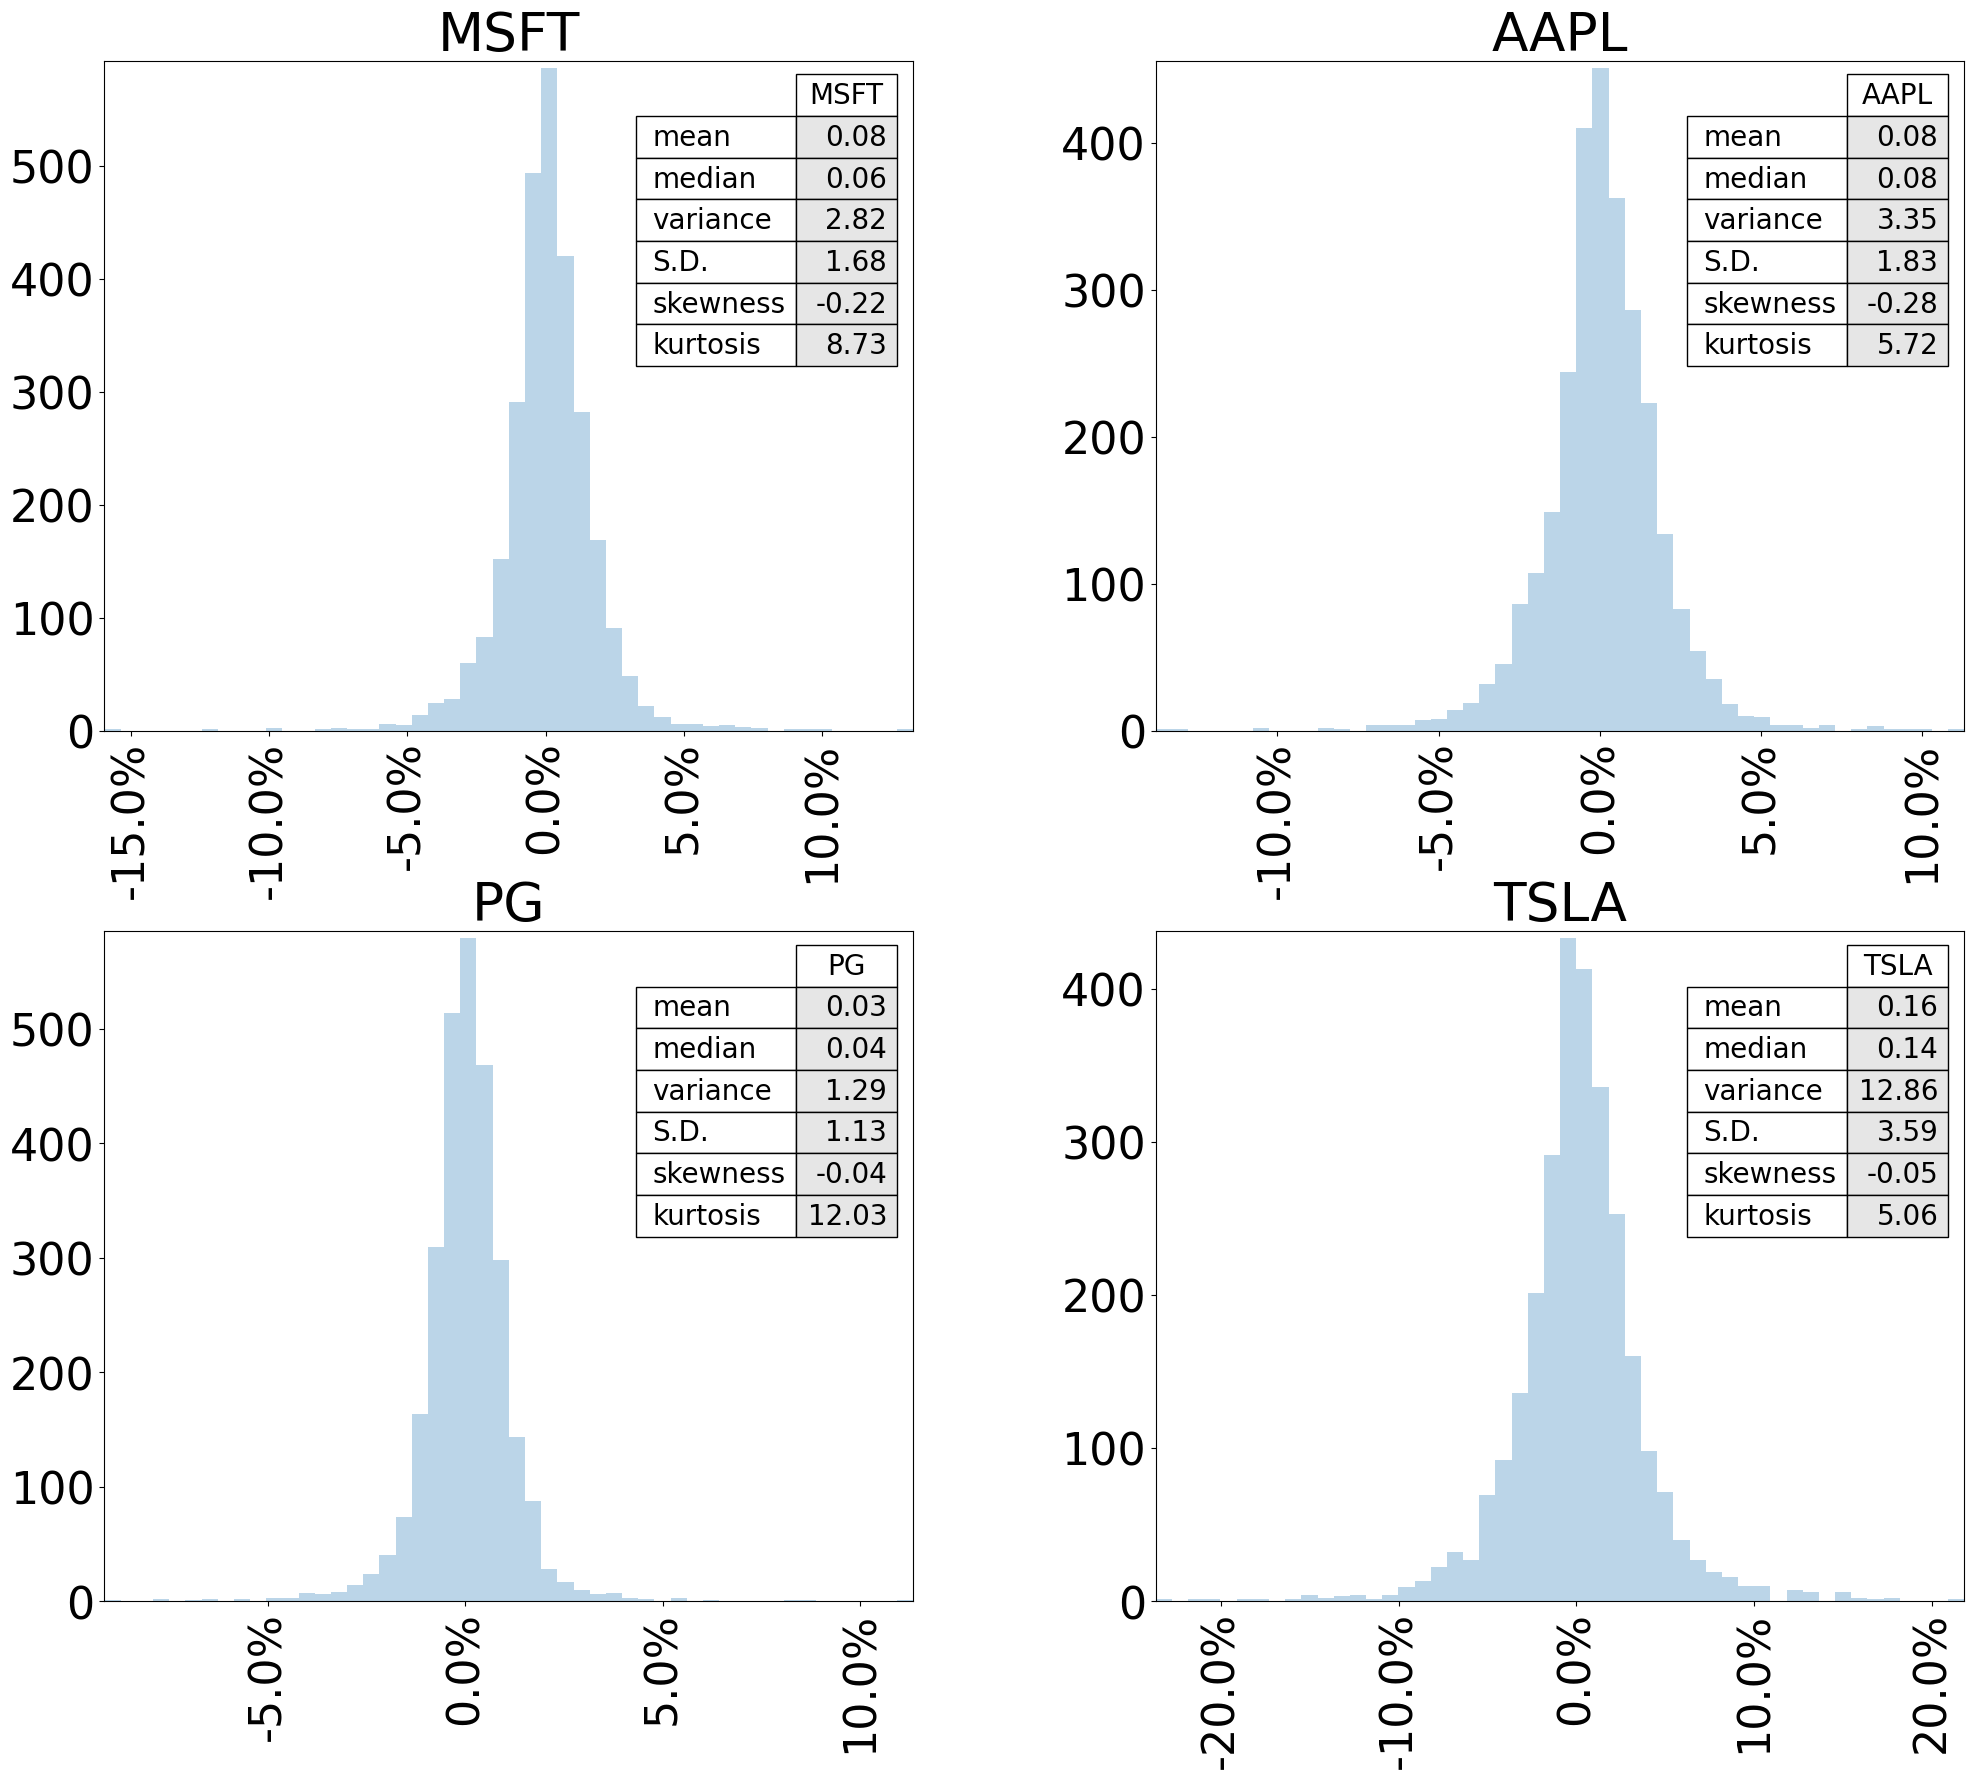

In [26]:
from pandas.plotting import table
# axs is a list of lists
# sublists contain relevant axis that comprise multiplot
fig, axs = plt.subplots(2,2, figsize = (24,20))
price_change_data.hist(bins = 50,
                      alpha = .3,
                      label = price_change_data.keys(),
                      ax = axs,
                      density = False)

# adjust the xtick labels in a multiplot by using a for loop
# to access sublists
for sublist in axs:
# and to access elements in each sublist
    for ax in sublist:
        x_vals = ax.get_xticks()
        ax.set_xticklabels([str(round(x *100,1)) + "%" for x in x_vals],
                         rotation = 90)
        
        
        # create a table for statistics by using the title to index stock
        stock = ax.get_title()
        hist_data = stats_df[stock]
        
        stats = table(ax, hist_data,
                     colWidths = [.1],
                     cellColours = [[(.9,.9,.9)]] * 6,
                     loc = "upper right")
        stats.scale(1.25, 2.5)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        ax.grid(False)
        

In [27]:
# measure data in terms of standard deviation
price_change_data.div(price_change_data.mean())

MSFT       AAPL         PG       TSLA
Date                                                  
2012-01-03        NaN        NaN        NaN        NaN
2012-01-04  27.990648   6.331669  -1.612827  -8.081169
2012-01-05  12.234357  13.043072 -15.089036 -13.111816
2012-01-06  18.549544  12.285497  -8.650436  -4.735880
2012-01-09 -15.944031  -1.875319  15.124928   7.649395
...               ...        ...        ...        ...
2023-03-23  23.500479   8.204814  -4.993260   3.400837
2023-03-24  12.545747   9.771279  72.462052  -5.763925
2023-03-27 -18.105832 -14.612683 -18.901842   4.463040
2023-03-28  -5.017371  -4.711529  10.077030  -8.379121
2023-03-29  22.865855  23.151433  11.027538  14.918760

[2828 rows x 4 columns]

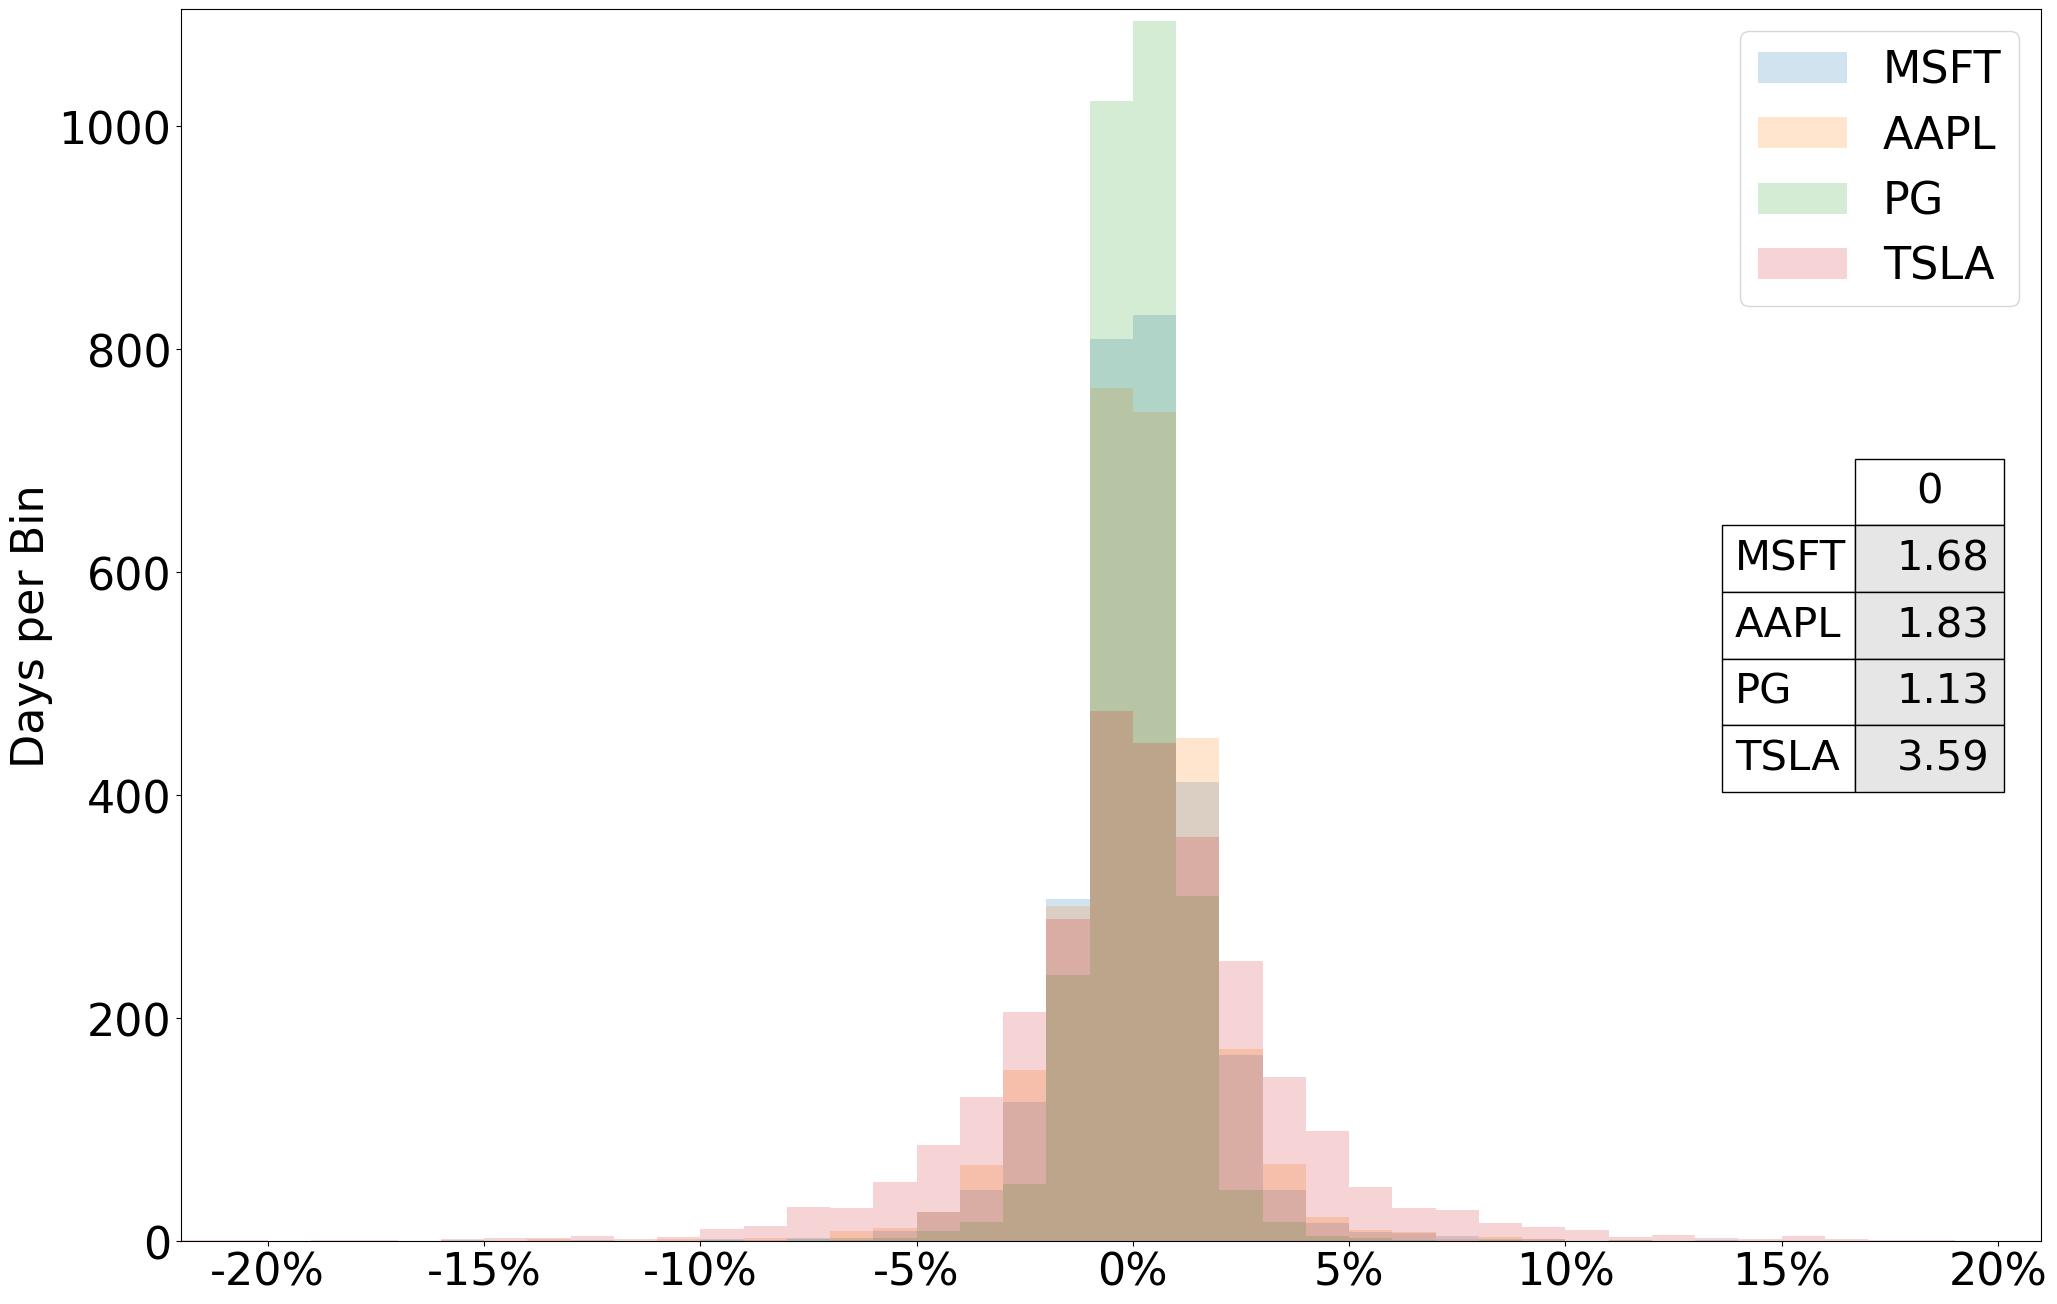

In [28]:
plot_data = price_change_data.mul(100)
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    
                                # set bins to be length of 1%
    plot_data[key].hist(bins = [x for x in range(-22,22,1)],
                               alpha = .2,
                               label = key,
                               density = False,
                               ax = ax)
    
ax.set_ylabel("Days per Bin")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
std_df = round(plot_data.std(),2)
# std_df.rename(keys = {0:"SD"}, inplace = True)
stats = table(ax, 
              std_df, 
              colWidths = [.1], 
              cellColours = [[(.9,.9,.9)]] * 4, 
              loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

In [29]:
plot_data.std()
# take the standard deviation of the plot_data

MSFT    1.679530
AAPL    1.830879
PG      1.133821
TSLA    3.585966
dtype: float64

In [30]:
# Create a new dataframe that divides price change by standard deviation for 
# each datapoint to measure movement
norm_plot_data = price_change_data.div(price_change_data.std())
norm_plot_data


MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  1.384978  0.292739 -0.039599 -0.369898
2012-01-05  0.605356  0.603034 -0.370475 -0.600165
2012-01-06  0.917832  0.568008 -0.212391 -0.216775
2012-01-09 -0.788911 -0.086704  0.371356  0.350134
...              ...       ...       ...       ...
2023-03-23  1.162805  0.379342 -0.122597  0.155666
2023-03-24  0.620764  0.451766  1.779131 -0.263831
2023-03-27 -0.895877 -0.675604 -0.464089  0.204286
2023-03-28 -0.248260 -0.217833  0.247417 -0.383536
2023-03-29  1.131403  1.070385  0.270755  0.682874

[2828 rows x 4 columns]

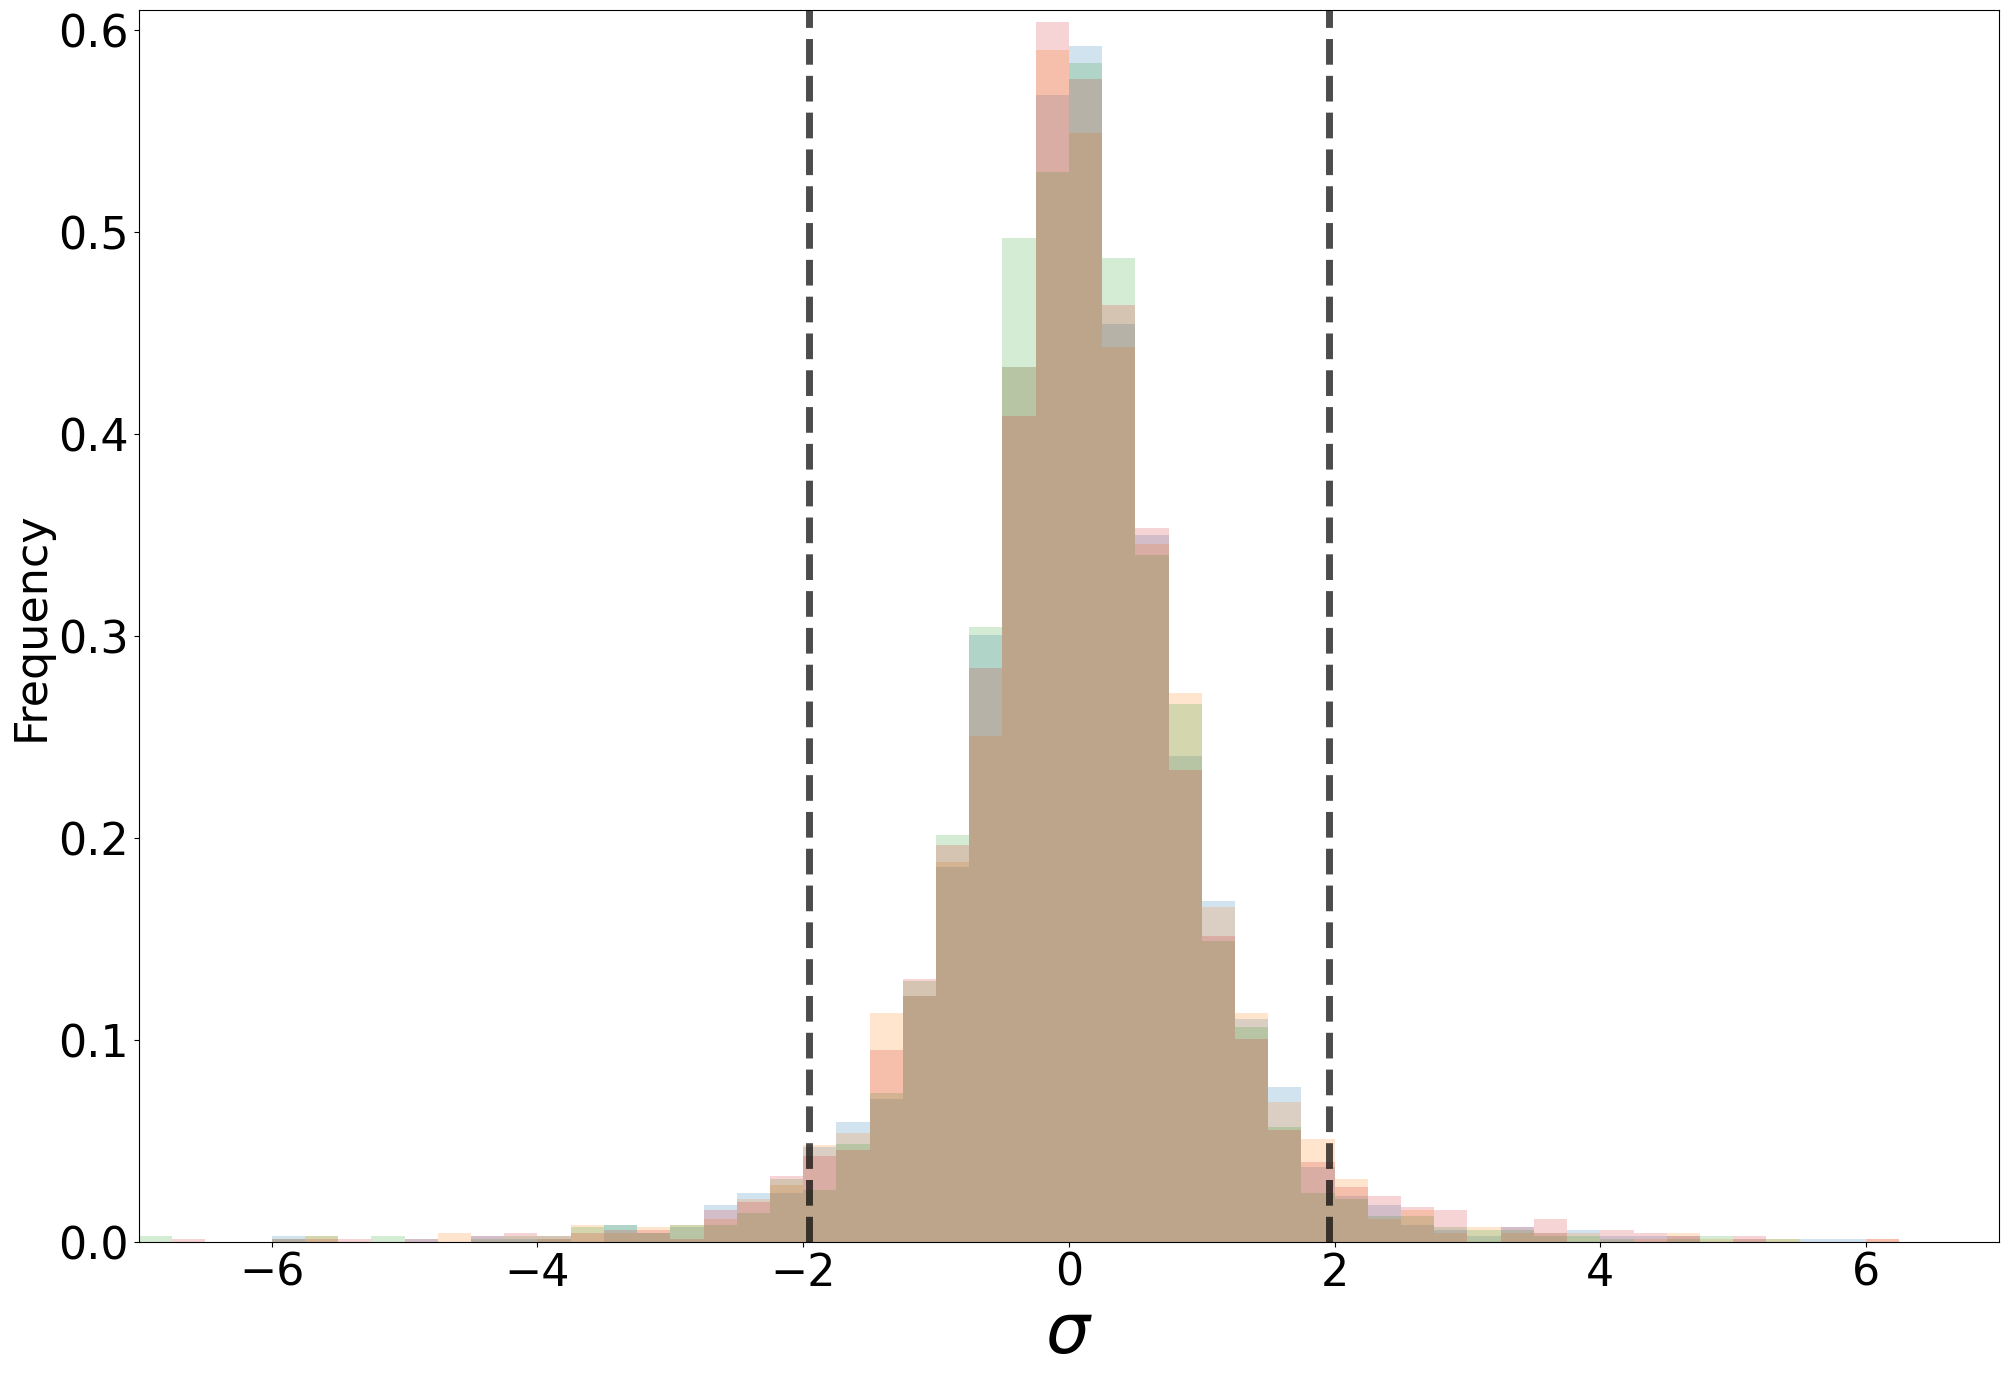

In [31]:
# replot after standardizing data by standard deviation
fig, ax = plt.subplots(figsize = (24, 16))

# cycles through the keys in norm_plot_data and bins it using generator
for key in norm_plot_data:
    
                                # set bins to be length of 1%
    norm_plot_data[key].hist(bins = [x / 4 for x in range(-28,29,1)],
                               alpha = .2,
                               label = key,
                             # Setting Density true shows frequency by units
                             # of standard deviations
                               density = True,
                               ax = ax)
    
ax.set_ylabel("Frequency")
ax.set_xlabel("$\sigma$", fontsize = 50)

# If we assume this to be a normal distribution, 95% of the body of the 
# distribution should lie between -1.96 and 1.96 SD from the mean.

# Create lines to denote +-1.96 standard deviations.
ax.axvline(-1.96, linewidth = 5, ls = "--", color = "k", alpha = .7)
ax.axvline(1.96, linewidth = 5, ls = "--", color = "k", alpha = .7)

# Remove gridlines on graph since they distract and are meaningless
ax.grid(False)

In [32]:
# Beta is a measure of volatility, there is a theory that as Beta goes up,
# return goes up, and you can calculate return based off of Beta.
# Since shorter periods of time are theorized as less risky, a short-term bond
# or stock trade is theorized to give a lower return, so Beta is theorized risk

In [33]:
# need to get close data for the S&P so we can compare volatility

price_change_data["S&P 500"] = web.get_data_yahoo("^GSPC",
                                                 start = start,
                                                 end = end)["Close"]

[*********************100%***********************]  1 of 1 completed


In [34]:
# we need to redefine the S&P by adjusting for log
price_change_data

MSFT      AAPL        PG      TSLA      S&P 500
Date                                                           
2012-01-03       NaN       NaN       NaN       NaN  1277.060059
2012-01-04  0.023261  0.005360 -0.000449 -0.013264  1277.300049
2012-01-05  0.010167  0.011041 -0.004201 -0.021522  1281.060059
2012-01-06  0.015415  0.010400 -0.002408 -0.007773  1277.810059
2012-01-09 -0.013250 -0.001587  0.004211  0.012556  1280.699951
...              ...       ...       ...       ...          ...
2023-03-23  0.019530  0.006945 -0.001390  0.005582  3948.719971
2023-03-24  0.010426  0.008271  0.020172 -0.009461  3970.989990
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326  3977.530029
2023-03-28 -0.004170 -0.003988  0.002805 -0.013753  3971.270020
2023-03-29  0.019002  0.019597  0.003070  0.024488  4027.810059

[2828 rows x 5 columns]

In [35]:
# override previous S&P with log difference function
price_change_data["S&P 500"] = np.log(price_change_data["S&P 500"]).diff()
price_change_data

MSFT      AAPL        PG      TSLA   S&P 500
Date                                                        
2012-01-03       NaN       NaN       NaN       NaN       NaN
2012-01-04  0.023261  0.005360 -0.000449 -0.013264  0.000188
2012-01-05  0.010167  0.011041 -0.004201 -0.021522  0.002939
2012-01-06  0.015415  0.010400 -0.002408 -0.007773 -0.002540
2012-01-09 -0.013250 -0.001587  0.004211  0.012556  0.002259
...              ...       ...       ...       ...       ...
2023-03-23  0.019530  0.006945 -0.001390  0.005582  0.002980
2023-03-24  0.010426  0.008271  0.020172 -0.009461  0.005624
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326  0.001646
2023-03-28 -0.004170 -0.003988  0.002805 -0.013753 -0.001575
2023-03-29  0.019002  0.019597  0.003070  0.024488  0.014137

[2828 rows x 5 columns]

In [36]:
# use the covariance and variance to calculate beta of each individual stock
# can use this same formula to compare a portfolio...

def calculate_beta(data, stock_key, market_key):
    df = data[[stock_key, market_key]].dropna()
    stock_cov = covariance(df[stock_key], df[market_key], sample = True)
    market_var = variance(df[market_key], sample = True)
    beta = stock_cov / market_var
    
    return beta

betas = {}
for stock in stocks:
    betas[stock] = calculate_beta(price_change_data, stock, "S&P 500")
pd.DataFrame(betas, index = ["$\\beta$"]).T

$\beta$
MSFT  1.188877
AAPL  1.173280
PG    0.582183
TSLA  1.447432

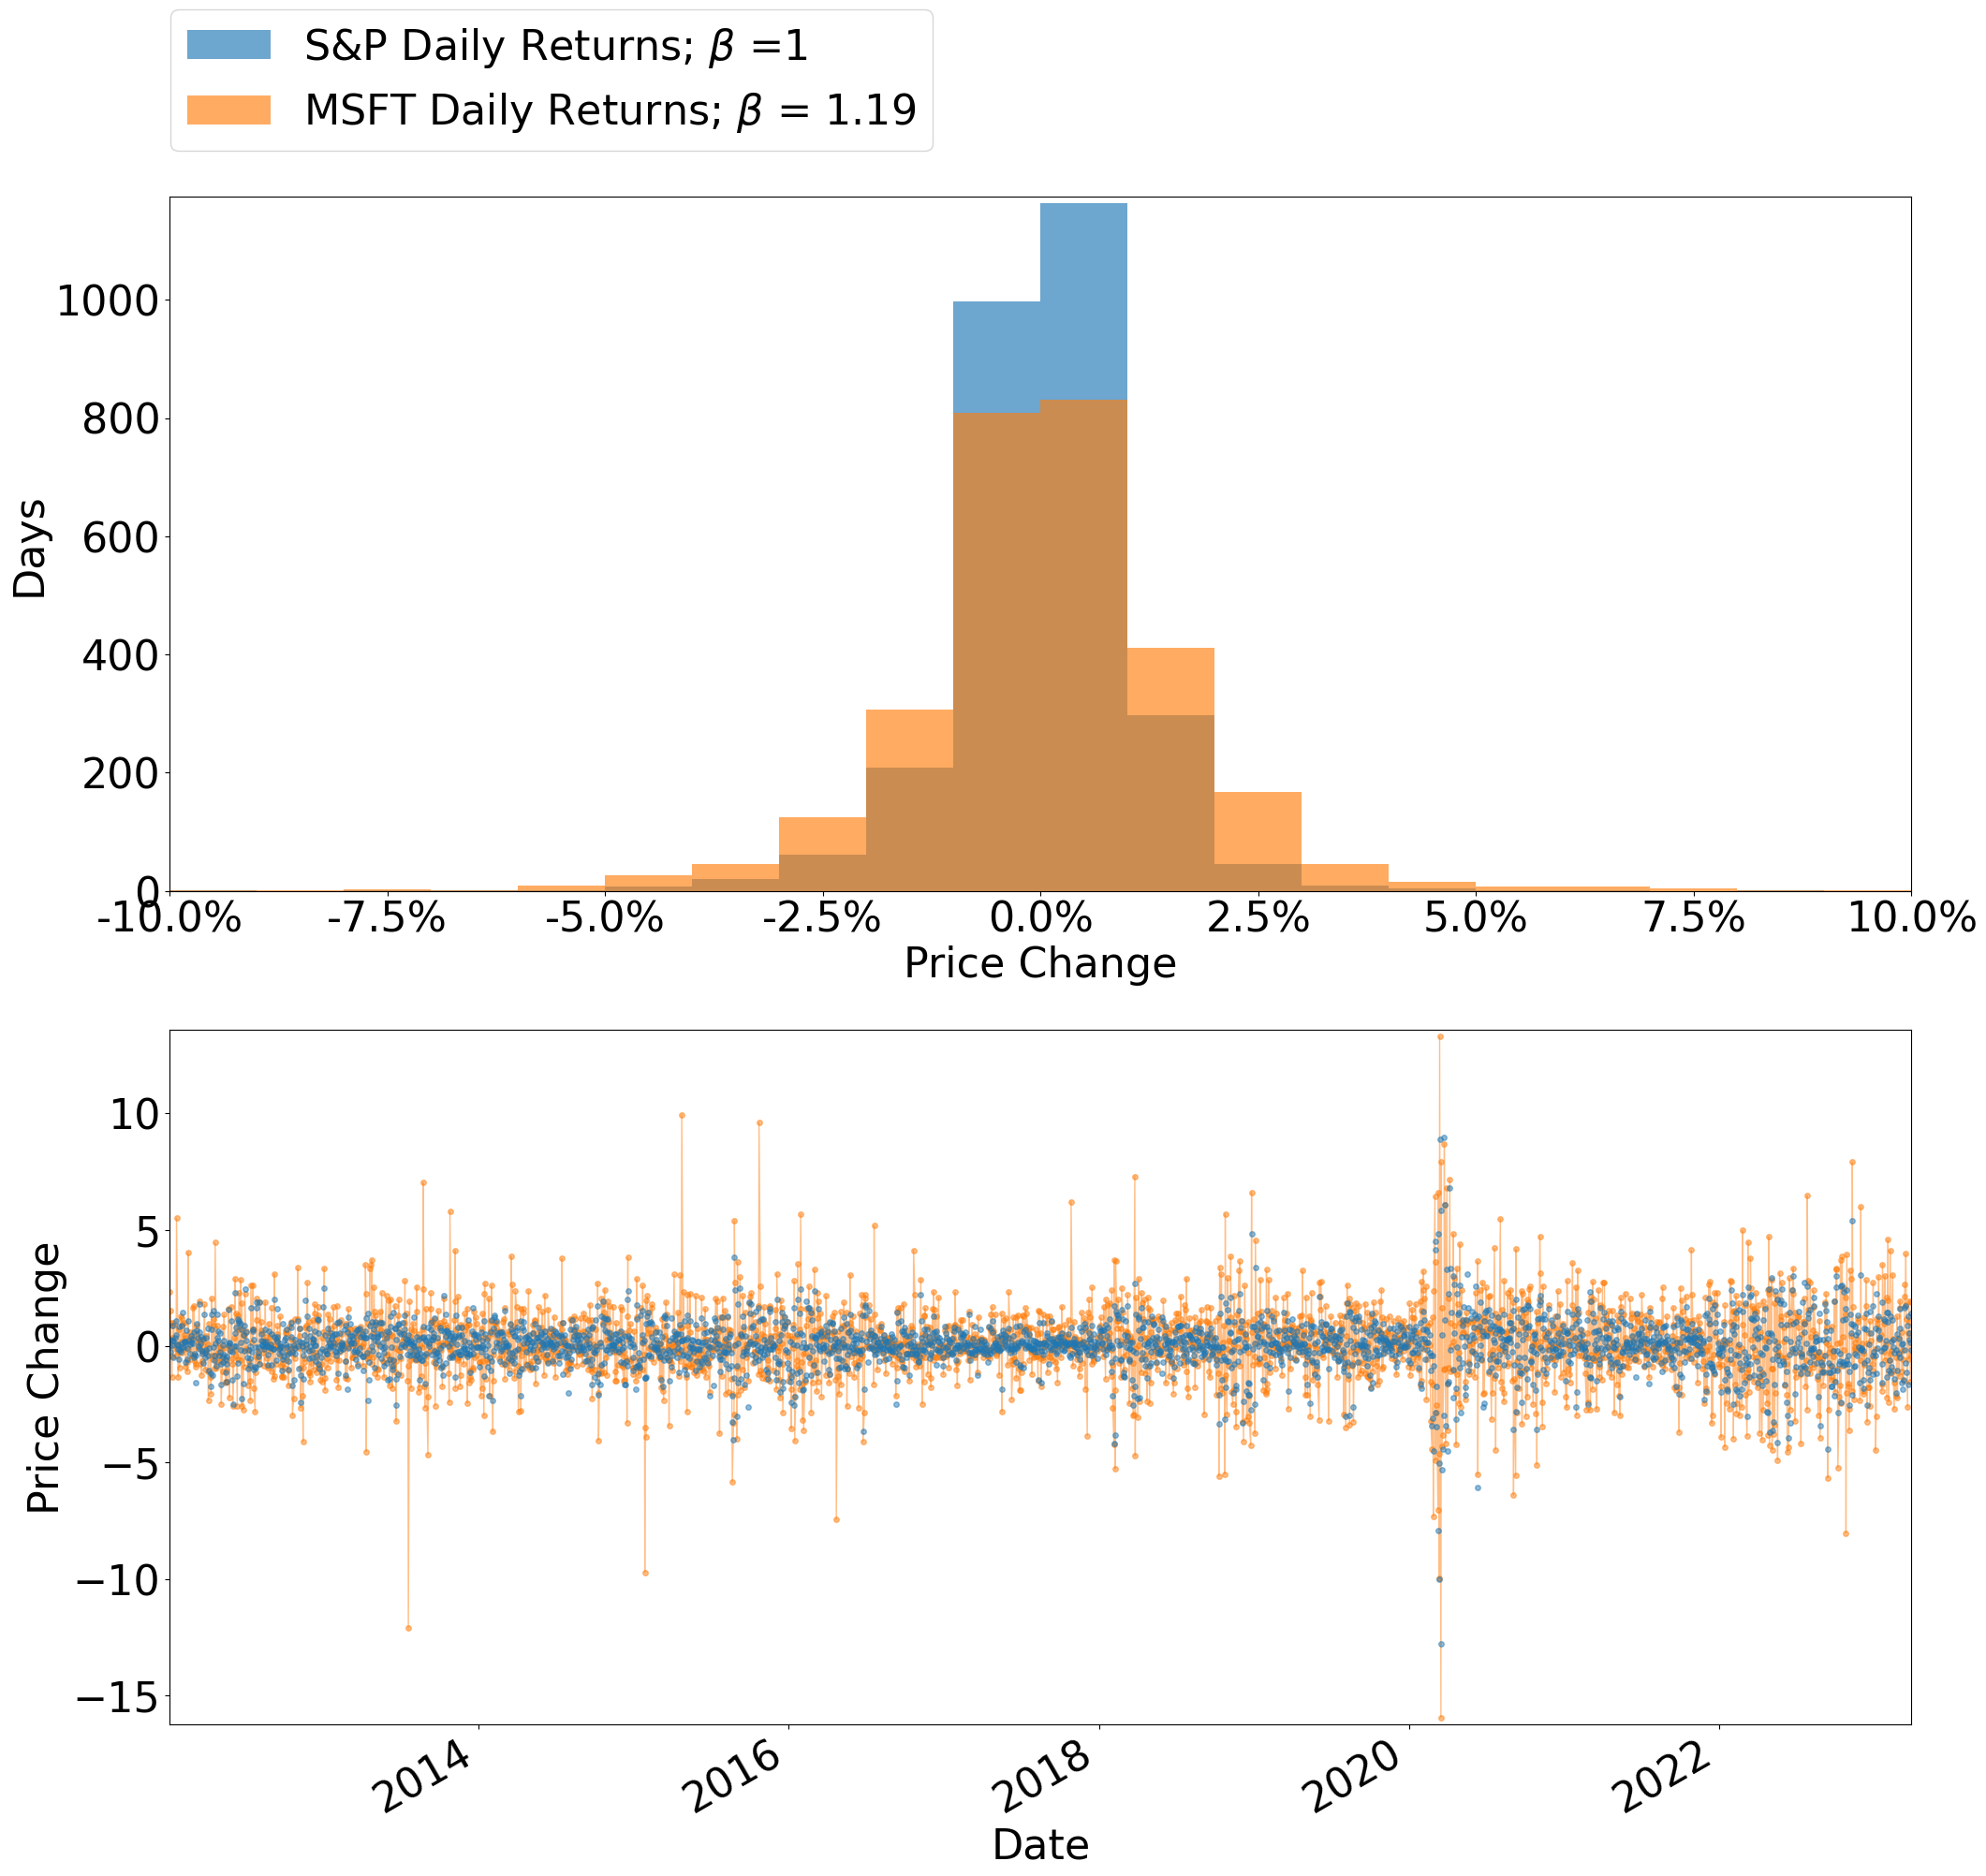

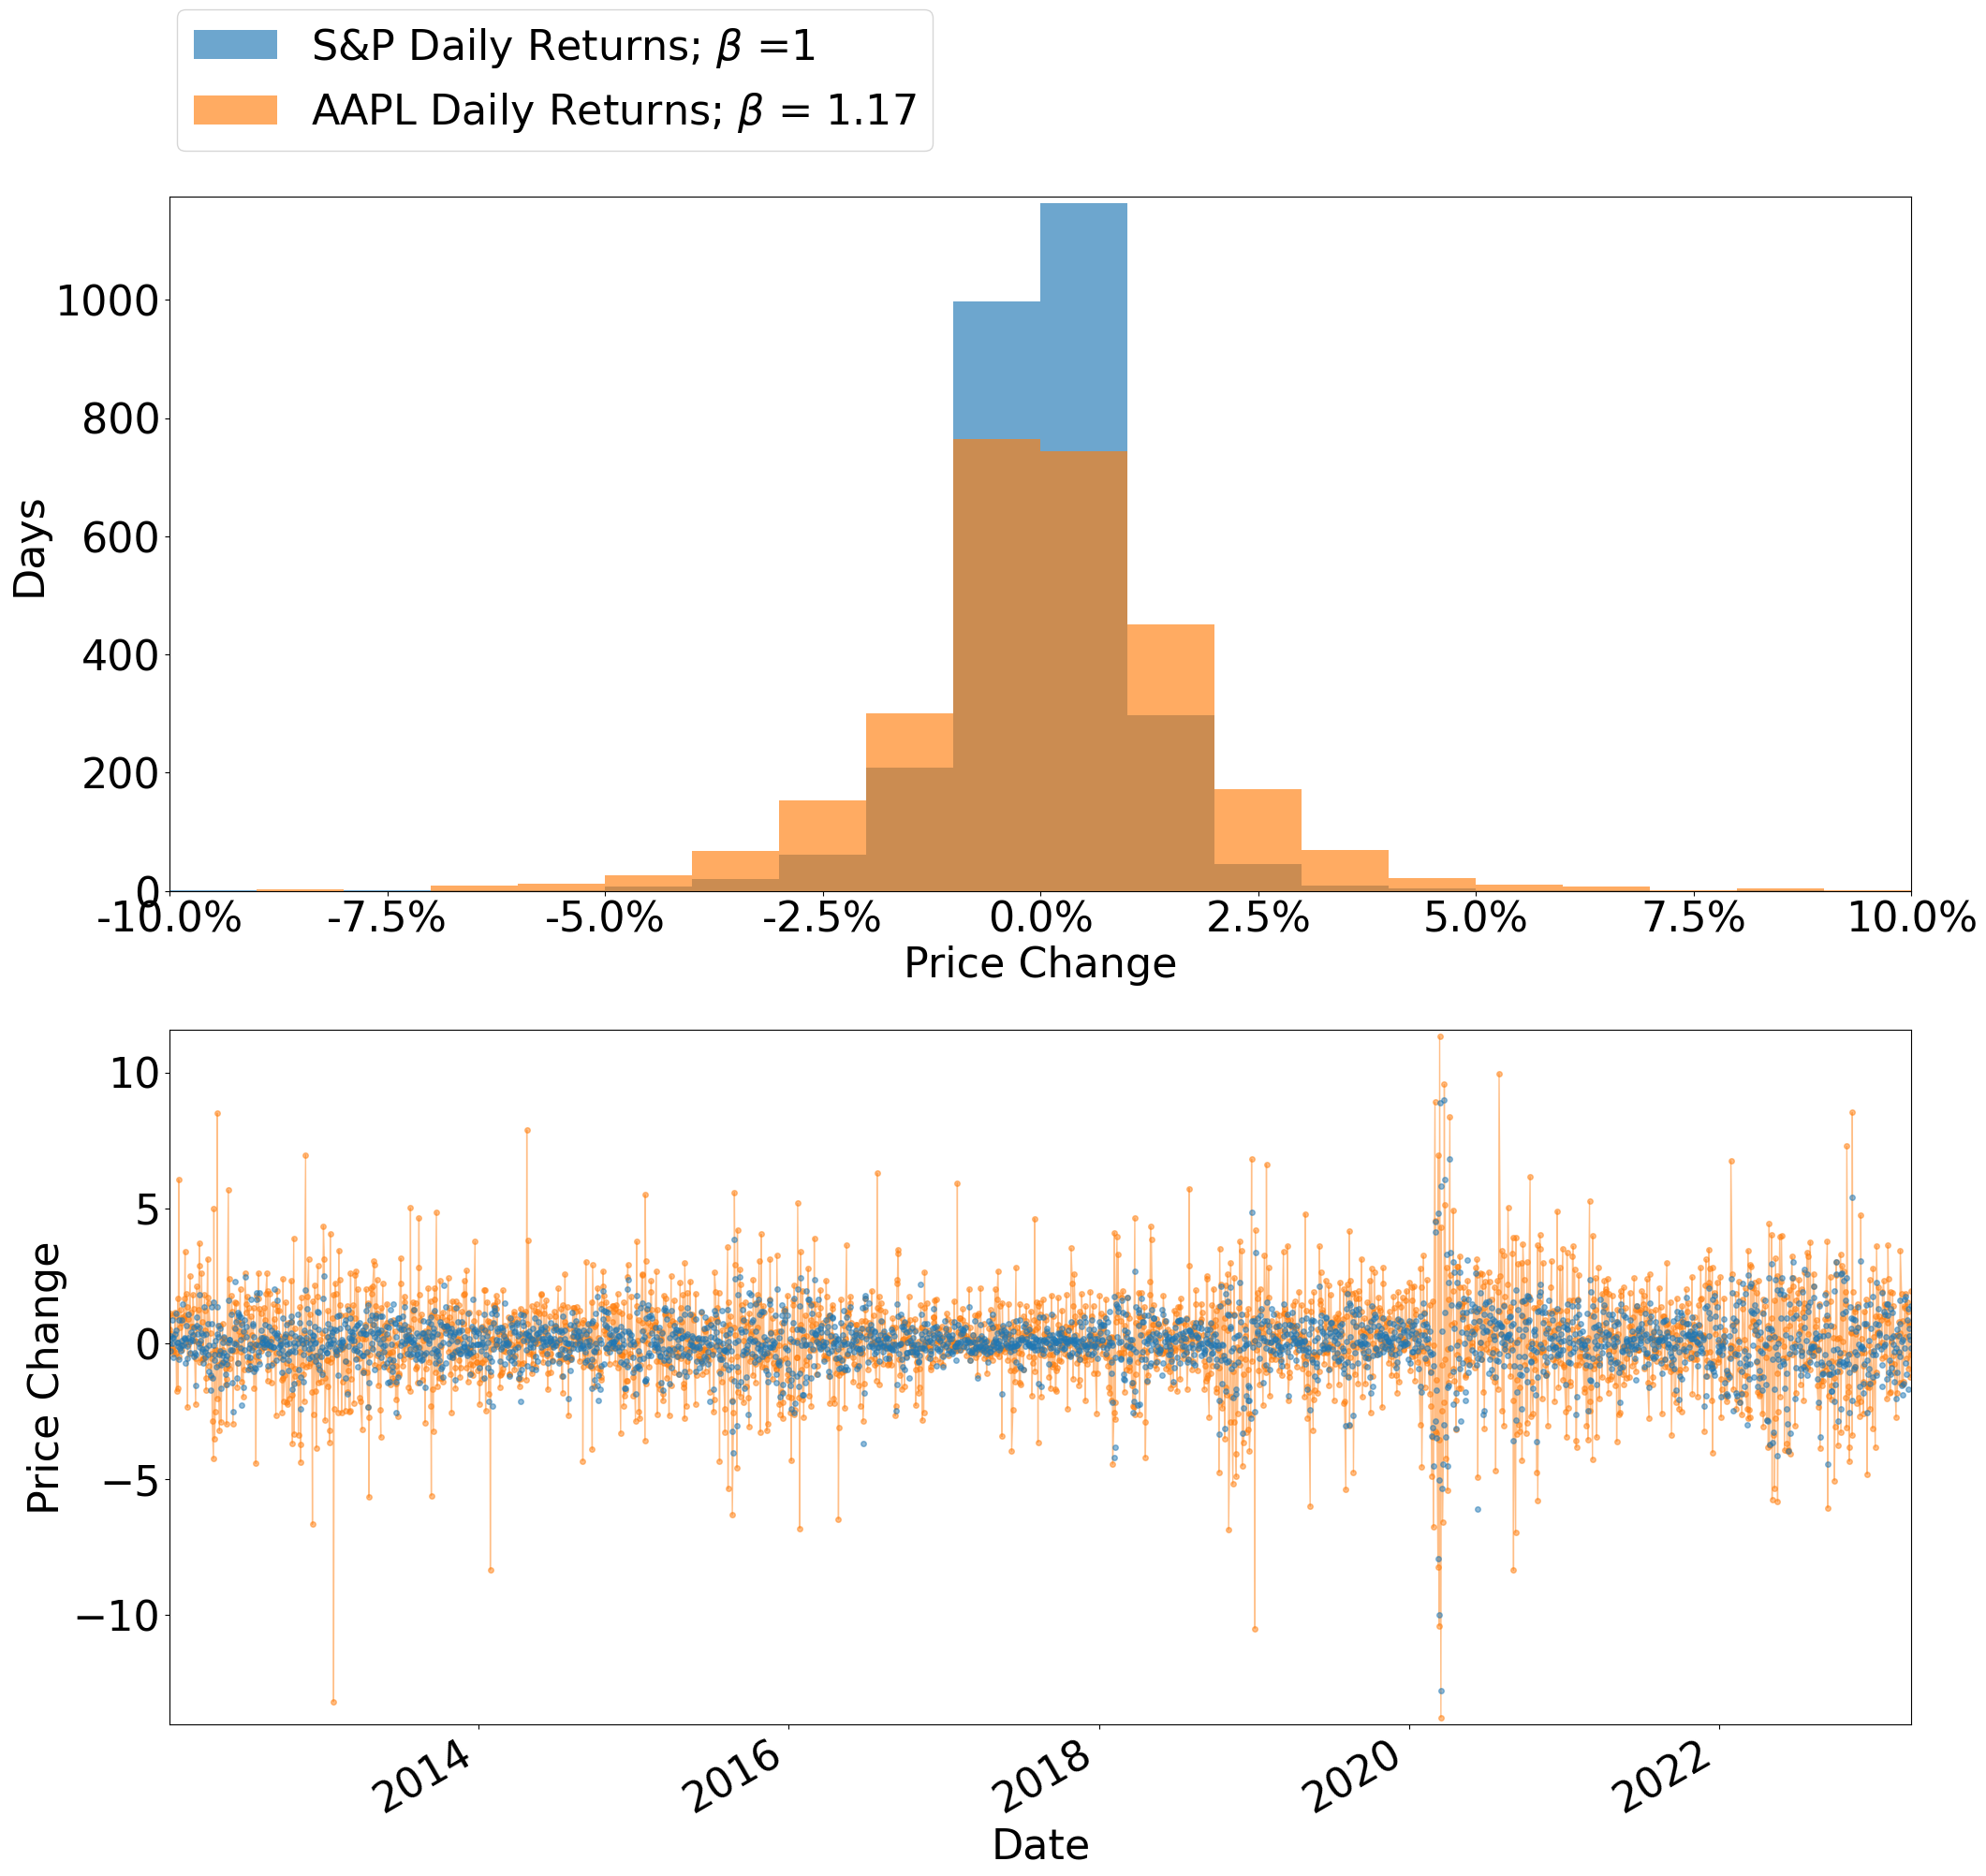

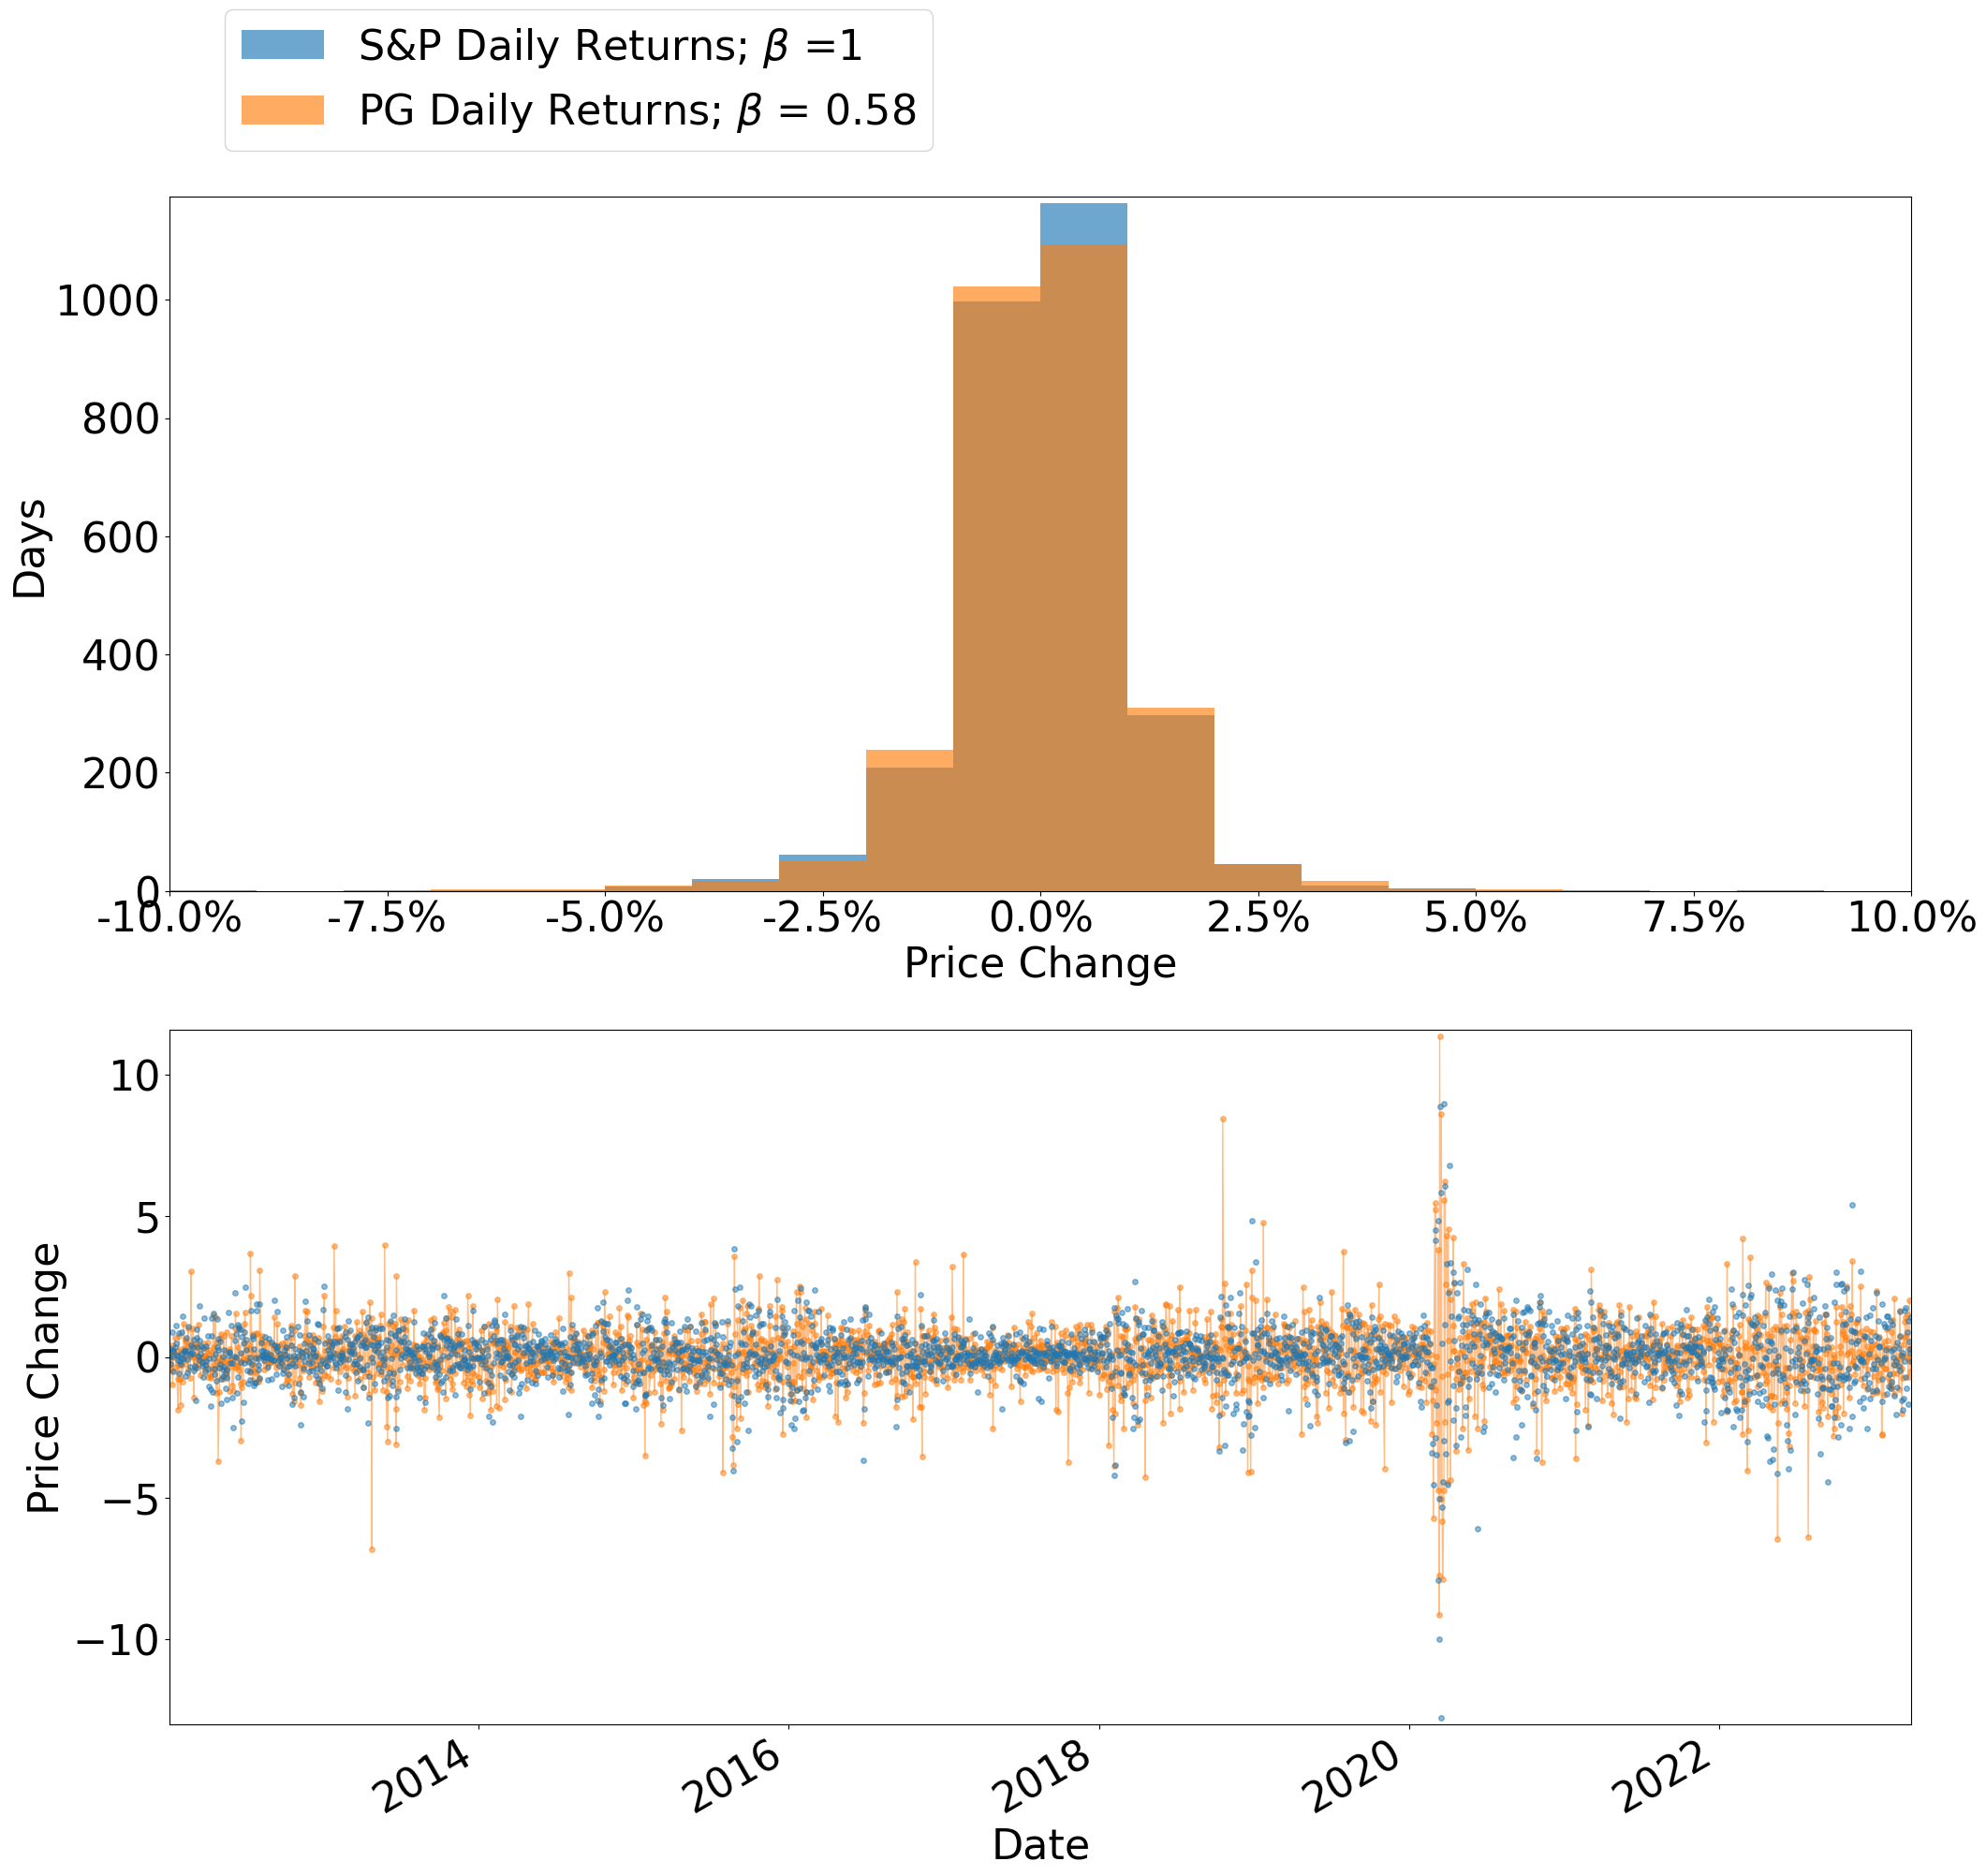

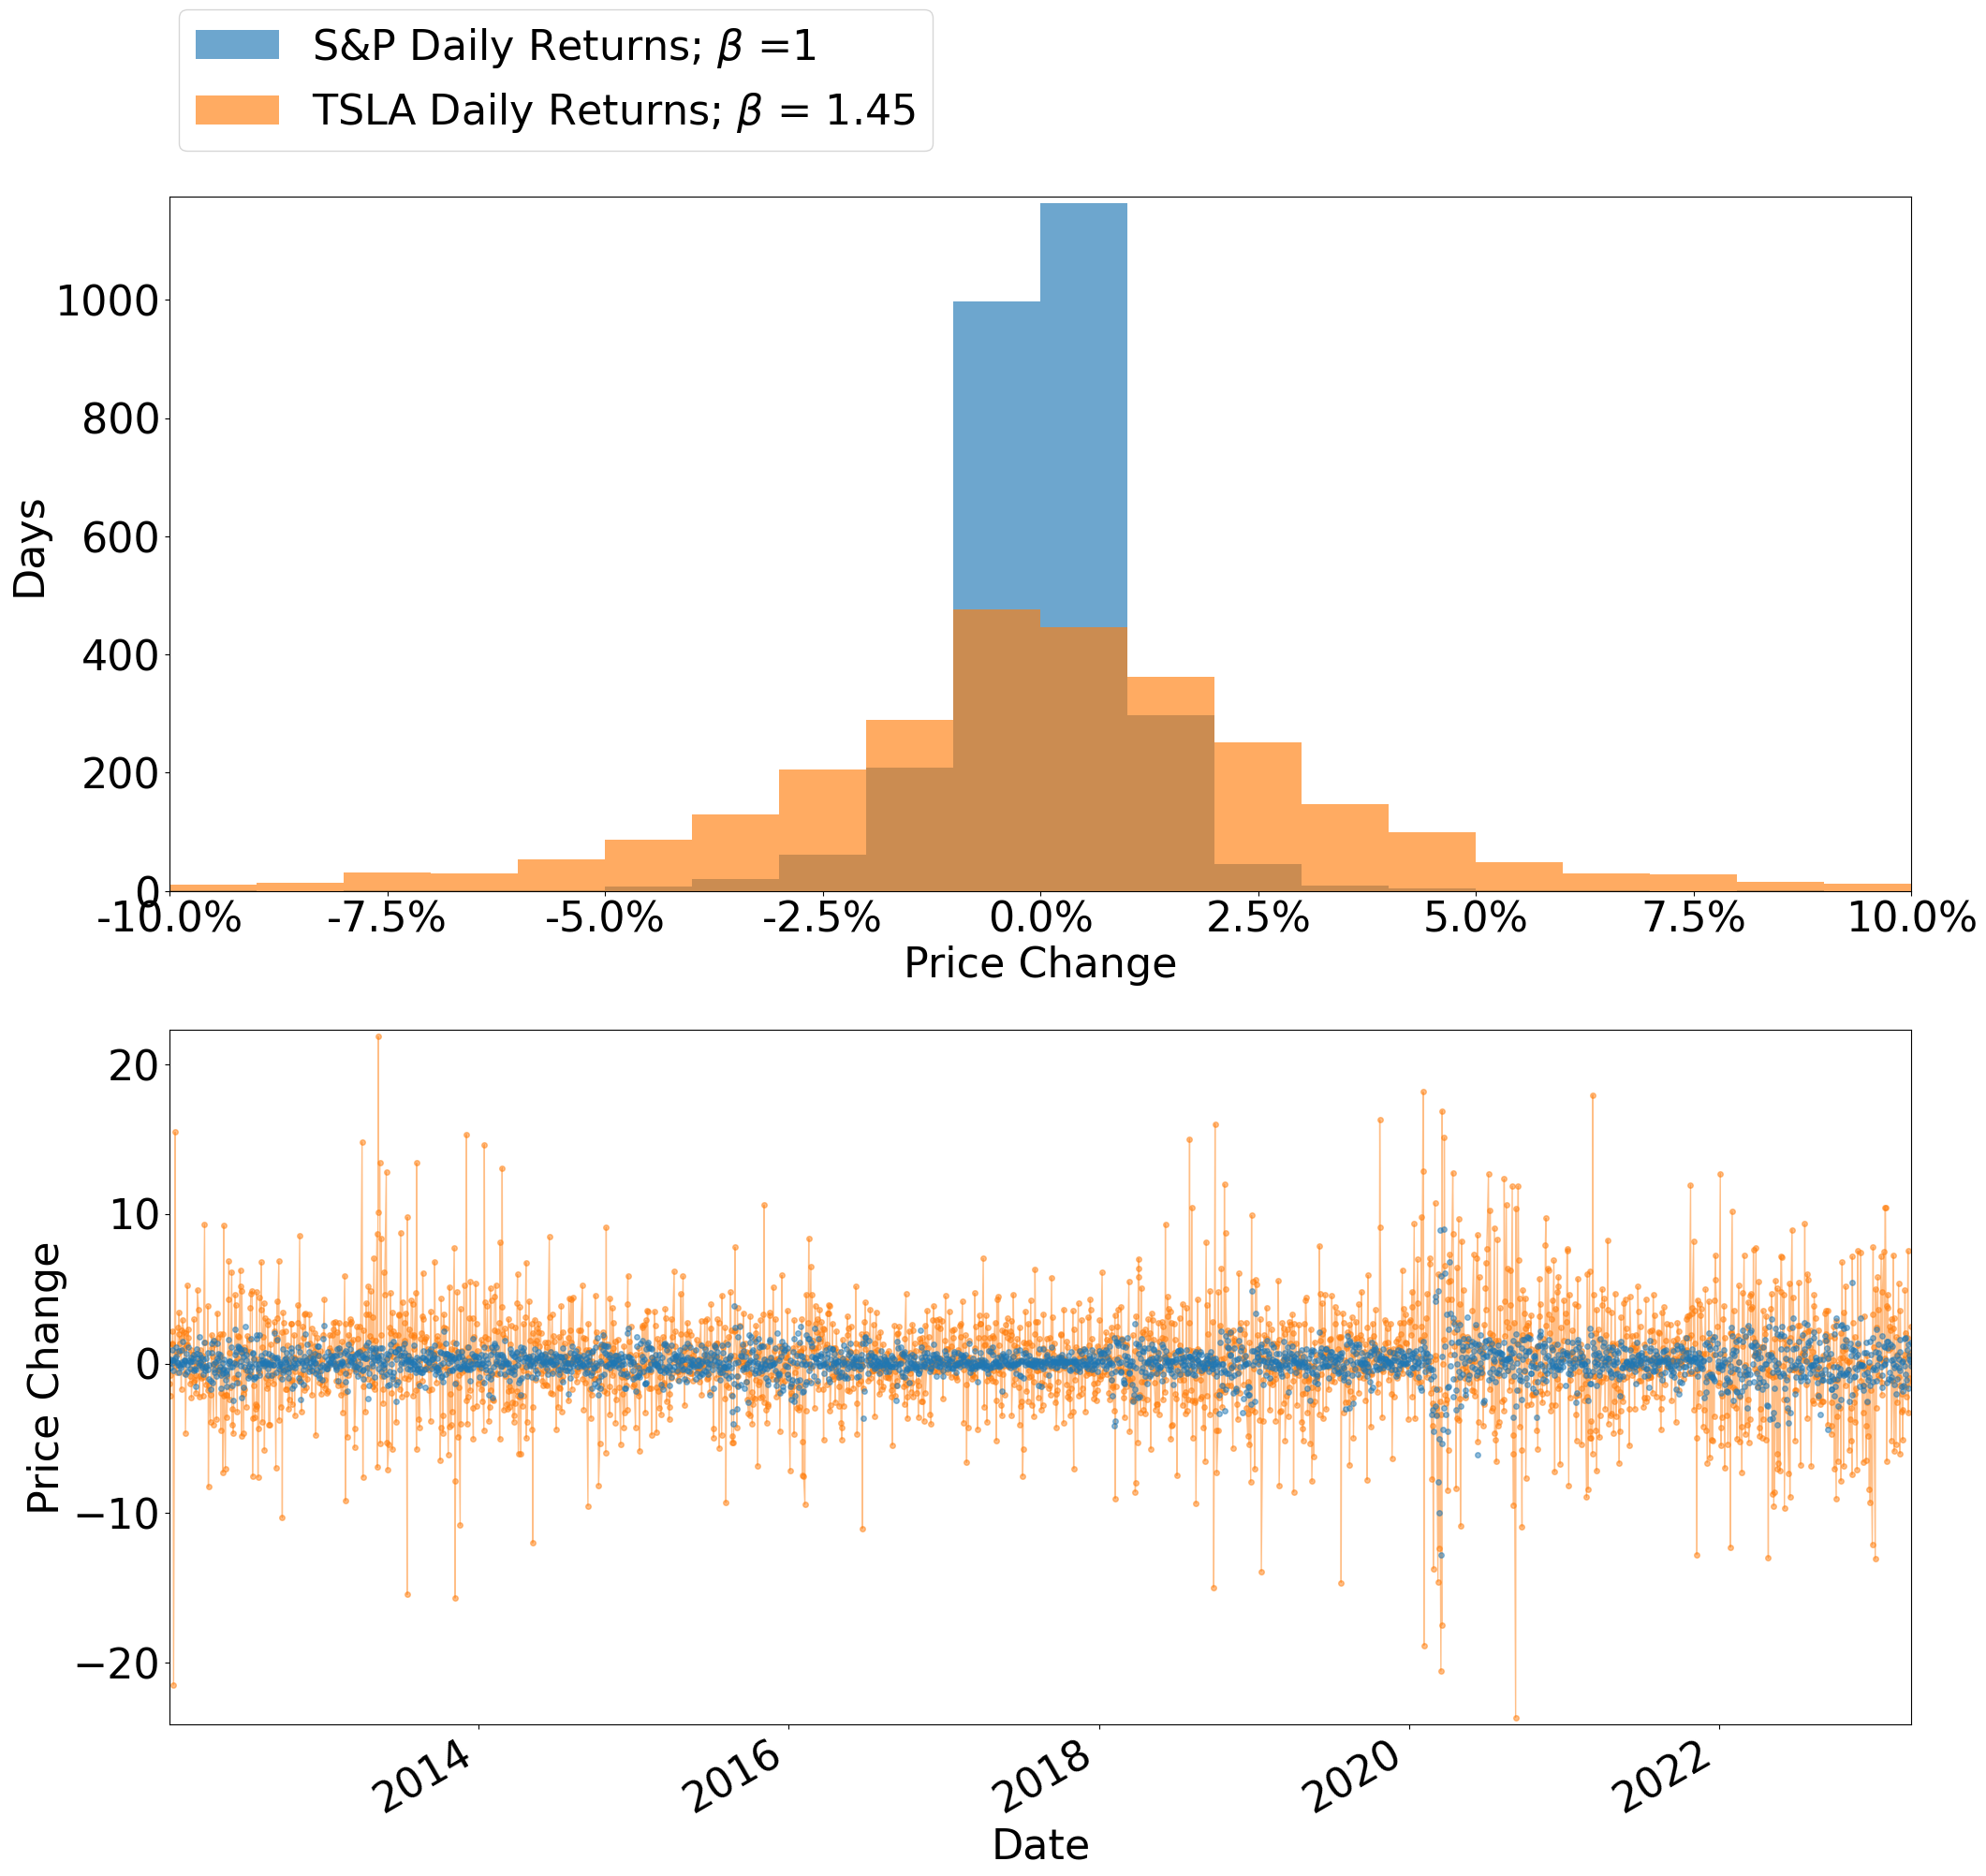

In [37]:
plot_data = price_change_data.mul(100)

for stock in stocks:
    fig, ax = plt.subplots(2, 1, figsize = (24,24))
    ## plot the distribution of data for S&P alongside each stock
    plot_data["S&P 500"].hist(
        bins = [x for x in range(-10,11,1)],
        label = "S&P Daily Returns; $\\beta$ =" + str(1),
        ax = ax[0],
        density = False,
        alpha = .65)
    
    plot_data[stock].hist(
        bins = [x for x in range(-10,11,1)],
        label = stock +" Daily Returns; $\\beta$ = " + str(betas[stock].round(2)),
        ax = ax[0],
        density = False,
        alpha = .65)
    
    ax[0].legend(bbox_to_anchor = (.45, 1.3))
    ax[0].set_ylabel("Days")
    ax[0].set_xlabel("Price Change")
    ax[0].set_xticklabels([str(round(x,2)) + "%" for x in ax[0].get_xticks()])
    ax[0].grid(False)
    
    ## plot a ts scatter of data for S&P alongside each stock
    plot_data[stock].plot(linestyle = "-",
                          linewidth = 1,
                                     marker = "o",
                                     alpha = .5,
                                     markersize = 4,
                                     color = "C1",
                                     ax = ax[1])
    plot_data["S&P 500"].plot(linestyle = "",
                                     marker = "o",
                                     alpha = .5,
                                     markersize = 4,
                                     color = "C0",
                                     ax = ax[1])
    ax[1].set_ylabel("Price Change")

In [38]:
n = 100
m = 1000

dist_avgs = {"Die Rolls" : [],
            "Poisson":[],
            "Lognormal":[]}

# build a sample of m sample means from distributions of length n
for i in range(m):
    dist_avgs["Die Rolls"].append(np.average(np.random.randint(1,7,n)))
    dist_avgs["Poisson"].append(np.average(np.random.poisson(1,n)))
    dist_avgs["Lognormal"].append(np.average(np.random.lognormal(0,1,n)))

# each column is a sample of sample means
dist_avgs = pd.DataFrame(dist_avgs)
dist_avgs

Die Rolls  Poisson  Lognormal
0         3.68     0.88   1.626616
1         3.55     0.92   1.810083
2         3.27     0.96   1.378929
3         3.22     1.05   1.409123
4         3.41     1.08   1.499634
..         ...      ...        ...
995       3.44     1.15   1.645051
996       3.55     1.01   1.737507
997       3.40     1.08   1.515199
998       3.31     1.04   1.725499
999       3.50     0.98   1.609315

[1000 rows x 3 columns]

Text(0.5, 1.0, 'Non-Centered Distributions')

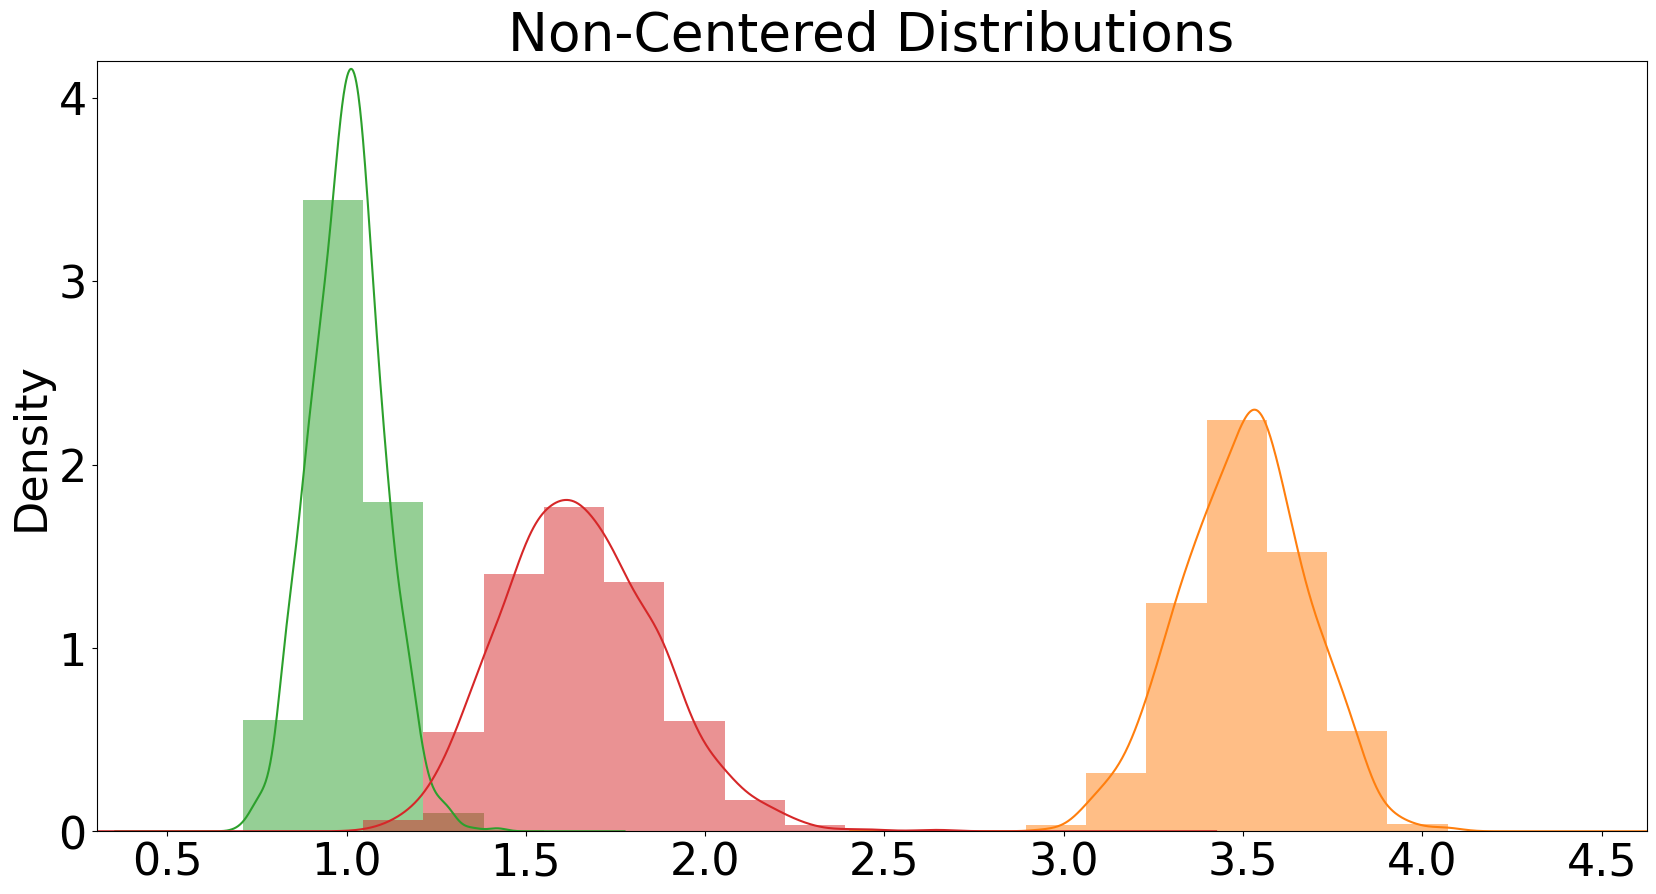

In [39]:
fig, ax = plt.subplots(figsize = (20,10))
dist_avgs.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color=["C1", "C2", "C3"],
                    alpha=.5,
                   legend = False)
dist_avgs.plot.kde(ax=ax, color=["C1", "C2", "C3"], legend=False)
ax.set_title("Non-Centered Distributions")

In [40]:
means_df = pd.DataFrame()
sd_df = pd.DataFrame()
for key in dist_avgs:
    ## Center Distributions
    # dataframe that centers distributions at zero by
    # subtracting the mean value from each sample mean+
    means_df[key] = dist_avgs[key].sub(dist_avgs.mean()[key])
    ## Normalize distributions
    # divide each observation by the distribution's standard deviation
    sd_df[key] = means_df[key] / means_df.std()[key]
    
sd_df
    

Die Rolls   Poisson  Lognormal
0     1.019438 -1.232085  -0.123579
1     0.276407 -0.831146   0.729836
2    -1.323966 -0.430207  -1.275713
3    -1.609747  0.471905  -1.135262
4    -0.523779  0.772609  -0.714244
..         ...       ...        ...
995  -0.352311  1.474252  -0.037826
996   0.276407  0.070966   0.392242
997  -0.580935  0.772609  -0.641841
998  -1.095341  0.371670   0.336387
999  -0.009374 -0.229738  -0.204057

[1000 rows x 3 columns]

## Below is extremely applicable to graphing out financials of Specific companies. Pay attention and use this when automating graphs

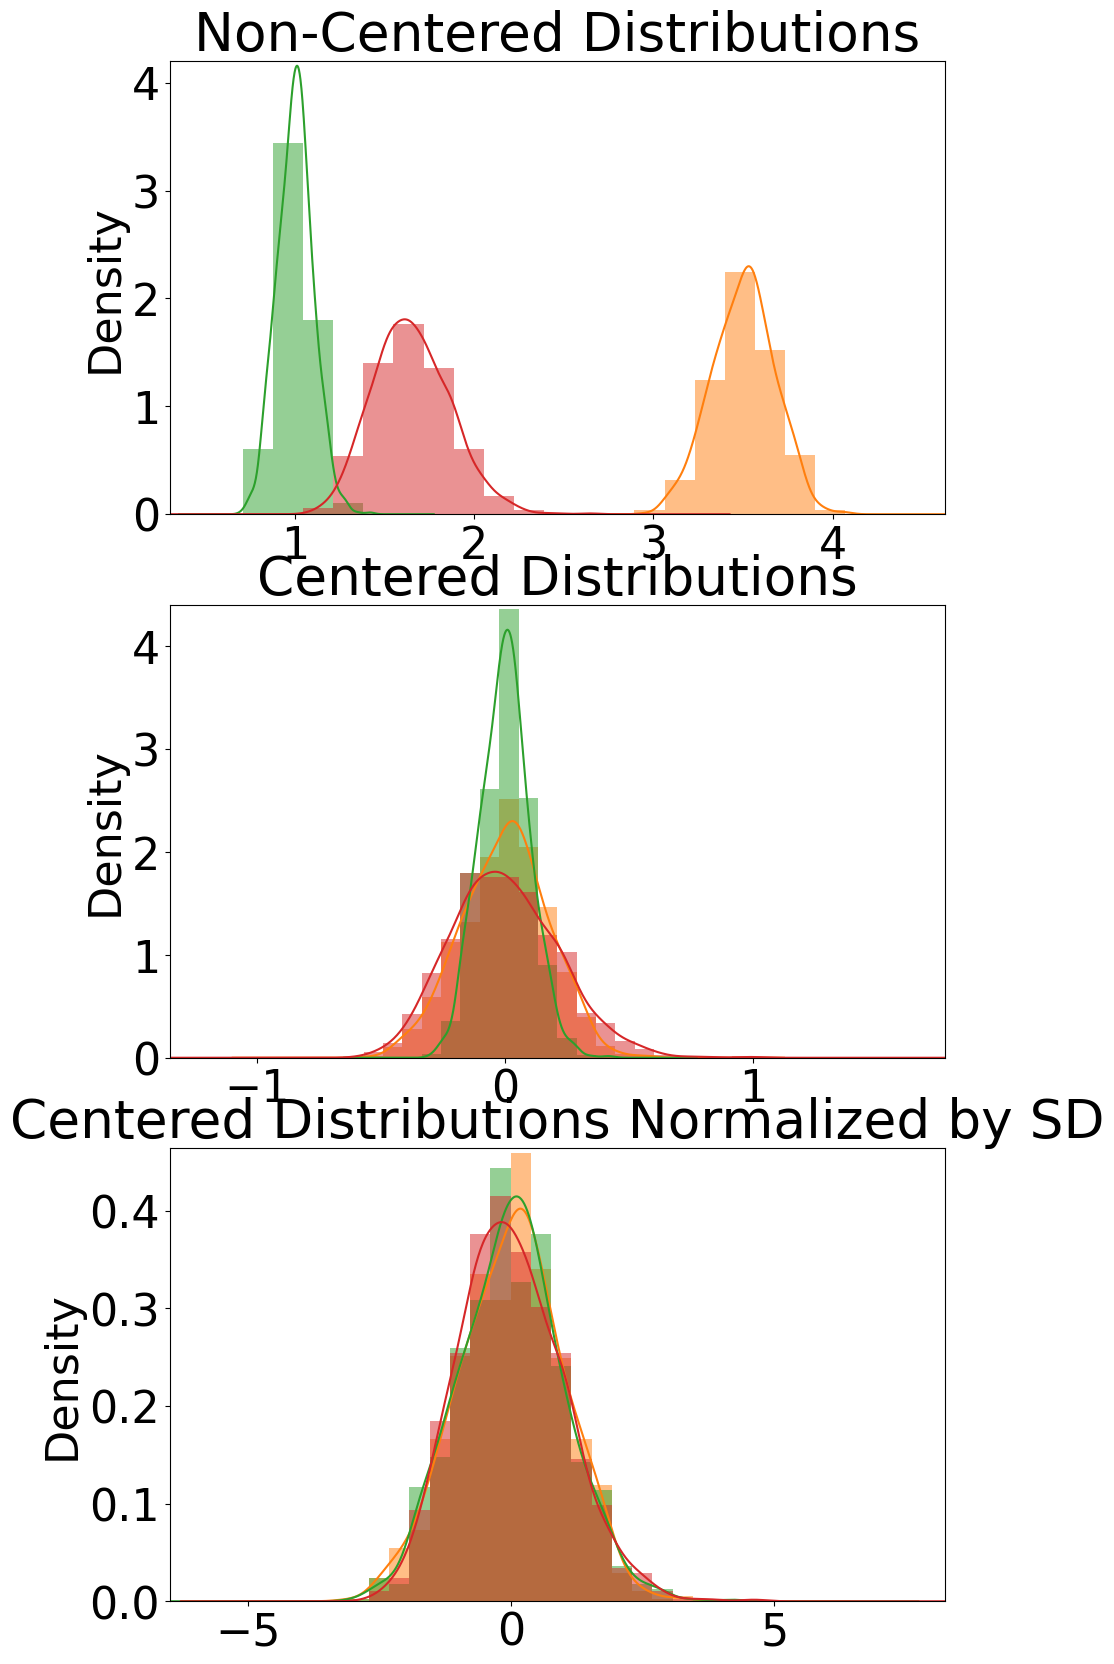

In [41]:
# save dfs in a single dictionary
df_dct = {"Non-Centered Distributions":dist_avgs,
         "Centered Distributions":means_df,
         "Centered Distributions Normalized by SD":sd_df}

# we will use the keys in the dictionary to call each df
keys = list(df_dct.keys())
# automatically counts number of keys in dictionary
num_figs = len(keys)
fig, axs = plt.subplots(num_figs, figsize=(10,20))

# use a for loop with dictionary dfs that allow us to automate multiplot
# cycle through each index value in the list of keys
for i in range(num_figs):
    # define the key by the index value
    key = keys[i]
    # select ax by index value
    ax = axs[i]
    # select dataframe that is linked to key
    plot_df = df_dct[key]
    # count the number of distributions
    num_samples = len(plot_df.keys())
    # each distribution is assigned it's own color
    colors = ["C" + str(c + 1) for c in range(num_samples)]
    # plot the histogram with the distributions of random sample means
    plot_df.plot.hist(density=True,
                    ax=ax,
                   bins=20,
                    color=colors,
                    alpha=.5,
                   legend = False)
    # fit a distribution curve on the relevant data
    plot_df.plot.kde(ax=ax, color=colors, legend=False)
    ax.set_title(key)

## Simulation

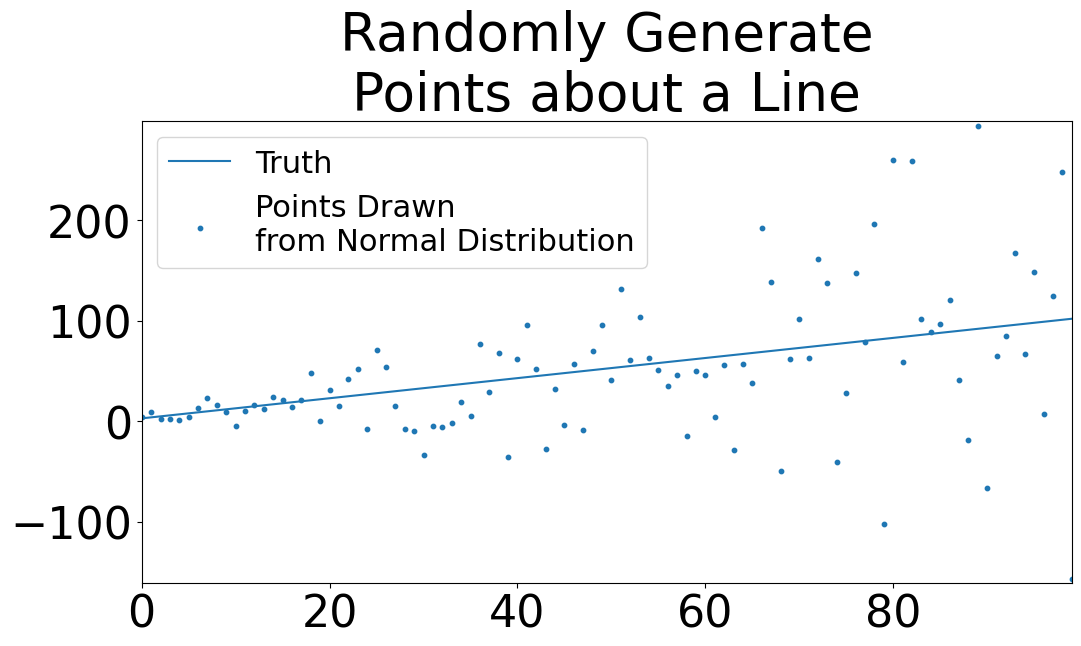

In [42]:
import random
line = np.array([i + 3 for i in range(100)])
points = []
# generate random points using the values from line
# as mean and standard deviation
for point in line:
    # random.normalvariate(mu = mean, sigma = SD)
    points.append(random.normalvariate(mu = point,
                                       sigma = point))
    
# you can use the plt.figure, but you lose the ax function
figure = plt.figure(figsize = (12,6))
plt.plot(line, label = "Truth")
plt.scatter(np.arange(len(points)), 
            points,
            label = "Points Drawn\nfrom Normal Distribution", 
            s = 10)
plt.title("Randomly Generate\nPoints about a Line")
plt.legend(loc = "best", fontsize = 22)
plt.show()

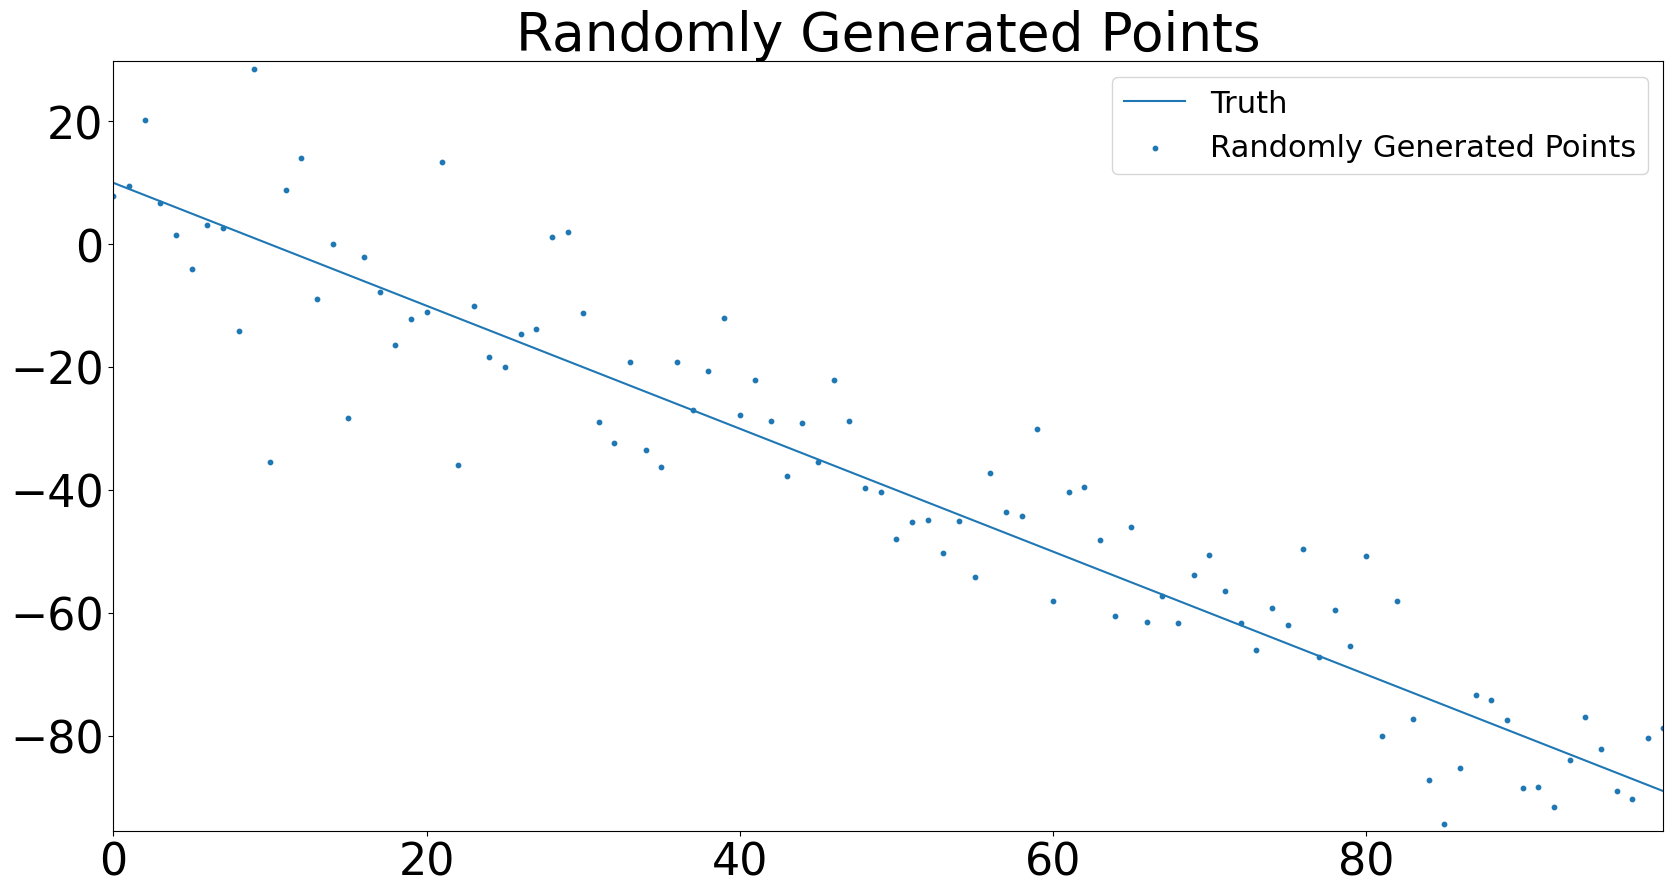

In [43]:
# to simulate you need to generate false data, this function
# below uses the criteria of a normal function and applies random
# values to the line and such

def build_random_data_with_line(y_int, slope, SD = 1):
    line = np.array([slope * (i) + y_int for i in range(100)])
    points = []
    for point in line:
        points.append(random.normalvariate(point,SD))
    return line, points

# plots simple simulation

def plot_line(line, points, line_name = "Truth",
             title = "Randomly Generated Points"):
    figure = plt.figure(figsize = (20,10))
    plt.plot(line, label = line_name)
    plt.scatter(np.arange(len(points)), points, s = 10, 
                label = title)
    plt.title(title)
    plt.legend(loc = "best", fontsize = 22)
    plt.show()


line, points = build_random_data_with_line(y_int = 10, slope = -1, SD = 10)
plot_line(line, points)

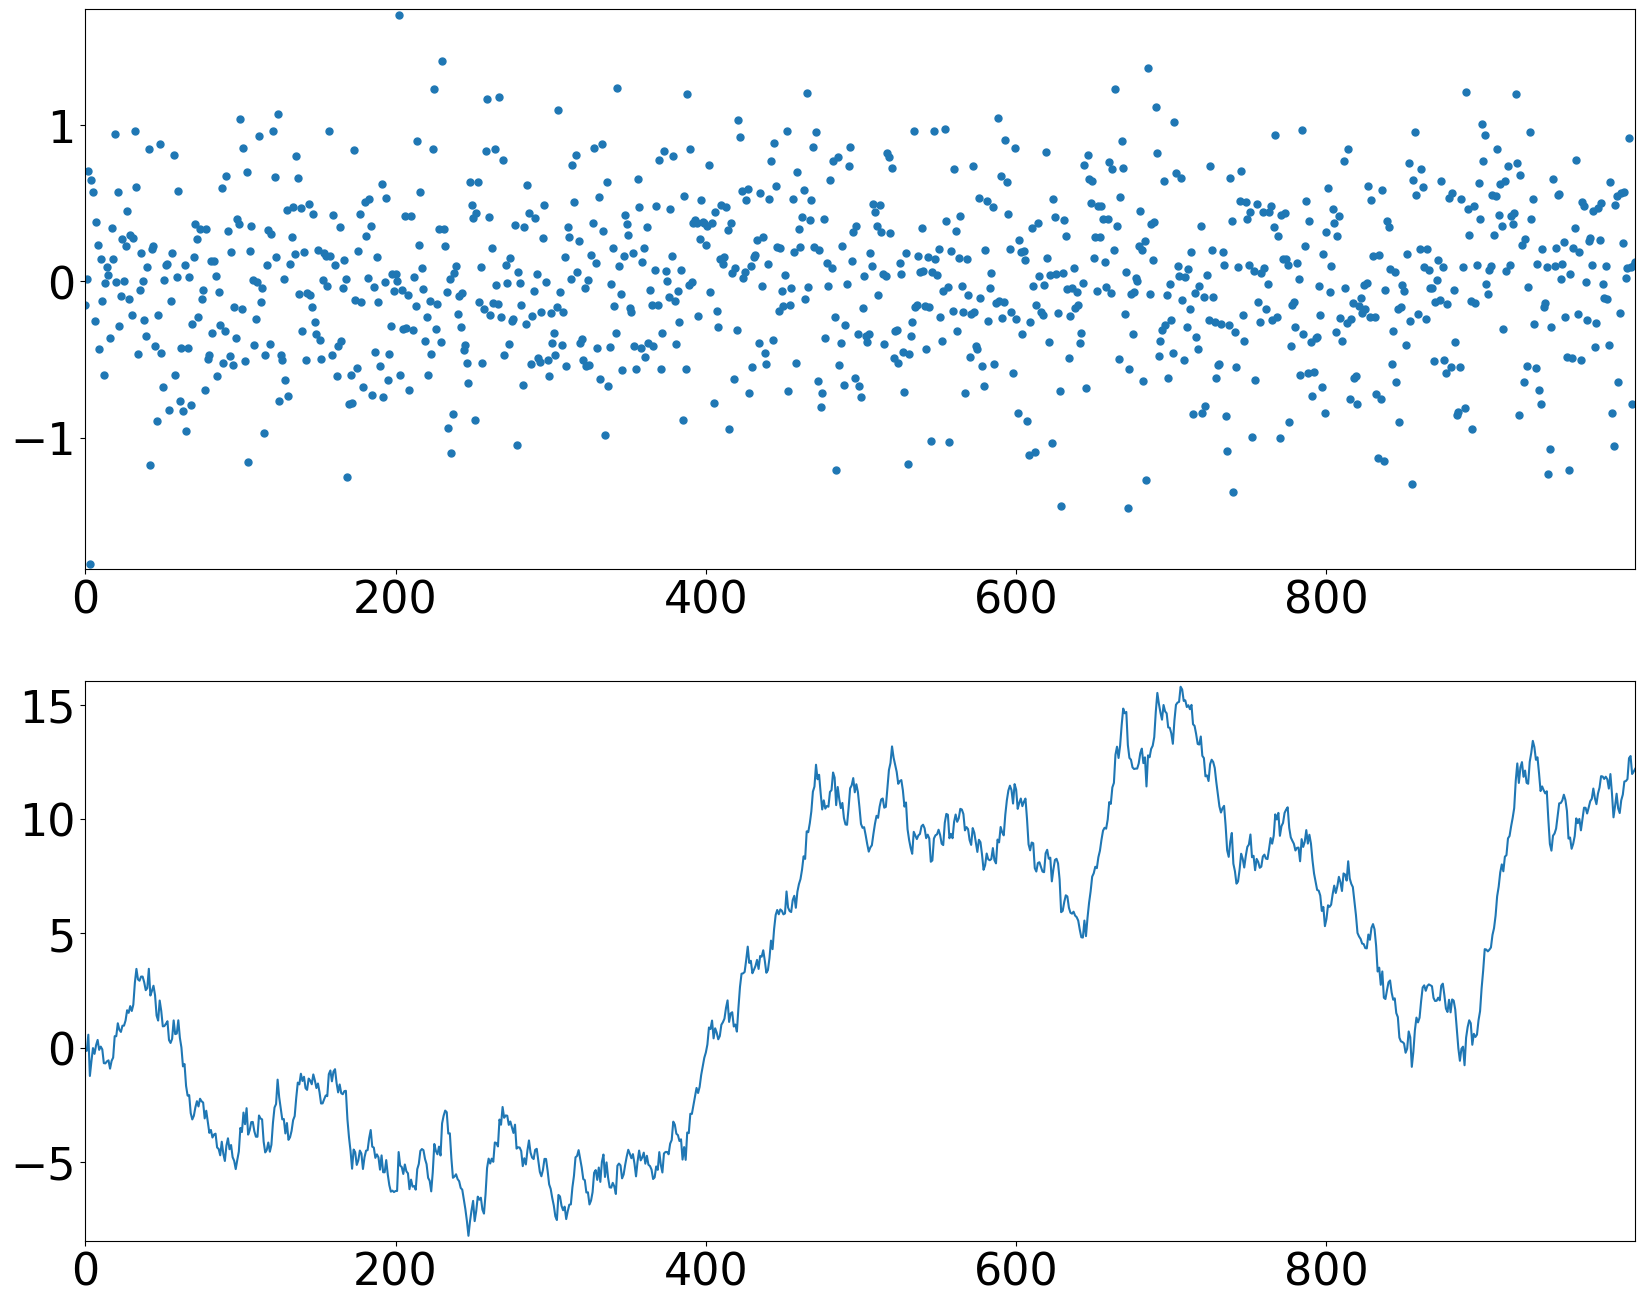

In [44]:
# Baby's first simulation of randomized data assuming true line (trend)


# first we need to generate a randomlist and we plot it in the above graph
random_list = [random.normalvariate(0, .5) for i in range (1000)]
fig, axs = plt.subplots(2, figsize = (20,16))
axs[0].plot(random_list, ls = "", marker = ".", markersize = 10)

simulation = []
for i in range(len(random_list)):
    val = random_list[i]
    # this helps us start our simulation from 0 without getting an error...
    if i == 0:
        simulation.append(val)
    # otherwise we want continuous change following previous values shown below
    else:
        # add last value observed in simulation + change ( which is val)
        # this will generate the latest value in the simulation (ongoing delta)
        simulation.append(simulation[-1] + val)
        
axs[1].plot(simulation)
plt.show()
plt.close()

In [54]:
# differentiated simulation data is equal in value as the random list
pd.DataFrame(simulation[:10]).diff(), random_list[:10]

(          0
 0       NaN
 1  0.011540
 2  0.702639
 3 -1.805950
 4  0.647493
 5  0.573720
 6 -0.253969
 7  0.379275
 8  0.231477
 9 -0.435501,
 [-0.15327614586953833,
  0.011540360369445866,
  0.7026386662675976,
  -1.8059500664492059,
  0.6474928220458165,
  0.5737204102498372,
  -0.25396905860001057,
  0.37927523883144454,
  0.23147749692251868,
  -0.4355007426515019])

In [ ]:
mew = 0
sigma = 1
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 1000
# iterate over the number of simulations in the first layer
for i in range(num_sims):
    # create empty dict of each simulation
    monte_carlo_sim_dict[i] = {}
    # run each individual simulation here
    for period in range(periods):
        # abbreviate dictionary i name
        curr_sim = monte_carlo_sim_dict[i]
        if period ==0:
            curr_sim[period] = random.normalvariate(mew, sigma)
        else:
            curr_sim[period] = curr_sim[period - 1] + random.normalvariate(mew, sigma)
        
        

            

In [ ]:
monte_carlo_sim_dict